# Gradient Descent for linear regression model 
Here we are using to minimize the loss in  regression   to find the optiminal weight coeffiecent of the linear  regression model.


In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

Gradient Descent class:

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

# Linear regression model
: for toy data 

In [4]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

 Fit the linear regression model to the toy data.

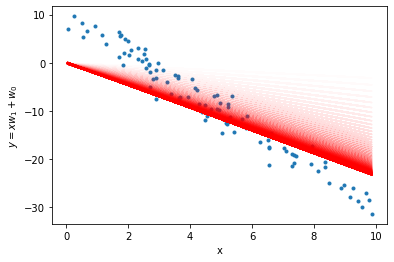

In [6]:
N = 100
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)
optimizer = GradientDescent(learning_rate=.005, max_iters=100, record_history=True)
model = LinearRegression()
model.fit(x,y, optimizer)
plt.plot(x, y, '.')
for t,w in enumerate(optimizer.w_history):
    plt.plot(x, x*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
#plt.xlim(-20,20)
#plt.ylim(-100,100)
plt.show()

# Change of learning rate
To see the effect of learning rate in the gradient descent in linear regression model

In [7]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

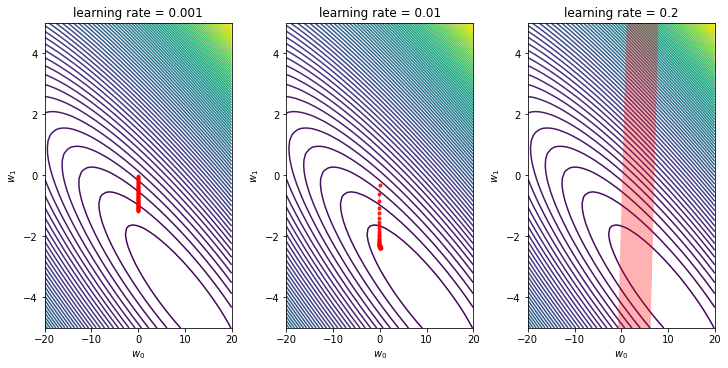

In [8]:
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
learning_rates = [.001, .01, .2]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iters=50, record_history=True)
    model = LinearRegression()
    model.fit(x,y, optimizer)
    plot_contour(cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)                  # get the history for plotting
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()

# Momentum
This is small example to see momentum along with Gradient descent method to find otpimim x that mininmizes the function
f(x)=2*x * x - 5 * x + 4

In [ ]:
import math
  
# HyperParameters of the optimization algorithm
a = 0.02
b = 0.8
  
# Objective function
def obj_func(x):
    return 2*x * x - 5 * x + 4
      
# Gradient of the objective function
def grad(x):
    return 4* x - 5
      
# Parameter of the objective function
x = 0
  
# Number of iterations
iterations = 0
  
v = 0
  
while (1):
    iterations += 1
    v = b * v + (1 - b) * grad(x)
    x_prev = x
      
    x = x - a * v
      
    print("Value of objective function on iteration", iterations, "is", x)
      
    if x_prev == x:
        print("Done optimizing the objective function. ")
        break


# RMSProp
This is small exampleusing rmsprop method  to find otpimim x that mininmizes the function
f(x)=2*x * x - 5 * x + 4

In [16]:
import math
import numpy as np
  
# HyperParameters of the optimization algorithm
a = 0.02
b = 0.8
  
# Objective function
def obj_func(x):
    return 2*x * x - 5* x + 4
      
# Gradient of the objective function
def grad(x):
    return 4 * x - 5
      
# Parameter of the objective function
x = 0
  
# Number of iterations
iterations = 0
  
s = 0
  
while (1):
    iterations += 1
    s = b * s + (1 - b) * (grad(x)*grad(x))
    y=np.sqrt(s) 
    x_prev = x
    x = x - a * (grad(x)/y)
      
    print("Value of objective function on iteration", iterations, "is", x)
      
    if x_prev == x:
        print("Done optimizing the objective function. ")
        break

Value of objective function on iteration 1 is 0.04472135954999581
Value of objective function on iteration 2 is 0.07750852032567629
Value of objective function on iteration 3 is 0.10538986393573546
Value of objective function on iteration 4 is 0.13054872171089613
Value of objective function on iteration 5 is 0.15398049123834467
Value of objective function on iteration 6 is 0.1762300055115899
Value of objective function on iteration 7 is 0.19762953322040971
Value of objective function on iteration 8 is 0.21839661423521778
Value of objective function on iteration 9 is 0.23868089961680147
Value of objective function on iteration 10 is 0.2585890925830569
Value of objective function on iteration 11 is 0.27819931935312553
Value of objective function on iteration 12 is 0.29756993097027606
Value of objective function on iteration 13 is 0.3167451629106851
Value of objective function on iteration 14 is 0.335758920894876
Value of objective function on iteration 15 is 0.35463739695342844
Value of 

Value of objective function on iteration 400 is 1.24
Value of objective function on iteration 401 is 1.26
Value of objective function on iteration 402 is 1.24
Value of objective function on iteration 403 is 1.26
Value of objective function on iteration 404 is 1.24
Value of objective function on iteration 405 is 1.26
Value of objective function on iteration 406 is 1.24
Value of objective function on iteration 407 is 1.26
Value of objective function on iteration 408 is 1.24
Value of objective function on iteration 409 is 1.26
Value of objective function on iteration 410 is 1.24
Value of objective function on iteration 411 is 1.26
Value of objective function on iteration 412 is 1.24
Value of objective function on iteration 413 is 1.26
Value of objective function on iteration 414 is 1.24
Value of objective function on iteration 415 is 1.26
Value of objective function on iteration 416 is 1.24
Value of objective function on iteration 417 is 1.26
Value of objective function on iteration 418 i

Value of objective function on iteration 775 is 1.26
Value of objective function on iteration 776 is 1.24
Value of objective function on iteration 777 is 1.26
Value of objective function on iteration 778 is 1.24
Value of objective function on iteration 779 is 1.26
Value of objective function on iteration 780 is 1.24
Value of objective function on iteration 781 is 1.26
Value of objective function on iteration 782 is 1.24
Value of objective function on iteration 783 is 1.26
Value of objective function on iteration 784 is 1.24
Value of objective function on iteration 785 is 1.26
Value of objective function on iteration 786 is 1.24
Value of objective function on iteration 787 is 1.26
Value of objective function on iteration 788 is 1.24
Value of objective function on iteration 789 is 1.26
Value of objective function on iteration 790 is 1.24
Value of objective function on iteration 791 is 1.26
Value of objective function on iteration 792 is 1.24
Value of objective function on iteration 793 i

Value of objective function on iteration 1151 is 1.26
Value of objective function on iteration 1152 is 1.24
Value of objective function on iteration 1153 is 1.26
Value of objective function on iteration 1154 is 1.24
Value of objective function on iteration 1155 is 1.26
Value of objective function on iteration 1156 is 1.24
Value of objective function on iteration 1157 is 1.26
Value of objective function on iteration 1158 is 1.24
Value of objective function on iteration 1159 is 1.26
Value of objective function on iteration 1160 is 1.24
Value of objective function on iteration 1161 is 1.26
Value of objective function on iteration 1162 is 1.24
Value of objective function on iteration 1163 is 1.26
Value of objective function on iteration 1164 is 1.24
Value of objective function on iteration 1165 is 1.26
Value of objective function on iteration 1166 is 1.24
Value of objective function on iteration 1167 is 1.26
Value of objective function on iteration 1168 is 1.24
Value of objective function 

Value of objective function on iteration 1539 is 1.26
Value of objective function on iteration 1540 is 1.24
Value of objective function on iteration 1541 is 1.26
Value of objective function on iteration 1542 is 1.24
Value of objective function on iteration 1543 is 1.26
Value of objective function on iteration 1544 is 1.24
Value of objective function on iteration 1545 is 1.26
Value of objective function on iteration 1546 is 1.24
Value of objective function on iteration 1547 is 1.26
Value of objective function on iteration 1548 is 1.24
Value of objective function on iteration 1549 is 1.26
Value of objective function on iteration 1550 is 1.24
Value of objective function on iteration 1551 is 1.26
Value of objective function on iteration 1552 is 1.24
Value of objective function on iteration 1553 is 1.26
Value of objective function on iteration 1554 is 1.24
Value of objective function on iteration 1555 is 1.26
Value of objective function on iteration 1556 is 1.24
Value of objective function 

Value of objective function on iteration 1957 is 1.26
Value of objective function on iteration 1958 is 1.24
Value of objective function on iteration 1959 is 1.26
Value of objective function on iteration 1960 is 1.24
Value of objective function on iteration 1961 is 1.26
Value of objective function on iteration 1962 is 1.24
Value of objective function on iteration 1963 is 1.26
Value of objective function on iteration 1964 is 1.24
Value of objective function on iteration 1965 is 1.26
Value of objective function on iteration 1966 is 1.24
Value of objective function on iteration 1967 is 1.26
Value of objective function on iteration 1968 is 1.24
Value of objective function on iteration 1969 is 1.26
Value of objective function on iteration 1970 is 1.24
Value of objective function on iteration 1971 is 1.26
Value of objective function on iteration 1972 is 1.24
Value of objective function on iteration 1973 is 1.26
Value of objective function on iteration 1974 is 1.24
Value of objective function 

Value of objective function on iteration 2274 is 1.24
Value of objective function on iteration 2275 is 1.26
Value of objective function on iteration 2276 is 1.24
Value of objective function on iteration 2277 is 1.26
Value of objective function on iteration 2278 is 1.24
Value of objective function on iteration 2279 is 1.26
Value of objective function on iteration 2280 is 1.24
Value of objective function on iteration 2281 is 1.26
Value of objective function on iteration 2282 is 1.24
Value of objective function on iteration 2283 is 1.26
Value of objective function on iteration 2284 is 1.24
Value of objective function on iteration 2285 is 1.26
Value of objective function on iteration 2286 is 1.24
Value of objective function on iteration 2287 is 1.26
Value of objective function on iteration 2288 is 1.24
Value of objective function on iteration 2289 is 1.26
Value of objective function on iteration 2290 is 1.24
Value of objective function on iteration 2291 is 1.26
Value of objective function 

Value of objective function on iteration 2649 is 1.26
Value of objective function on iteration 2650 is 1.24
Value of objective function on iteration 2651 is 1.26
Value of objective function on iteration 2652 is 1.24
Value of objective function on iteration 2653 is 1.26
Value of objective function on iteration 2654 is 1.24
Value of objective function on iteration 2655 is 1.26
Value of objective function on iteration 2656 is 1.24
Value of objective function on iteration 2657 is 1.26
Value of objective function on iteration 2658 is 1.24
Value of objective function on iteration 2659 is 1.26
Value of objective function on iteration 2660 is 1.24
Value of objective function on iteration 2661 is 1.26
Value of objective function on iteration 2662 is 1.24
Value of objective function on iteration 2663 is 1.26
Value of objective function on iteration 2664 is 1.24
Value of objective function on iteration 2665 is 1.26
Value of objective function on iteration 2666 is 1.24
Value of objective function 

Value of objective function on iteration 3024 is 1.24
Value of objective function on iteration 3025 is 1.26
Value of objective function on iteration 3026 is 1.24
Value of objective function on iteration 3027 is 1.26
Value of objective function on iteration 3028 is 1.24
Value of objective function on iteration 3029 is 1.26
Value of objective function on iteration 3030 is 1.24
Value of objective function on iteration 3031 is 1.26
Value of objective function on iteration 3032 is 1.24
Value of objective function on iteration 3033 is 1.26
Value of objective function on iteration 3034 is 1.24
Value of objective function on iteration 3035 is 1.26
Value of objective function on iteration 3036 is 1.24
Value of objective function on iteration 3037 is 1.26
Value of objective function on iteration 3038 is 1.24
Value of objective function on iteration 3039 is 1.26
Value of objective function on iteration 3040 is 1.24
Value of objective function on iteration 3041 is 1.26
Value of objective function 

Value of objective function on iteration 3399 is 1.26
Value of objective function on iteration 3400 is 1.24
Value of objective function on iteration 3401 is 1.26
Value of objective function on iteration 3402 is 1.24
Value of objective function on iteration 3403 is 1.26
Value of objective function on iteration 3404 is 1.24
Value of objective function on iteration 3405 is 1.26
Value of objective function on iteration 3406 is 1.24
Value of objective function on iteration 3407 is 1.26
Value of objective function on iteration 3408 is 1.24
Value of objective function on iteration 3409 is 1.26
Value of objective function on iteration 3410 is 1.24
Value of objective function on iteration 3411 is 1.26
Value of objective function on iteration 3412 is 1.24
Value of objective function on iteration 3413 is 1.26
Value of objective function on iteration 3414 is 1.24
Value of objective function on iteration 3415 is 1.26
Value of objective function on iteration 3416 is 1.24
Value of objective function 

Value of objective function on iteration 3734 is 1.24
Value of objective function on iteration 3735 is 1.26
Value of objective function on iteration 3736 is 1.24
Value of objective function on iteration 3737 is 1.26
Value of objective function on iteration 3738 is 1.24
Value of objective function on iteration 3739 is 1.26
Value of objective function on iteration 3740 is 1.24
Value of objective function on iteration 3741 is 1.26
Value of objective function on iteration 3742 is 1.24
Value of objective function on iteration 3743 is 1.26
Value of objective function on iteration 3744 is 1.24
Value of objective function on iteration 3745 is 1.26
Value of objective function on iteration 3746 is 1.24
Value of objective function on iteration 3747 is 1.26
Value of objective function on iteration 3748 is 1.24
Value of objective function on iteration 3749 is 1.26
Value of objective function on iteration 3750 is 1.24
Value of objective function on iteration 3751 is 1.26
Value of objective function 

Value of objective function on iteration 4084 is 1.24
Value of objective function on iteration 4085 is 1.26
Value of objective function on iteration 4086 is 1.24
Value of objective function on iteration 4087 is 1.26
Value of objective function on iteration 4088 is 1.24
Value of objective function on iteration 4089 is 1.26
Value of objective function on iteration 4090 is 1.24
Value of objective function on iteration 4091 is 1.26
Value of objective function on iteration 4092 is 1.24
Value of objective function on iteration 4093 is 1.26
Value of objective function on iteration 4094 is 1.24
Value of objective function on iteration 4095 is 1.26
Value of objective function on iteration 4096 is 1.24
Value of objective function on iteration 4097 is 1.26
Value of objective function on iteration 4098 is 1.24
Value of objective function on iteration 4099 is 1.26
Value of objective function on iteration 4100 is 1.24
Value of objective function on iteration 4101 is 1.26
Value of objective function 

Value of objective function on iteration 4471 is 1.26
Value of objective function on iteration 4472 is 1.24
Value of objective function on iteration 4473 is 1.26
Value of objective function on iteration 4474 is 1.24
Value of objective function on iteration 4475 is 1.26
Value of objective function on iteration 4476 is 1.24
Value of objective function on iteration 4477 is 1.26
Value of objective function on iteration 4478 is 1.24
Value of objective function on iteration 4479 is 1.26
Value of objective function on iteration 4480 is 1.24
Value of objective function on iteration 4481 is 1.26
Value of objective function on iteration 4482 is 1.24
Value of objective function on iteration 4483 is 1.26
Value of objective function on iteration 4484 is 1.24
Value of objective function on iteration 4485 is 1.26
Value of objective function on iteration 4486 is 1.24
Value of objective function on iteration 4487 is 1.26
Value of objective function on iteration 4488 is 1.24
Value of objective function 

Value of objective function on iteration 4776 is 1.24
Value of objective function on iteration 4777 is 1.26
Value of objective function on iteration 4778 is 1.24
Value of objective function on iteration 4779 is 1.26
Value of objective function on iteration 4780 is 1.24
Value of objective function on iteration 4781 is 1.26
Value of objective function on iteration 4782 is 1.24
Value of objective function on iteration 4783 is 1.26
Value of objective function on iteration 4784 is 1.24
Value of objective function on iteration 4785 is 1.26
Value of objective function on iteration 4786 is 1.24
Value of objective function on iteration 4787 is 1.26
Value of objective function on iteration 4788 is 1.24
Value of objective function on iteration 4789 is 1.26
Value of objective function on iteration 4790 is 1.24
Value of objective function on iteration 4791 is 1.26
Value of objective function on iteration 4792 is 1.24
Value of objective function on iteration 4793 is 1.26
Value of objective function 

Value of objective function on iteration 5181 is 1.26
Value of objective function on iteration 5182 is 1.24
Value of objective function on iteration 5183 is 1.26
Value of objective function on iteration 5184 is 1.24
Value of objective function on iteration 5185 is 1.26
Value of objective function on iteration 5186 is 1.24
Value of objective function on iteration 5187 is 1.26
Value of objective function on iteration 5188 is 1.24
Value of objective function on iteration 5189 is 1.26
Value of objective function on iteration 5190 is 1.24
Value of objective function on iteration 5191 is 1.26
Value of objective function on iteration 5192 is 1.24
Value of objective function on iteration 5193 is 1.26
Value of objective function on iteration 5194 is 1.24
Value of objective function on iteration 5195 is 1.26
Value of objective function on iteration 5196 is 1.24
Value of objective function on iteration 5197 is 1.26
Value of objective function on iteration 5198 is 1.24
Value of objective function 

Value of objective function on iteration 5523 is 1.26
Value of objective function on iteration 5524 is 1.24
Value of objective function on iteration 5525 is 1.26
Value of objective function on iteration 5526 is 1.24
Value of objective function on iteration 5527 is 1.26
Value of objective function on iteration 5528 is 1.24
Value of objective function on iteration 5529 is 1.26
Value of objective function on iteration 5530 is 1.24
Value of objective function on iteration 5531 is 1.26
Value of objective function on iteration 5532 is 1.24
Value of objective function on iteration 5533 is 1.26
Value of objective function on iteration 5534 is 1.24
Value of objective function on iteration 5535 is 1.26
Value of objective function on iteration 5536 is 1.24
Value of objective function on iteration 5537 is 1.26
Value of objective function on iteration 5538 is 1.24
Value of objective function on iteration 5539 is 1.26
Value of objective function on iteration 5540 is 1.24
Value of objective function 

Value of objective function on iteration 5898 is 1.24
Value of objective function on iteration 5899 is 1.26
Value of objective function on iteration 5900 is 1.24
Value of objective function on iteration 5901 is 1.26
Value of objective function on iteration 5902 is 1.24
Value of objective function on iteration 5903 is 1.26
Value of objective function on iteration 5904 is 1.24
Value of objective function on iteration 5905 is 1.26
Value of objective function on iteration 5906 is 1.24
Value of objective function on iteration 5907 is 1.26
Value of objective function on iteration 5908 is 1.24
Value of objective function on iteration 5909 is 1.26
Value of objective function on iteration 5910 is 1.24
Value of objective function on iteration 5911 is 1.26
Value of objective function on iteration 5912 is 1.24
Value of objective function on iteration 5913 is 1.26
Value of objective function on iteration 5914 is 1.24
Value of objective function on iteration 5915 is 1.26
Value of objective function 

Value of objective function on iteration 6273 is 1.26
Value of objective function on iteration 6274 is 1.24
Value of objective function on iteration 6275 is 1.26
Value of objective function on iteration 6276 is 1.24
Value of objective function on iteration 6277 is 1.26
Value of objective function on iteration 6278 is 1.24
Value of objective function on iteration 6279 is 1.26
Value of objective function on iteration 6280 is 1.24
Value of objective function on iteration 6281 is 1.26
Value of objective function on iteration 6282 is 1.24
Value of objective function on iteration 6283 is 1.26
Value of objective function on iteration 6284 is 1.24
Value of objective function on iteration 6285 is 1.26
Value of objective function on iteration 6286 is 1.24
Value of objective function on iteration 6287 is 1.26
Value of objective function on iteration 6288 is 1.24
Value of objective function on iteration 6289 is 1.26
Value of objective function on iteration 6290 is 1.24
Value of objective function 

Value of objective function on iteration 6652 is 1.24
Value of objective function on iteration 6653 is 1.26
Value of objective function on iteration 6654 is 1.24
Value of objective function on iteration 6655 is 1.26
Value of objective function on iteration 6656 is 1.24
Value of objective function on iteration 6657 is 1.26
Value of objective function on iteration 6658 is 1.24
Value of objective function on iteration 6659 is 1.26
Value of objective function on iteration 6660 is 1.24
Value of objective function on iteration 6661 is 1.26
Value of objective function on iteration 6662 is 1.24
Value of objective function on iteration 6663 is 1.26
Value of objective function on iteration 6664 is 1.24
Value of objective function on iteration 6665 is 1.26
Value of objective function on iteration 6666 is 1.24
Value of objective function on iteration 6667 is 1.26
Value of objective function on iteration 6668 is 1.24
Value of objective function on iteration 6669 is 1.26
Value of objective function 

Value of objective function on iteration 6926 is 1.24
Value of objective function on iteration 6927 is 1.26
Value of objective function on iteration 6928 is 1.24
Value of objective function on iteration 6929 is 1.26
Value of objective function on iteration 6930 is 1.24
Value of objective function on iteration 6931 is 1.26
Value of objective function on iteration 6932 is 1.24
Value of objective function on iteration 6933 is 1.26
Value of objective function on iteration 6934 is 1.24
Value of objective function on iteration 6935 is 1.26
Value of objective function on iteration 6936 is 1.24
Value of objective function on iteration 6937 is 1.26
Value of objective function on iteration 6938 is 1.24
Value of objective function on iteration 6939 is 1.26
Value of objective function on iteration 6940 is 1.24
Value of objective function on iteration 6941 is 1.26
Value of objective function on iteration 6942 is 1.24
Value of objective function on iteration 6943 is 1.26
Value of objective function 

Value of objective function on iteration 7272 is 1.24
Value of objective function on iteration 7273 is 1.26
Value of objective function on iteration 7274 is 1.24
Value of objective function on iteration 7275 is 1.26
Value of objective function on iteration 7276 is 1.24
Value of objective function on iteration 7277 is 1.26
Value of objective function on iteration 7278 is 1.24
Value of objective function on iteration 7279 is 1.26
Value of objective function on iteration 7280 is 1.24
Value of objective function on iteration 7281 is 1.26
Value of objective function on iteration 7282 is 1.24
Value of objective function on iteration 7283 is 1.26
Value of objective function on iteration 7284 is 1.24
Value of objective function on iteration 7285 is 1.26
Value of objective function on iteration 7286 is 1.24
Value of objective function on iteration 7287 is 1.26
Value of objective function on iteration 7288 is 1.24
Value of objective function on iteration 7289 is 1.26
Value of objective function 

Value of objective function on iteration 7640 is 1.24
Value of objective function on iteration 7641 is 1.26
Value of objective function on iteration 7642 is 1.24
Value of objective function on iteration 7643 is 1.26
Value of objective function on iteration 7644 is 1.24
Value of objective function on iteration 7645 is 1.26
Value of objective function on iteration 7646 is 1.24
Value of objective function on iteration 7647 is 1.26
Value of objective function on iteration 7648 is 1.24
Value of objective function on iteration 7649 is 1.26
Value of objective function on iteration 7650 is 1.24
Value of objective function on iteration 7651 is 1.26
Value of objective function on iteration 7652 is 1.24
Value of objective function on iteration 7653 is 1.26
Value of objective function on iteration 7654 is 1.24
Value of objective function on iteration 7655 is 1.26
Value of objective function on iteration 7656 is 1.24
Value of objective function on iteration 7657 is 1.26
Value of objective function 

Value of objective function on iteration 7982 is 1.24
Value of objective function on iteration 7983 is 1.26
Value of objective function on iteration 7984 is 1.24
Value of objective function on iteration 7985 is 1.26
Value of objective function on iteration 7986 is 1.24
Value of objective function on iteration 7987 is 1.26
Value of objective function on iteration 7988 is 1.24
Value of objective function on iteration 7989 is 1.26
Value of objective function on iteration 7990 is 1.24
Value of objective function on iteration 7991 is 1.26
Value of objective function on iteration 7992 is 1.24
Value of objective function on iteration 7993 is 1.26
Value of objective function on iteration 7994 is 1.24
Value of objective function on iteration 7995 is 1.26
Value of objective function on iteration 7996 is 1.24
Value of objective function on iteration 7997 is 1.26
Value of objective function on iteration 7998 is 1.24
Value of objective function on iteration 7999 is 1.26
Value of objective function 

Value of objective function on iteration 8301 is 1.26
Value of objective function on iteration 8302 is 1.24
Value of objective function on iteration 8303 is 1.26
Value of objective function on iteration 8304 is 1.24
Value of objective function on iteration 8305 is 1.26
Value of objective function on iteration 8306 is 1.24
Value of objective function on iteration 8307 is 1.26
Value of objective function on iteration 8308 is 1.24
Value of objective function on iteration 8309 is 1.26
Value of objective function on iteration 8310 is 1.24
Value of objective function on iteration 8311 is 1.26
Value of objective function on iteration 8312 is 1.24
Value of objective function on iteration 8313 is 1.26
Value of objective function on iteration 8314 is 1.24
Value of objective function on iteration 8315 is 1.26
Value of objective function on iteration 8316 is 1.24
Value of objective function on iteration 8317 is 1.26
Value of objective function on iteration 8318 is 1.24
Value of objective function 

Value of objective function on iteration 8731 is 1.26
Value of objective function on iteration 8732 is 1.24
Value of objective function on iteration 8733 is 1.26
Value of objective function on iteration 8734 is 1.24
Value of objective function on iteration 8735 is 1.26
Value of objective function on iteration 8736 is 1.24
Value of objective function on iteration 8737 is 1.26
Value of objective function on iteration 8738 is 1.24
Value of objective function on iteration 8739 is 1.26
Value of objective function on iteration 8740 is 1.24
Value of objective function on iteration 8741 is 1.26
Value of objective function on iteration 8742 is 1.24
Value of objective function on iteration 8743 is 1.26
Value of objective function on iteration 8744 is 1.24
Value of objective function on iteration 8745 is 1.26
Value of objective function on iteration 8746 is 1.24
Value of objective function on iteration 8747 is 1.26
Value of objective function on iteration 8748 is 1.24
Value of objective function 

Value of objective function on iteration 9028 is 1.24
Value of objective function on iteration 9029 is 1.26
Value of objective function on iteration 9030 is 1.24
Value of objective function on iteration 9031 is 1.26
Value of objective function on iteration 9032 is 1.24
Value of objective function on iteration 9033 is 1.26
Value of objective function on iteration 9034 is 1.24
Value of objective function on iteration 9035 is 1.26
Value of objective function on iteration 9036 is 1.24
Value of objective function on iteration 9037 is 1.26
Value of objective function on iteration 9038 is 1.24
Value of objective function on iteration 9039 is 1.26
Value of objective function on iteration 9040 is 1.24
Value of objective function on iteration 9041 is 1.26
Value of objective function on iteration 9042 is 1.24
Value of objective function on iteration 9043 is 1.26
Value of objective function on iteration 9044 is 1.24
Value of objective function on iteration 9045 is 1.26
Value of objective function 

Value of objective function on iteration 9361 is 1.26
Value of objective function on iteration 9362 is 1.24
Value of objective function on iteration 9363 is 1.26
Value of objective function on iteration 9364 is 1.24
Value of objective function on iteration 9365 is 1.26
Value of objective function on iteration 9366 is 1.24
Value of objective function on iteration 9367 is 1.26
Value of objective function on iteration 9368 is 1.24
Value of objective function on iteration 9369 is 1.26
Value of objective function on iteration 9370 is 1.24
Value of objective function on iteration 9371 is 1.26
Value of objective function on iteration 9372 is 1.24
Value of objective function on iteration 9373 is 1.26
Value of objective function on iteration 9374 is 1.24
Value of objective function on iteration 9375 is 1.26
Value of objective function on iteration 9376 is 1.24
Value of objective function on iteration 9377 is 1.26
Value of objective function on iteration 9378 is 1.24
Value of objective function 

Value of objective function on iteration 9740 is 1.24
Value of objective function on iteration 9741 is 1.26
Value of objective function on iteration 9742 is 1.24
Value of objective function on iteration 9743 is 1.26
Value of objective function on iteration 9744 is 1.24
Value of objective function on iteration 9745 is 1.26
Value of objective function on iteration 9746 is 1.24
Value of objective function on iteration 9747 is 1.26
Value of objective function on iteration 9748 is 1.24
Value of objective function on iteration 9749 is 1.26
Value of objective function on iteration 9750 is 1.24
Value of objective function on iteration 9751 is 1.26
Value of objective function on iteration 9752 is 1.24
Value of objective function on iteration 9753 is 1.26
Value of objective function on iteration 9754 is 1.24
Value of objective function on iteration 9755 is 1.26
Value of objective function on iteration 9756 is 1.24
Value of objective function on iteration 9757 is 1.26
Value of objective function 

Value of objective function on iteration 10023 is 1.26
Value of objective function on iteration 10024 is 1.24
Value of objective function on iteration 10025 is 1.26
Value of objective function on iteration 10026 is 1.24
Value of objective function on iteration 10027 is 1.26
Value of objective function on iteration 10028 is 1.24
Value of objective function on iteration 10029 is 1.26
Value of objective function on iteration 10030 is 1.24
Value of objective function on iteration 10031 is 1.26
Value of objective function on iteration 10032 is 1.24
Value of objective function on iteration 10033 is 1.26
Value of objective function on iteration 10034 is 1.24
Value of objective function on iteration 10035 is 1.26
Value of objective function on iteration 10036 is 1.24
Value of objective function on iteration 10037 is 1.26
Value of objective function on iteration 10038 is 1.24
Value of objective function on iteration 10039 is 1.26
Value of objective function on iteration 10040 is 1.24
Value of o

Value of objective function on iteration 10332 is 1.24
Value of objective function on iteration 10333 is 1.26
Value of objective function on iteration 10334 is 1.24
Value of objective function on iteration 10335 is 1.26
Value of objective function on iteration 10336 is 1.24
Value of objective function on iteration 10337 is 1.26
Value of objective function on iteration 10338 is 1.24
Value of objective function on iteration 10339 is 1.26
Value of objective function on iteration 10340 is 1.24
Value of objective function on iteration 10341 is 1.26
Value of objective function on iteration 10342 is 1.24
Value of objective function on iteration 10343 is 1.26
Value of objective function on iteration 10344 is 1.24
Value of objective function on iteration 10345 is 1.26
Value of objective function on iteration 10346 is 1.24
Value of objective function on iteration 10347 is 1.26
Value of objective function on iteration 10348 is 1.24
Value of objective function on iteration 10349 is 1.26
Value of o

Value of objective function on iteration 10671 is 1.26
Value of objective function on iteration 10672 is 1.24
Value of objective function on iteration 10673 is 1.26
Value of objective function on iteration 10674 is 1.24
Value of objective function on iteration 10675 is 1.26
Value of objective function on iteration 10676 is 1.24
Value of objective function on iteration 10677 is 1.26
Value of objective function on iteration 10678 is 1.24
Value of objective function on iteration 10679 is 1.26
Value of objective function on iteration 10680 is 1.24
Value of objective function on iteration 10681 is 1.26
Value of objective function on iteration 10682 is 1.24
Value of objective function on iteration 10683 is 1.26
Value of objective function on iteration 10684 is 1.24
Value of objective function on iteration 10685 is 1.26
Value of objective function on iteration 10686 is 1.24
Value of objective function on iteration 10687 is 1.26
Value of objective function on iteration 10688 is 1.24
Value of o

Value of objective function on iteration 11021 is 1.26
Value of objective function on iteration 11022 is 1.24
Value of objective function on iteration 11023 is 1.26
Value of objective function on iteration 11024 is 1.24
Value of objective function on iteration 11025 is 1.26
Value of objective function on iteration 11026 is 1.24
Value of objective function on iteration 11027 is 1.26
Value of objective function on iteration 11028 is 1.24
Value of objective function on iteration 11029 is 1.26
Value of objective function on iteration 11030 is 1.24
Value of objective function on iteration 11031 is 1.26
Value of objective function on iteration 11032 is 1.24
Value of objective function on iteration 11033 is 1.26
Value of objective function on iteration 11034 is 1.24
Value of objective function on iteration 11035 is 1.26
Value of objective function on iteration 11036 is 1.24
Value of objective function on iteration 11037 is 1.26
Value of objective function on iteration 11038 is 1.24
Value of o

Value of objective function on iteration 11396 is 1.24
Value of objective function on iteration 11397 is 1.26
Value of objective function on iteration 11398 is 1.24
Value of objective function on iteration 11399 is 1.26
Value of objective function on iteration 11400 is 1.24
Value of objective function on iteration 11401 is 1.26
Value of objective function on iteration 11402 is 1.24
Value of objective function on iteration 11403 is 1.26
Value of objective function on iteration 11404 is 1.24
Value of objective function on iteration 11405 is 1.26
Value of objective function on iteration 11406 is 1.24
Value of objective function on iteration 11407 is 1.26
Value of objective function on iteration 11408 is 1.24
Value of objective function on iteration 11409 is 1.26
Value of objective function on iteration 11410 is 1.24
Value of objective function on iteration 11411 is 1.26
Value of objective function on iteration 11412 is 1.24
Value of objective function on iteration 11413 is 1.26
Value of o

Value of objective function on iteration 11800 is 1.24
Value of objective function on iteration 11801 is 1.26
Value of objective function on iteration 11802 is 1.24
Value of objective function on iteration 11803 is 1.26
Value of objective function on iteration 11804 is 1.24
Value of objective function on iteration 11805 is 1.26
Value of objective function on iteration 11806 is 1.24
Value of objective function on iteration 11807 is 1.26
Value of objective function on iteration 11808 is 1.24
Value of objective function on iteration 11809 is 1.26
Value of objective function on iteration 11810 is 1.24
Value of objective function on iteration 11811 is 1.26
Value of objective function on iteration 11812 is 1.24
Value of objective function on iteration 11813 is 1.26
Value of objective function on iteration 11814 is 1.24
Value of objective function on iteration 11815 is 1.26
Value of objective function on iteration 11816 is 1.24
Value of objective function on iteration 11817 is 1.26
Value of o

Value of objective function on iteration 12163 is 1.26
Value of objective function on iteration 12164 is 1.24
Value of objective function on iteration 12165 is 1.26
Value of objective function on iteration 12166 is 1.24
Value of objective function on iteration 12167 is 1.26
Value of objective function on iteration 12168 is 1.24
Value of objective function on iteration 12169 is 1.26
Value of objective function on iteration 12170 is 1.24
Value of objective function on iteration 12171 is 1.26
Value of objective function on iteration 12172 is 1.24
Value of objective function on iteration 12173 is 1.26
Value of objective function on iteration 12174 is 1.24
Value of objective function on iteration 12175 is 1.26
Value of objective function on iteration 12176 is 1.24
Value of objective function on iteration 12177 is 1.26
Value of objective function on iteration 12178 is 1.24
Value of objective function on iteration 12179 is 1.26
Value of objective function on iteration 12180 is 1.24
Value of o

Value of objective function on iteration 12520 is 1.24
Value of objective function on iteration 12521 is 1.26
Value of objective function on iteration 12522 is 1.24
Value of objective function on iteration 12523 is 1.26
Value of objective function on iteration 12524 is 1.24
Value of objective function on iteration 12525 is 1.26
Value of objective function on iteration 12526 is 1.24
Value of objective function on iteration 12527 is 1.26
Value of objective function on iteration 12528 is 1.24
Value of objective function on iteration 12529 is 1.26
Value of objective function on iteration 12530 is 1.24
Value of objective function on iteration 12531 is 1.26
Value of objective function on iteration 12532 is 1.24
Value of objective function on iteration 12533 is 1.26
Value of objective function on iteration 12534 is 1.24
Value of objective function on iteration 12535 is 1.26
Value of objective function on iteration 12536 is 1.24
Value of objective function on iteration 12537 is 1.26
Value of o

Value of objective function on iteration 12821 is 1.26
Value of objective function on iteration 12822 is 1.24
Value of objective function on iteration 12823 is 1.26
Value of objective function on iteration 12824 is 1.24
Value of objective function on iteration 12825 is 1.26
Value of objective function on iteration 12826 is 1.24
Value of objective function on iteration 12827 is 1.26
Value of objective function on iteration 12828 is 1.24
Value of objective function on iteration 12829 is 1.26
Value of objective function on iteration 12830 is 1.24
Value of objective function on iteration 12831 is 1.26
Value of objective function on iteration 12832 is 1.24
Value of objective function on iteration 12833 is 1.26
Value of objective function on iteration 12834 is 1.24
Value of objective function on iteration 12835 is 1.26
Value of objective function on iteration 12836 is 1.24
Value of objective function on iteration 12837 is 1.26
Value of objective function on iteration 12838 is 1.24
Value of o

Value of objective function on iteration 13150 is 1.24
Value of objective function on iteration 13151 is 1.26
Value of objective function on iteration 13152 is 1.24
Value of objective function on iteration 13153 is 1.26
Value of objective function on iteration 13154 is 1.24
Value of objective function on iteration 13155 is 1.26
Value of objective function on iteration 13156 is 1.24
Value of objective function on iteration 13157 is 1.26
Value of objective function on iteration 13158 is 1.24
Value of objective function on iteration 13159 is 1.26
Value of objective function on iteration 13160 is 1.24
Value of objective function on iteration 13161 is 1.26
Value of objective function on iteration 13162 is 1.24
Value of objective function on iteration 13163 is 1.26
Value of objective function on iteration 13164 is 1.24
Value of objective function on iteration 13165 is 1.26
Value of objective function on iteration 13166 is 1.24
Value of objective function on iteration 13167 is 1.26
Value of o

Value of objective function on iteration 13528 is 1.24
Value of objective function on iteration 13529 is 1.26
Value of objective function on iteration 13530 is 1.24
Value of objective function on iteration 13531 is 1.26
Value of objective function on iteration 13532 is 1.24
Value of objective function on iteration 13533 is 1.26
Value of objective function on iteration 13534 is 1.24
Value of objective function on iteration 13535 is 1.26
Value of objective function on iteration 13536 is 1.24
Value of objective function on iteration 13537 is 1.26
Value of objective function on iteration 13538 is 1.24
Value of objective function on iteration 13539 is 1.26
Value of objective function on iteration 13540 is 1.24
Value of objective function on iteration 13541 is 1.26
Value of objective function on iteration 13542 is 1.24
Value of objective function on iteration 13543 is 1.26
Value of objective function on iteration 13544 is 1.24
Value of objective function on iteration 13545 is 1.26
Value of o

Value of objective function on iteration 13900 is 1.24
Value of objective function on iteration 13901 is 1.26
Value of objective function on iteration 13902 is 1.24
Value of objective function on iteration 13903 is 1.26
Value of objective function on iteration 13904 is 1.24
Value of objective function on iteration 13905 is 1.26
Value of objective function on iteration 13906 is 1.24
Value of objective function on iteration 13907 is 1.26
Value of objective function on iteration 13908 is 1.24
Value of objective function on iteration 13909 is 1.26
Value of objective function on iteration 13910 is 1.24
Value of objective function on iteration 13911 is 1.26
Value of objective function on iteration 13912 is 1.24
Value of objective function on iteration 13913 is 1.26
Value of objective function on iteration 13914 is 1.24
Value of objective function on iteration 13915 is 1.26
Value of objective function on iteration 13916 is 1.24
Value of objective function on iteration 13917 is 1.26
Value of o

Value of objective function on iteration 14270 is 1.24
Value of objective function on iteration 14271 is 1.26
Value of objective function on iteration 14272 is 1.24
Value of objective function on iteration 14273 is 1.26
Value of objective function on iteration 14274 is 1.24
Value of objective function on iteration 14275 is 1.26
Value of objective function on iteration 14276 is 1.24
Value of objective function on iteration 14277 is 1.26
Value of objective function on iteration 14278 is 1.24
Value of objective function on iteration 14279 is 1.26
Value of objective function on iteration 14280 is 1.24
Value of objective function on iteration 14281 is 1.26
Value of objective function on iteration 14282 is 1.24
Value of objective function on iteration 14283 is 1.26
Value of objective function on iteration 14284 is 1.24
Value of objective function on iteration 14285 is 1.26
Value of objective function on iteration 14286 is 1.24
Value of objective function on iteration 14287 is 1.26
Value of o

Value of objective function on iteration 14645 is 1.26
Value of objective function on iteration 14646 is 1.24
Value of objective function on iteration 14647 is 1.26
Value of objective function on iteration 14648 is 1.24
Value of objective function on iteration 14649 is 1.26
Value of objective function on iteration 14650 is 1.24
Value of objective function on iteration 14651 is 1.26
Value of objective function on iteration 14652 is 1.24
Value of objective function on iteration 14653 is 1.26
Value of objective function on iteration 14654 is 1.24
Value of objective function on iteration 14655 is 1.26
Value of objective function on iteration 14656 is 1.24
Value of objective function on iteration 14657 is 1.26
Value of objective function on iteration 14658 is 1.24
Value of objective function on iteration 14659 is 1.26
Value of objective function on iteration 14660 is 1.24
Value of objective function on iteration 14661 is 1.26
Value of objective function on iteration 14662 is 1.24
Value of o

Value of objective function on iteration 14943 is 1.26
Value of objective function on iteration 14944 is 1.24
Value of objective function on iteration 14945 is 1.26
Value of objective function on iteration 14946 is 1.24
Value of objective function on iteration 14947 is 1.26
Value of objective function on iteration 14948 is 1.24
Value of objective function on iteration 14949 is 1.26
Value of objective function on iteration 14950 is 1.24
Value of objective function on iteration 14951 is 1.26
Value of objective function on iteration 14952 is 1.24
Value of objective function on iteration 14953 is 1.26
Value of objective function on iteration 14954 is 1.24
Value of objective function on iteration 14955 is 1.26
Value of objective function on iteration 14956 is 1.24
Value of objective function on iteration 14957 is 1.26
Value of objective function on iteration 14958 is 1.24
Value of objective function on iteration 14959 is 1.26
Value of objective function on iteration 14960 is 1.24
Value of o

Value of objective function on iteration 15274 is 1.24
Value of objective function on iteration 15275 is 1.26
Value of objective function on iteration 15276 is 1.24
Value of objective function on iteration 15277 is 1.26
Value of objective function on iteration 15278 is 1.24
Value of objective function on iteration 15279 is 1.26
Value of objective function on iteration 15280 is 1.24
Value of objective function on iteration 15281 is 1.26
Value of objective function on iteration 15282 is 1.24
Value of objective function on iteration 15283 is 1.26
Value of objective function on iteration 15284 is 1.24
Value of objective function on iteration 15285 is 1.26
Value of objective function on iteration 15286 is 1.24
Value of objective function on iteration 15287 is 1.26
Value of objective function on iteration 15288 is 1.24
Value of objective function on iteration 15289 is 1.26
Value of objective function on iteration 15290 is 1.24
Value of objective function on iteration 15291 is 1.26
Value of o

Value of objective function on iteration 15644 is 1.24
Value of objective function on iteration 15645 is 1.26
Value of objective function on iteration 15646 is 1.24
Value of objective function on iteration 15647 is 1.26
Value of objective function on iteration 15648 is 1.24
Value of objective function on iteration 15649 is 1.26
Value of objective function on iteration 15650 is 1.24
Value of objective function on iteration 15651 is 1.26
Value of objective function on iteration 15652 is 1.24
Value of objective function on iteration 15653 is 1.26
Value of objective function on iteration 15654 is 1.24
Value of objective function on iteration 15655 is 1.26
Value of objective function on iteration 15656 is 1.24
Value of objective function on iteration 15657 is 1.26
Value of objective function on iteration 15658 is 1.24
Value of objective function on iteration 15659 is 1.26
Value of objective function on iteration 15660 is 1.24
Value of objective function on iteration 15661 is 1.26
Value of o

Value of objective function on iteration 16019 is 1.26
Value of objective function on iteration 16020 is 1.24
Value of objective function on iteration 16021 is 1.26
Value of objective function on iteration 16022 is 1.24
Value of objective function on iteration 16023 is 1.26
Value of objective function on iteration 16024 is 1.24
Value of objective function on iteration 16025 is 1.26
Value of objective function on iteration 16026 is 1.24
Value of objective function on iteration 16027 is 1.26
Value of objective function on iteration 16028 is 1.24
Value of objective function on iteration 16029 is 1.26
Value of objective function on iteration 16030 is 1.24
Value of objective function on iteration 16031 is 1.26
Value of objective function on iteration 16032 is 1.24
Value of objective function on iteration 16033 is 1.26
Value of objective function on iteration 16034 is 1.24
Value of objective function on iteration 16035 is 1.26
Value of objective function on iteration 16036 is 1.24
Value of o

Value of objective function on iteration 16366 is 1.24
Value of objective function on iteration 16367 is 1.26
Value of objective function on iteration 16368 is 1.24
Value of objective function on iteration 16369 is 1.26
Value of objective function on iteration 16370 is 1.24
Value of objective function on iteration 16371 is 1.26
Value of objective function on iteration 16372 is 1.24
Value of objective function on iteration 16373 is 1.26
Value of objective function on iteration 16374 is 1.24
Value of objective function on iteration 16375 is 1.26
Value of objective function on iteration 16376 is 1.24
Value of objective function on iteration 16377 is 1.26
Value of objective function on iteration 16378 is 1.24
Value of objective function on iteration 16379 is 1.26
Value of objective function on iteration 16380 is 1.24
Value of objective function on iteration 16381 is 1.26
Value of objective function on iteration 16382 is 1.24
Value of objective function on iteration 16383 is 1.26
Value of o

Value of objective function on iteration 16644 is 1.24
Value of objective function on iteration 16645 is 1.26
Value of objective function on iteration 16646 is 1.24
Value of objective function on iteration 16647 is 1.26
Value of objective function on iteration 16648 is 1.24
Value of objective function on iteration 16649 is 1.26
Value of objective function on iteration 16650 is 1.24
Value of objective function on iteration 16651 is 1.26
Value of objective function on iteration 16652 is 1.24
Value of objective function on iteration 16653 is 1.26
Value of objective function on iteration 16654 is 1.24
Value of objective function on iteration 16655 is 1.26
Value of objective function on iteration 16656 is 1.24
Value of objective function on iteration 16657 is 1.26
Value of objective function on iteration 16658 is 1.24
Value of objective function on iteration 16659 is 1.26
Value of objective function on iteration 16660 is 1.24
Value of objective function on iteration 16661 is 1.26
Value of o

Value of objective function on iteration 17019 is 1.26
Value of objective function on iteration 17020 is 1.24
Value of objective function on iteration 17021 is 1.26
Value of objective function on iteration 17022 is 1.24
Value of objective function on iteration 17023 is 1.26
Value of objective function on iteration 17024 is 1.24
Value of objective function on iteration 17025 is 1.26
Value of objective function on iteration 17026 is 1.24
Value of objective function on iteration 17027 is 1.26
Value of objective function on iteration 17028 is 1.24
Value of objective function on iteration 17029 is 1.26
Value of objective function on iteration 17030 is 1.24
Value of objective function on iteration 17031 is 1.26
Value of objective function on iteration 17032 is 1.24
Value of objective function on iteration 17033 is 1.26
Value of objective function on iteration 17034 is 1.24
Value of objective function on iteration 17035 is 1.26
Value of objective function on iteration 17036 is 1.24
Value of o

Value of objective function on iteration 17416 is 1.24
Value of objective function on iteration 17417 is 1.26
Value of objective function on iteration 17418 is 1.24
Value of objective function on iteration 17419 is 1.26
Value of objective function on iteration 17420 is 1.24
Value of objective function on iteration 17421 is 1.26
Value of objective function on iteration 17422 is 1.24
Value of objective function on iteration 17423 is 1.26
Value of objective function on iteration 17424 is 1.24
Value of objective function on iteration 17425 is 1.26
Value of objective function on iteration 17426 is 1.24
Value of objective function on iteration 17427 is 1.26
Value of objective function on iteration 17428 is 1.24
Value of objective function on iteration 17429 is 1.26
Value of objective function on iteration 17430 is 1.24
Value of objective function on iteration 17431 is 1.26
Value of objective function on iteration 17432 is 1.24
Value of objective function on iteration 17433 is 1.26
Value of o

Value of objective function on iteration 17794 is 1.24
Value of objective function on iteration 17795 is 1.26
Value of objective function on iteration 17796 is 1.24
Value of objective function on iteration 17797 is 1.26
Value of objective function on iteration 17798 is 1.24
Value of objective function on iteration 17799 is 1.26
Value of objective function on iteration 17800 is 1.24
Value of objective function on iteration 17801 is 1.26
Value of objective function on iteration 17802 is 1.24
Value of objective function on iteration 17803 is 1.26
Value of objective function on iteration 17804 is 1.24
Value of objective function on iteration 17805 is 1.26
Value of objective function on iteration 17806 is 1.24
Value of objective function on iteration 17807 is 1.26
Value of objective function on iteration 17808 is 1.24
Value of objective function on iteration 17809 is 1.26
Value of objective function on iteration 17810 is 1.24
Value of objective function on iteration 17811 is 1.26
Value of o

Value of objective function on iteration 18143 is 1.26
Value of objective function on iteration 18144 is 1.24
Value of objective function on iteration 18145 is 1.26
Value of objective function on iteration 18146 is 1.24
Value of objective function on iteration 18147 is 1.26
Value of objective function on iteration 18148 is 1.24
Value of objective function on iteration 18149 is 1.26
Value of objective function on iteration 18150 is 1.24
Value of objective function on iteration 18151 is 1.26
Value of objective function on iteration 18152 is 1.24
Value of objective function on iteration 18153 is 1.26
Value of objective function on iteration 18154 is 1.24
Value of objective function on iteration 18155 is 1.26
Value of objective function on iteration 18156 is 1.24
Value of objective function on iteration 18157 is 1.26
Value of objective function on iteration 18158 is 1.24
Value of objective function on iteration 18159 is 1.26
Value of objective function on iteration 18160 is 1.24
Value of o

Value of objective function on iteration 18530 is 1.24
Value of objective function on iteration 18531 is 1.26
Value of objective function on iteration 18532 is 1.24
Value of objective function on iteration 18533 is 1.26
Value of objective function on iteration 18534 is 1.24
Value of objective function on iteration 18535 is 1.26
Value of objective function on iteration 18536 is 1.24
Value of objective function on iteration 18537 is 1.26
Value of objective function on iteration 18538 is 1.24
Value of objective function on iteration 18539 is 1.26
Value of objective function on iteration 18540 is 1.24
Value of objective function on iteration 18541 is 1.26
Value of objective function on iteration 18542 is 1.24
Value of objective function on iteration 18543 is 1.26
Value of objective function on iteration 18544 is 1.24
Value of objective function on iteration 18545 is 1.26
Value of objective function on iteration 18546 is 1.24
Value of objective function on iteration 18547 is 1.26
Value of o

Value of objective function on iteration 18861 is 1.26
Value of objective function on iteration 18862 is 1.24
Value of objective function on iteration 18863 is 1.26
Value of objective function on iteration 18864 is 1.24
Value of objective function on iteration 18865 is 1.26
Value of objective function on iteration 18866 is 1.24
Value of objective function on iteration 18867 is 1.26
Value of objective function on iteration 18868 is 1.24
Value of objective function on iteration 18869 is 1.26
Value of objective function on iteration 18870 is 1.24
Value of objective function on iteration 18871 is 1.26
Value of objective function on iteration 18872 is 1.24
Value of objective function on iteration 18873 is 1.26
Value of objective function on iteration 18874 is 1.24
Value of objective function on iteration 18875 is 1.26
Value of objective function on iteration 18876 is 1.24
Value of objective function on iteration 18877 is 1.26
Value of objective function on iteration 18878 is 1.24
Value of o

Value of objective function on iteration 19228 is 1.24
Value of objective function on iteration 19229 is 1.26
Value of objective function on iteration 19230 is 1.24
Value of objective function on iteration 19231 is 1.26
Value of objective function on iteration 19232 is 1.24
Value of objective function on iteration 19233 is 1.26
Value of objective function on iteration 19234 is 1.24
Value of objective function on iteration 19235 is 1.26
Value of objective function on iteration 19236 is 1.24
Value of objective function on iteration 19237 is 1.26
Value of objective function on iteration 19238 is 1.24
Value of objective function on iteration 19239 is 1.26
Value of objective function on iteration 19240 is 1.24
Value of objective function on iteration 19241 is 1.26
Value of objective function on iteration 19242 is 1.24
Value of objective function on iteration 19243 is 1.26
Value of objective function on iteration 19244 is 1.24
Value of objective function on iteration 19245 is 1.26
Value of o

Value of objective function on iteration 19576 is 1.24
Value of objective function on iteration 19577 is 1.26
Value of objective function on iteration 19578 is 1.24
Value of objective function on iteration 19579 is 1.26
Value of objective function on iteration 19580 is 1.24
Value of objective function on iteration 19581 is 1.26
Value of objective function on iteration 19582 is 1.24
Value of objective function on iteration 19583 is 1.26
Value of objective function on iteration 19584 is 1.24
Value of objective function on iteration 19585 is 1.26
Value of objective function on iteration 19586 is 1.24
Value of objective function on iteration 19587 is 1.26
Value of objective function on iteration 19588 is 1.24
Value of objective function on iteration 19589 is 1.26
Value of objective function on iteration 19590 is 1.24
Value of objective function on iteration 19591 is 1.26
Value of objective function on iteration 19592 is 1.24
Value of objective function on iteration 19593 is 1.26
Value of o

Value of objective function on iteration 19975 is 1.26
Value of objective function on iteration 19976 is 1.24
Value of objective function on iteration 19977 is 1.26
Value of objective function on iteration 19978 is 1.24
Value of objective function on iteration 19979 is 1.26
Value of objective function on iteration 19980 is 1.24
Value of objective function on iteration 19981 is 1.26
Value of objective function on iteration 19982 is 1.24
Value of objective function on iteration 19983 is 1.26
Value of objective function on iteration 19984 is 1.24
Value of objective function on iteration 19985 is 1.26
Value of objective function on iteration 19986 is 1.24
Value of objective function on iteration 19987 is 1.26
Value of objective function on iteration 19988 is 1.24
Value of objective function on iteration 19989 is 1.26
Value of objective function on iteration 19990 is 1.24
Value of objective function on iteration 19991 is 1.26
Value of objective function on iteration 19992 is 1.24
Value of o

Value of objective function on iteration 20231 is 1.26
Value of objective function on iteration 20232 is 1.24
Value of objective function on iteration 20233 is 1.26
Value of objective function on iteration 20234 is 1.24
Value of objective function on iteration 20235 is 1.26
Value of objective function on iteration 20236 is 1.24
Value of objective function on iteration 20237 is 1.26
Value of objective function on iteration 20238 is 1.24
Value of objective function on iteration 20239 is 1.26
Value of objective function on iteration 20240 is 1.24
Value of objective function on iteration 20241 is 1.26
Value of objective function on iteration 20242 is 1.24
Value of objective function on iteration 20243 is 1.26
Value of objective function on iteration 20244 is 1.24
Value of objective function on iteration 20245 is 1.26
Value of objective function on iteration 20246 is 1.24
Value of objective function on iteration 20247 is 1.26
Value of objective function on iteration 20248 is 1.24
Value of o

Value of objective function on iteration 20473 is 1.26
Value of objective function on iteration 20474 is 1.24
Value of objective function on iteration 20475 is 1.26
Value of objective function on iteration 20476 is 1.24
Value of objective function on iteration 20477 is 1.26
Value of objective function on iteration 20478 is 1.24
Value of objective function on iteration 20479 is 1.26
Value of objective function on iteration 20480 is 1.24
Value of objective function on iteration 20481 is 1.26
Value of objective function on iteration 20482 is 1.24
Value of objective function on iteration 20483 is 1.26
Value of objective function on iteration 20484 is 1.24
Value of objective function on iteration 20485 is 1.26
Value of objective function on iteration 20486 is 1.24
Value of objective function on iteration 20487 is 1.26
Value of objective function on iteration 20488 is 1.24
Value of objective function on iteration 20489 is 1.26
Value of objective function on iteration 20490 is 1.24
Value of o

Value of objective function on iteration 20767 is 1.26
Value of objective function on iteration 20768 is 1.24
Value of objective function on iteration 20769 is 1.26
Value of objective function on iteration 20770 is 1.24
Value of objective function on iteration 20771 is 1.26
Value of objective function on iteration 20772 is 1.24
Value of objective function on iteration 20773 is 1.26
Value of objective function on iteration 20774 is 1.24
Value of objective function on iteration 20775 is 1.26
Value of objective function on iteration 20776 is 1.24
Value of objective function on iteration 20777 is 1.26
Value of objective function on iteration 20778 is 1.24
Value of objective function on iteration 20779 is 1.26
Value of objective function on iteration 20780 is 1.24
Value of objective function on iteration 20781 is 1.26
Value of objective function on iteration 20782 is 1.24
Value of objective function on iteration 20783 is 1.26
Value of objective function on iteration 20784 is 1.24
Value of o

Value of objective function on iteration 21142 is 1.24
Value of objective function on iteration 21143 is 1.26
Value of objective function on iteration 21144 is 1.24
Value of objective function on iteration 21145 is 1.26
Value of objective function on iteration 21146 is 1.24
Value of objective function on iteration 21147 is 1.26
Value of objective function on iteration 21148 is 1.24
Value of objective function on iteration 21149 is 1.26
Value of objective function on iteration 21150 is 1.24
Value of objective function on iteration 21151 is 1.26
Value of objective function on iteration 21152 is 1.24
Value of objective function on iteration 21153 is 1.26
Value of objective function on iteration 21154 is 1.24
Value of objective function on iteration 21155 is 1.26
Value of objective function on iteration 21156 is 1.24
Value of objective function on iteration 21157 is 1.26
Value of objective function on iteration 21158 is 1.24
Value of objective function on iteration 21159 is 1.26
Value of o

Value of objective function on iteration 21517 is 1.26
Value of objective function on iteration 21518 is 1.24
Value of objective function on iteration 21519 is 1.26
Value of objective function on iteration 21520 is 1.24
Value of objective function on iteration 21521 is 1.26
Value of objective function on iteration 21522 is 1.24
Value of objective function on iteration 21523 is 1.26
Value of objective function on iteration 21524 is 1.24
Value of objective function on iteration 21525 is 1.26
Value of objective function on iteration 21526 is 1.24
Value of objective function on iteration 21527 is 1.26
Value of objective function on iteration 21528 is 1.24
Value of objective function on iteration 21529 is 1.26
Value of objective function on iteration 21530 is 1.24
Value of objective function on iteration 21531 is 1.26
Value of objective function on iteration 21532 is 1.24
Value of objective function on iteration 21533 is 1.26
Value of objective function on iteration 21534 is 1.24
Value of o

Value of objective function on iteration 21892 is 1.24
Value of objective function on iteration 21893 is 1.26
Value of objective function on iteration 21894 is 1.24
Value of objective function on iteration 21895 is 1.26
Value of objective function on iteration 21896 is 1.24
Value of objective function on iteration 21897 is 1.26
Value of objective function on iteration 21898 is 1.24
Value of objective function on iteration 21899 is 1.26
Value of objective function on iteration 21900 is 1.24
Value of objective function on iteration 21901 is 1.26
Value of objective function on iteration 21902 is 1.24
Value of objective function on iteration 21903 is 1.26
Value of objective function on iteration 21904 is 1.24
Value of objective function on iteration 21905 is 1.26
Value of objective function on iteration 21906 is 1.24
Value of objective function on iteration 21907 is 1.26
Value of objective function on iteration 21908 is 1.24
Value of objective function on iteration 21909 is 1.26
Value of o

Value of objective function on iteration 22267 is 1.26
Value of objective function on iteration 22268 is 1.24
Value of objective function on iteration 22269 is 1.26
Value of objective function on iteration 22270 is 1.24
Value of objective function on iteration 22271 is 1.26
Value of objective function on iteration 22272 is 1.24
Value of objective function on iteration 22273 is 1.26
Value of objective function on iteration 22274 is 1.24
Value of objective function on iteration 22275 is 1.26
Value of objective function on iteration 22276 is 1.24
Value of objective function on iteration 22277 is 1.26
Value of objective function on iteration 22278 is 1.24
Value of objective function on iteration 22279 is 1.26
Value of objective function on iteration 22280 is 1.24
Value of objective function on iteration 22281 is 1.26
Value of objective function on iteration 22282 is 1.24
Value of objective function on iteration 22283 is 1.26
Value of objective function on iteration 22284 is 1.24
Value of o

Value of objective function on iteration 22624 is 1.24
Value of objective function on iteration 22625 is 1.26
Value of objective function on iteration 22626 is 1.24
Value of objective function on iteration 22627 is 1.26
Value of objective function on iteration 22628 is 1.24
Value of objective function on iteration 22629 is 1.26
Value of objective function on iteration 22630 is 1.24
Value of objective function on iteration 22631 is 1.26
Value of objective function on iteration 22632 is 1.24
Value of objective function on iteration 22633 is 1.26
Value of objective function on iteration 22634 is 1.24
Value of objective function on iteration 22635 is 1.26
Value of objective function on iteration 22636 is 1.24
Value of objective function on iteration 22637 is 1.26
Value of objective function on iteration 22638 is 1.24
Value of objective function on iteration 22639 is 1.26
Value of objective function on iteration 22640 is 1.24
Value of objective function on iteration 22641 is 1.26
Value of o

Value of objective function on iteration 22987 is 1.26
Value of objective function on iteration 22988 is 1.24
Value of objective function on iteration 22989 is 1.26
Value of objective function on iteration 22990 is 1.24
Value of objective function on iteration 22991 is 1.26
Value of objective function on iteration 22992 is 1.24
Value of objective function on iteration 22993 is 1.26
Value of objective function on iteration 22994 is 1.24
Value of objective function on iteration 22995 is 1.26
Value of objective function on iteration 22996 is 1.24
Value of objective function on iteration 22997 is 1.26
Value of objective function on iteration 22998 is 1.24
Value of objective function on iteration 22999 is 1.26
Value of objective function on iteration 23000 is 1.24
Value of objective function on iteration 23001 is 1.26
Value of objective function on iteration 23002 is 1.24
Value of objective function on iteration 23003 is 1.26
Value of objective function on iteration 23004 is 1.24
Value of o

Value of objective function on iteration 23354 is 1.24
Value of objective function on iteration 23355 is 1.26
Value of objective function on iteration 23356 is 1.24
Value of objective function on iteration 23357 is 1.26
Value of objective function on iteration 23358 is 1.24
Value of objective function on iteration 23359 is 1.26
Value of objective function on iteration 23360 is 1.24
Value of objective function on iteration 23361 is 1.26
Value of objective function on iteration 23362 is 1.24
Value of objective function on iteration 23363 is 1.26
Value of objective function on iteration 23364 is 1.24
Value of objective function on iteration 23365 is 1.26
Value of objective function on iteration 23366 is 1.24
Value of objective function on iteration 23367 is 1.26
Value of objective function on iteration 23368 is 1.24
Value of objective function on iteration 23369 is 1.26
Value of objective function on iteration 23370 is 1.24
Value of objective function on iteration 23371 is 1.26
Value of o

Value of objective function on iteration 23700 is 1.24
Value of objective function on iteration 23701 is 1.26
Value of objective function on iteration 23702 is 1.24
Value of objective function on iteration 23703 is 1.26
Value of objective function on iteration 23704 is 1.24
Value of objective function on iteration 23705 is 1.26
Value of objective function on iteration 23706 is 1.24
Value of objective function on iteration 23707 is 1.26
Value of objective function on iteration 23708 is 1.24
Value of objective function on iteration 23709 is 1.26
Value of objective function on iteration 23710 is 1.24
Value of objective function on iteration 23711 is 1.26
Value of objective function on iteration 23712 is 1.24
Value of objective function on iteration 23713 is 1.26
Value of objective function on iteration 23714 is 1.24
Value of objective function on iteration 23715 is 1.26
Value of objective function on iteration 23716 is 1.24
Value of objective function on iteration 23717 is 1.26
Value of o

Value of objective function on iteration 24059 is 1.26
Value of objective function on iteration 24060 is 1.24
Value of objective function on iteration 24061 is 1.26
Value of objective function on iteration 24062 is 1.24
Value of objective function on iteration 24063 is 1.26
Value of objective function on iteration 24064 is 1.24
Value of objective function on iteration 24065 is 1.26
Value of objective function on iteration 24066 is 1.24
Value of objective function on iteration 24067 is 1.26
Value of objective function on iteration 24068 is 1.24
Value of objective function on iteration 24069 is 1.26
Value of objective function on iteration 24070 is 1.24
Value of objective function on iteration 24071 is 1.26
Value of objective function on iteration 24072 is 1.24
Value of objective function on iteration 24073 is 1.26
Value of objective function on iteration 24074 is 1.24
Value of objective function on iteration 24075 is 1.26
Value of objective function on iteration 24076 is 1.24
Value of o

Value of objective function on iteration 24391 is 1.26
Value of objective function on iteration 24392 is 1.24
Value of objective function on iteration 24393 is 1.26
Value of objective function on iteration 24394 is 1.24
Value of objective function on iteration 24395 is 1.26
Value of objective function on iteration 24396 is 1.24
Value of objective function on iteration 24397 is 1.26
Value of objective function on iteration 24398 is 1.24
Value of objective function on iteration 24399 is 1.26
Value of objective function on iteration 24400 is 1.24
Value of objective function on iteration 24401 is 1.26
Value of objective function on iteration 24402 is 1.24
Value of objective function on iteration 24403 is 1.26
Value of objective function on iteration 24404 is 1.24
Value of objective function on iteration 24405 is 1.26
Value of objective function on iteration 24406 is 1.24
Value of objective function on iteration 24407 is 1.26
Value of objective function on iteration 24408 is 1.24
Value of o

Value of objective function on iteration 24766 is 1.24
Value of objective function on iteration 24767 is 1.26
Value of objective function on iteration 24768 is 1.24
Value of objective function on iteration 24769 is 1.26
Value of objective function on iteration 24770 is 1.24
Value of objective function on iteration 24771 is 1.26
Value of objective function on iteration 24772 is 1.24
Value of objective function on iteration 24773 is 1.26
Value of objective function on iteration 24774 is 1.24
Value of objective function on iteration 24775 is 1.26
Value of objective function on iteration 24776 is 1.24
Value of objective function on iteration 24777 is 1.26
Value of objective function on iteration 24778 is 1.24
Value of objective function on iteration 24779 is 1.26
Value of objective function on iteration 24780 is 1.24
Value of objective function on iteration 24781 is 1.26
Value of objective function on iteration 24782 is 1.24
Value of objective function on iteration 24783 is 1.26
Value of o

Value of objective function on iteration 25141 is 1.26
Value of objective function on iteration 25142 is 1.24
Value of objective function on iteration 25143 is 1.26
Value of objective function on iteration 25144 is 1.24
Value of objective function on iteration 25145 is 1.26
Value of objective function on iteration 25146 is 1.24
Value of objective function on iteration 25147 is 1.26
Value of objective function on iteration 25148 is 1.24
Value of objective function on iteration 25149 is 1.26
Value of objective function on iteration 25150 is 1.24
Value of objective function on iteration 25151 is 1.26
Value of objective function on iteration 25152 is 1.24
Value of objective function on iteration 25153 is 1.26
Value of objective function on iteration 25154 is 1.24
Value of objective function on iteration 25155 is 1.26
Value of objective function on iteration 25156 is 1.24
Value of objective function on iteration 25157 is 1.26
Value of objective function on iteration 25158 is 1.24
Value of o

Value of objective function on iteration 25516 is 1.24
Value of objective function on iteration 25517 is 1.26
Value of objective function on iteration 25518 is 1.24
Value of objective function on iteration 25519 is 1.26
Value of objective function on iteration 25520 is 1.24
Value of objective function on iteration 25521 is 1.26
Value of objective function on iteration 25522 is 1.24
Value of objective function on iteration 25523 is 1.26
Value of objective function on iteration 25524 is 1.24
Value of objective function on iteration 25525 is 1.26
Value of objective function on iteration 25526 is 1.24
Value of objective function on iteration 25527 is 1.26
Value of objective function on iteration 25528 is 1.24
Value of objective function on iteration 25529 is 1.26
Value of objective function on iteration 25530 is 1.24
Value of objective function on iteration 25531 is 1.26
Value of objective function on iteration 25532 is 1.24
Value of objective function on iteration 25533 is 1.26
Value of o

Value of objective function on iteration 25819 is 1.26
Value of objective function on iteration 25820 is 1.24
Value of objective function on iteration 25821 is 1.26
Value of objective function on iteration 25822 is 1.24
Value of objective function on iteration 25823 is 1.26
Value of objective function on iteration 25824 is 1.24
Value of objective function on iteration 25825 is 1.26
Value of objective function on iteration 25826 is 1.24
Value of objective function on iteration 25827 is 1.26
Value of objective function on iteration 25828 is 1.24
Value of objective function on iteration 25829 is 1.26
Value of objective function on iteration 25830 is 1.24
Value of objective function on iteration 25831 is 1.26
Value of objective function on iteration 25832 is 1.24
Value of objective function on iteration 25833 is 1.26
Value of objective function on iteration 25834 is 1.24
Value of objective function on iteration 25835 is 1.26
Value of objective function on iteration 25836 is 1.24
Value of o

Value of objective function on iteration 26141 is 1.26
Value of objective function on iteration 26142 is 1.24
Value of objective function on iteration 26143 is 1.26
Value of objective function on iteration 26144 is 1.24
Value of objective function on iteration 26145 is 1.26
Value of objective function on iteration 26146 is 1.24
Value of objective function on iteration 26147 is 1.26
Value of objective function on iteration 26148 is 1.24
Value of objective function on iteration 26149 is 1.26
Value of objective function on iteration 26150 is 1.24
Value of objective function on iteration 26151 is 1.26
Value of objective function on iteration 26152 is 1.24
Value of objective function on iteration 26153 is 1.26
Value of objective function on iteration 26154 is 1.24
Value of objective function on iteration 26155 is 1.26
Value of objective function on iteration 26156 is 1.24
Value of objective function on iteration 26157 is 1.26
Value of objective function on iteration 26158 is 1.24
Value of o

Value of objective function on iteration 26522 is 1.24
Value of objective function on iteration 26523 is 1.26
Value of objective function on iteration 26524 is 1.24
Value of objective function on iteration 26525 is 1.26
Value of objective function on iteration 26526 is 1.24
Value of objective function on iteration 26527 is 1.26
Value of objective function on iteration 26528 is 1.24
Value of objective function on iteration 26529 is 1.26
Value of objective function on iteration 26530 is 1.24
Value of objective function on iteration 26531 is 1.26
Value of objective function on iteration 26532 is 1.24
Value of objective function on iteration 26533 is 1.26
Value of objective function on iteration 26534 is 1.24
Value of objective function on iteration 26535 is 1.26
Value of objective function on iteration 26536 is 1.24
Value of objective function on iteration 26537 is 1.26
Value of objective function on iteration 26538 is 1.24
Value of objective function on iteration 26539 is 1.26
Value of o

Value of objective function on iteration 26890 is 1.24
Value of objective function on iteration 26891 is 1.26
Value of objective function on iteration 26892 is 1.24
Value of objective function on iteration 26893 is 1.26
Value of objective function on iteration 26894 is 1.24
Value of objective function on iteration 26895 is 1.26
Value of objective function on iteration 26896 is 1.24
Value of objective function on iteration 26897 is 1.26
Value of objective function on iteration 26898 is 1.24
Value of objective function on iteration 26899 is 1.26
Value of objective function on iteration 26900 is 1.24
Value of objective function on iteration 26901 is 1.26
Value of objective function on iteration 26902 is 1.24
Value of objective function on iteration 26903 is 1.26
Value of objective function on iteration 26904 is 1.24
Value of objective function on iteration 26905 is 1.26
Value of objective function on iteration 26906 is 1.24
Value of objective function on iteration 26907 is 1.26
Value of o

Value of objective function on iteration 27246 is 1.24
Value of objective function on iteration 27247 is 1.26
Value of objective function on iteration 27248 is 1.24
Value of objective function on iteration 27249 is 1.26
Value of objective function on iteration 27250 is 1.24
Value of objective function on iteration 27251 is 1.26
Value of objective function on iteration 27252 is 1.24
Value of objective function on iteration 27253 is 1.26
Value of objective function on iteration 27254 is 1.24
Value of objective function on iteration 27255 is 1.26
Value of objective function on iteration 27256 is 1.24
Value of objective function on iteration 27257 is 1.26
Value of objective function on iteration 27258 is 1.24
Value of objective function on iteration 27259 is 1.26
Value of objective function on iteration 27260 is 1.24
Value of objective function on iteration 27261 is 1.26
Value of objective function on iteration 27262 is 1.24
Value of objective function on iteration 27263 is 1.26
Value of o

Value of objective function on iteration 27573 is 1.26
Value of objective function on iteration 27574 is 1.24
Value of objective function on iteration 27575 is 1.26
Value of objective function on iteration 27576 is 1.24
Value of objective function on iteration 27577 is 1.26
Value of objective function on iteration 27578 is 1.24
Value of objective function on iteration 27579 is 1.26
Value of objective function on iteration 27580 is 1.24
Value of objective function on iteration 27581 is 1.26
Value of objective function on iteration 27582 is 1.24
Value of objective function on iteration 27583 is 1.26
Value of objective function on iteration 27584 is 1.24
Value of objective function on iteration 27585 is 1.26
Value of objective function on iteration 27586 is 1.24
Value of objective function on iteration 27587 is 1.26
Value of objective function on iteration 27588 is 1.24
Value of objective function on iteration 27589 is 1.26
Value of objective function on iteration 27590 is 1.24
Value of o

Value of objective function on iteration 27890 is 1.24
Value of objective function on iteration 27891 is 1.26
Value of objective function on iteration 27892 is 1.24
Value of objective function on iteration 27893 is 1.26
Value of objective function on iteration 27894 is 1.24
Value of objective function on iteration 27895 is 1.26
Value of objective function on iteration 27896 is 1.24
Value of objective function on iteration 27897 is 1.26
Value of objective function on iteration 27898 is 1.24
Value of objective function on iteration 27899 is 1.26
Value of objective function on iteration 27900 is 1.24
Value of objective function on iteration 27901 is 1.26
Value of objective function on iteration 27902 is 1.24
Value of objective function on iteration 27903 is 1.26
Value of objective function on iteration 27904 is 1.24
Value of objective function on iteration 27905 is 1.26
Value of objective function on iteration 27906 is 1.24
Value of objective function on iteration 27907 is 1.26
Value of o

Value of objective function on iteration 28208 is 1.24
Value of objective function on iteration 28209 is 1.26
Value of objective function on iteration 28210 is 1.24
Value of objective function on iteration 28211 is 1.26
Value of objective function on iteration 28212 is 1.24
Value of objective function on iteration 28213 is 1.26
Value of objective function on iteration 28214 is 1.24
Value of objective function on iteration 28215 is 1.26
Value of objective function on iteration 28216 is 1.24
Value of objective function on iteration 28217 is 1.26
Value of objective function on iteration 28218 is 1.24
Value of objective function on iteration 28219 is 1.26
Value of objective function on iteration 28220 is 1.24
Value of objective function on iteration 28221 is 1.26
Value of objective function on iteration 28222 is 1.24
Value of objective function on iteration 28223 is 1.26
Value of objective function on iteration 28224 is 1.24
Value of objective function on iteration 28225 is 1.26
Value of o

Value of objective function on iteration 28557 is 1.26
Value of objective function on iteration 28558 is 1.24
Value of objective function on iteration 28559 is 1.26
Value of objective function on iteration 28560 is 1.24
Value of objective function on iteration 28561 is 1.26
Value of objective function on iteration 28562 is 1.24
Value of objective function on iteration 28563 is 1.26
Value of objective function on iteration 28564 is 1.24
Value of objective function on iteration 28565 is 1.26
Value of objective function on iteration 28566 is 1.24
Value of objective function on iteration 28567 is 1.26
Value of objective function on iteration 28568 is 1.24
Value of objective function on iteration 28569 is 1.26
Value of objective function on iteration 28570 is 1.24
Value of objective function on iteration 28571 is 1.26
Value of objective function on iteration 28572 is 1.24
Value of objective function on iteration 28573 is 1.26
Value of objective function on iteration 28574 is 1.24
Value of o

Value of objective function on iteration 29015 is 1.26
Value of objective function on iteration 29016 is 1.24
Value of objective function on iteration 29017 is 1.26
Value of objective function on iteration 29018 is 1.24
Value of objective function on iteration 29019 is 1.26
Value of objective function on iteration 29020 is 1.24
Value of objective function on iteration 29021 is 1.26
Value of objective function on iteration 29022 is 1.24
Value of objective function on iteration 29023 is 1.26
Value of objective function on iteration 29024 is 1.24
Value of objective function on iteration 29025 is 1.26
Value of objective function on iteration 29026 is 1.24
Value of objective function on iteration 29027 is 1.26
Value of objective function on iteration 29028 is 1.24
Value of objective function on iteration 29029 is 1.26
Value of objective function on iteration 29030 is 1.24
Value of objective function on iteration 29031 is 1.26
Value of objective function on iteration 29032 is 1.24
Value of o

Value of objective function on iteration 29389 is 1.26
Value of objective function on iteration 29390 is 1.24
Value of objective function on iteration 29391 is 1.26
Value of objective function on iteration 29392 is 1.24
Value of objective function on iteration 29393 is 1.26
Value of objective function on iteration 29394 is 1.24
Value of objective function on iteration 29395 is 1.26
Value of objective function on iteration 29396 is 1.24
Value of objective function on iteration 29397 is 1.26
Value of objective function on iteration 29398 is 1.24
Value of objective function on iteration 29399 is 1.26
Value of objective function on iteration 29400 is 1.24
Value of objective function on iteration 29401 is 1.26
Value of objective function on iteration 29402 is 1.24
Value of objective function on iteration 29403 is 1.26
Value of objective function on iteration 29404 is 1.24
Value of objective function on iteration 29405 is 1.26
Value of objective function on iteration 29406 is 1.24
Value of o

Value of objective function on iteration 29764 is 1.24
Value of objective function on iteration 29765 is 1.26
Value of objective function on iteration 29766 is 1.24
Value of objective function on iteration 29767 is 1.26
Value of objective function on iteration 29768 is 1.24
Value of objective function on iteration 29769 is 1.26
Value of objective function on iteration 29770 is 1.24
Value of objective function on iteration 29771 is 1.26
Value of objective function on iteration 29772 is 1.24
Value of objective function on iteration 29773 is 1.26
Value of objective function on iteration 29774 is 1.24
Value of objective function on iteration 29775 is 1.26
Value of objective function on iteration 29776 is 1.24
Value of objective function on iteration 29777 is 1.26
Value of objective function on iteration 29778 is 1.24
Value of objective function on iteration 29779 is 1.26
Value of objective function on iteration 29780 is 1.24
Value of objective function on iteration 29781 is 1.26
Value of o

Value of objective function on iteration 30128 is 1.24
Value of objective function on iteration 30129 is 1.26
Value of objective function on iteration 30130 is 1.24
Value of objective function on iteration 30131 is 1.26
Value of objective function on iteration 30132 is 1.24
Value of objective function on iteration 30133 is 1.26
Value of objective function on iteration 30134 is 1.24
Value of objective function on iteration 30135 is 1.26
Value of objective function on iteration 30136 is 1.24
Value of objective function on iteration 30137 is 1.26
Value of objective function on iteration 30138 is 1.24
Value of objective function on iteration 30139 is 1.26
Value of objective function on iteration 30140 is 1.24
Value of objective function on iteration 30141 is 1.26
Value of objective function on iteration 30142 is 1.24
Value of objective function on iteration 30143 is 1.26
Value of objective function on iteration 30144 is 1.24
Value of objective function on iteration 30145 is 1.26
Value of o

Value of objective function on iteration 30389 is 1.26
Value of objective function on iteration 30390 is 1.24
Value of objective function on iteration 30391 is 1.26
Value of objective function on iteration 30392 is 1.24
Value of objective function on iteration 30393 is 1.26
Value of objective function on iteration 30394 is 1.24
Value of objective function on iteration 30395 is 1.26
Value of objective function on iteration 30396 is 1.24
Value of objective function on iteration 30397 is 1.26
Value of objective function on iteration 30398 is 1.24
Value of objective function on iteration 30399 is 1.26
Value of objective function on iteration 30400 is 1.24
Value of objective function on iteration 30401 is 1.26
Value of objective function on iteration 30402 is 1.24
Value of objective function on iteration 30403 is 1.26
Value of objective function on iteration 30404 is 1.24
Value of objective function on iteration 30405 is 1.26
Value of objective function on iteration 30406 is 1.24
Value of o

Value of objective function on iteration 30764 is 1.24
Value of objective function on iteration 30765 is 1.26
Value of objective function on iteration 30766 is 1.24
Value of objective function on iteration 30767 is 1.26
Value of objective function on iteration 30768 is 1.24
Value of objective function on iteration 30769 is 1.26
Value of objective function on iteration 30770 is 1.24
Value of objective function on iteration 30771 is 1.26
Value of objective function on iteration 30772 is 1.24
Value of objective function on iteration 30773 is 1.26
Value of objective function on iteration 30774 is 1.24
Value of objective function on iteration 30775 is 1.26
Value of objective function on iteration 30776 is 1.24
Value of objective function on iteration 30777 is 1.26
Value of objective function on iteration 30778 is 1.24
Value of objective function on iteration 30779 is 1.26
Value of objective function on iteration 30780 is 1.24
Value of objective function on iteration 30781 is 1.26
Value of o

Value of objective function on iteration 31139 is 1.26
Value of objective function on iteration 31140 is 1.24
Value of objective function on iteration 31141 is 1.26
Value of objective function on iteration 31142 is 1.24
Value of objective function on iteration 31143 is 1.26
Value of objective function on iteration 31144 is 1.24
Value of objective function on iteration 31145 is 1.26
Value of objective function on iteration 31146 is 1.24
Value of objective function on iteration 31147 is 1.26
Value of objective function on iteration 31148 is 1.24
Value of objective function on iteration 31149 is 1.26
Value of objective function on iteration 31150 is 1.24
Value of objective function on iteration 31151 is 1.26
Value of objective function on iteration 31152 is 1.24
Value of objective function on iteration 31153 is 1.26
Value of objective function on iteration 31154 is 1.24
Value of objective function on iteration 31155 is 1.26
Value of objective function on iteration 31156 is 1.24
Value of o

Value of objective function on iteration 31514 is 1.24
Value of objective function on iteration 31515 is 1.26
Value of objective function on iteration 31516 is 1.24
Value of objective function on iteration 31517 is 1.26
Value of objective function on iteration 31518 is 1.24
Value of objective function on iteration 31519 is 1.26
Value of objective function on iteration 31520 is 1.24
Value of objective function on iteration 31521 is 1.26
Value of objective function on iteration 31522 is 1.24
Value of objective function on iteration 31523 is 1.26
Value of objective function on iteration 31524 is 1.24
Value of objective function on iteration 31525 is 1.26
Value of objective function on iteration 31526 is 1.24
Value of objective function on iteration 31527 is 1.26
Value of objective function on iteration 31528 is 1.24
Value of objective function on iteration 31529 is 1.26
Value of objective function on iteration 31530 is 1.24
Value of objective function on iteration 31531 is 1.26
Value of o

Value of objective function on iteration 31870 is 1.24
Value of objective function on iteration 31871 is 1.26
Value of objective function on iteration 31872 is 1.24
Value of objective function on iteration 31873 is 1.26
Value of objective function on iteration 31874 is 1.24
Value of objective function on iteration 31875 is 1.26
Value of objective function on iteration 31876 is 1.24
Value of objective function on iteration 31877 is 1.26
Value of objective function on iteration 31878 is 1.24
Value of objective function on iteration 31879 is 1.26
Value of objective function on iteration 31880 is 1.24
Value of objective function on iteration 31881 is 1.26
Value of objective function on iteration 31882 is 1.24
Value of objective function on iteration 31883 is 1.26
Value of objective function on iteration 31884 is 1.24
Value of objective function on iteration 31885 is 1.26
Value of objective function on iteration 31886 is 1.24
Value of objective function on iteration 31887 is 1.26
Value of o

Value of objective function on iteration 32175 is 1.26
Value of objective function on iteration 32176 is 1.24
Value of objective function on iteration 32177 is 1.26
Value of objective function on iteration 32178 is 1.24
Value of objective function on iteration 32179 is 1.26
Value of objective function on iteration 32180 is 1.24
Value of objective function on iteration 32181 is 1.26
Value of objective function on iteration 32182 is 1.24
Value of objective function on iteration 32183 is 1.26
Value of objective function on iteration 32184 is 1.24
Value of objective function on iteration 32185 is 1.26
Value of objective function on iteration 32186 is 1.24
Value of objective function on iteration 32187 is 1.26
Value of objective function on iteration 32188 is 1.24
Value of objective function on iteration 32189 is 1.26
Value of objective function on iteration 32190 is 1.24
Value of objective function on iteration 32191 is 1.26
Value of objective function on iteration 32192 is 1.24
Value of o

Value of objective function on iteration 32629 is 1.26
Value of objective function on iteration 32630 is 1.24
Value of objective function on iteration 32631 is 1.26
Value of objective function on iteration 32632 is 1.24
Value of objective function on iteration 32633 is 1.26
Value of objective function on iteration 32634 is 1.24
Value of objective function on iteration 32635 is 1.26
Value of objective function on iteration 32636 is 1.24
Value of objective function on iteration 32637 is 1.26
Value of objective function on iteration 32638 is 1.24
Value of objective function on iteration 32639 is 1.26
Value of objective function on iteration 32640 is 1.24
Value of objective function on iteration 32641 is 1.26
Value of objective function on iteration 32642 is 1.24
Value of objective function on iteration 32643 is 1.26
Value of objective function on iteration 32644 is 1.24
Value of objective function on iteration 32645 is 1.26
Value of objective function on iteration 32646 is 1.24
Value of o

Value of objective function on iteration 32964 is 1.24
Value of objective function on iteration 32965 is 1.26
Value of objective function on iteration 32966 is 1.24
Value of objective function on iteration 32967 is 1.26
Value of objective function on iteration 32968 is 1.24
Value of objective function on iteration 32969 is 1.26
Value of objective function on iteration 32970 is 1.24
Value of objective function on iteration 32971 is 1.26
Value of objective function on iteration 32972 is 1.24
Value of objective function on iteration 32973 is 1.26
Value of objective function on iteration 32974 is 1.24
Value of objective function on iteration 32975 is 1.26
Value of objective function on iteration 32976 is 1.24
Value of objective function on iteration 32977 is 1.26
Value of objective function on iteration 32978 is 1.24
Value of objective function on iteration 32979 is 1.26
Value of objective function on iteration 32980 is 1.24
Value of objective function on iteration 32981 is 1.26
Value of o

Value of objective function on iteration 33359 is 1.26
Value of objective function on iteration 33360 is 1.24
Value of objective function on iteration 33361 is 1.26
Value of objective function on iteration 33362 is 1.24
Value of objective function on iteration 33363 is 1.26
Value of objective function on iteration 33364 is 1.24
Value of objective function on iteration 33365 is 1.26
Value of objective function on iteration 33366 is 1.24
Value of objective function on iteration 33367 is 1.26
Value of objective function on iteration 33368 is 1.24
Value of objective function on iteration 33369 is 1.26
Value of objective function on iteration 33370 is 1.24
Value of objective function on iteration 33371 is 1.26
Value of objective function on iteration 33372 is 1.24
Value of objective function on iteration 33373 is 1.26
Value of objective function on iteration 33374 is 1.24
Value of objective function on iteration 33375 is 1.26
Value of objective function on iteration 33376 is 1.24
Value of o

Value of objective function on iteration 33707 is 1.26
Value of objective function on iteration 33708 is 1.24
Value of objective function on iteration 33709 is 1.26
Value of objective function on iteration 33710 is 1.24
Value of objective function on iteration 33711 is 1.26
Value of objective function on iteration 33712 is 1.24
Value of objective function on iteration 33713 is 1.26
Value of objective function on iteration 33714 is 1.24
Value of objective function on iteration 33715 is 1.26
Value of objective function on iteration 33716 is 1.24
Value of objective function on iteration 33717 is 1.26
Value of objective function on iteration 33718 is 1.24
Value of objective function on iteration 33719 is 1.26
Value of objective function on iteration 33720 is 1.24
Value of objective function on iteration 33721 is 1.26
Value of objective function on iteration 33722 is 1.24
Value of objective function on iteration 33723 is 1.26
Value of objective function on iteration 33724 is 1.24
Value of o

Value of objective function on iteration 34031 is 1.26
Value of objective function on iteration 34032 is 1.24
Value of objective function on iteration 34033 is 1.26
Value of objective function on iteration 34034 is 1.24
Value of objective function on iteration 34035 is 1.26
Value of objective function on iteration 34036 is 1.24
Value of objective function on iteration 34037 is 1.26
Value of objective function on iteration 34038 is 1.24
Value of objective function on iteration 34039 is 1.26
Value of objective function on iteration 34040 is 1.24
Value of objective function on iteration 34041 is 1.26
Value of objective function on iteration 34042 is 1.24
Value of objective function on iteration 34043 is 1.26
Value of objective function on iteration 34044 is 1.24
Value of objective function on iteration 34045 is 1.26
Value of objective function on iteration 34046 is 1.24
Value of objective function on iteration 34047 is 1.26
Value of objective function on iteration 34048 is 1.24
Value of o

Value of objective function on iteration 34383 is 1.26
Value of objective function on iteration 34384 is 1.24
Value of objective function on iteration 34385 is 1.26
Value of objective function on iteration 34386 is 1.24
Value of objective function on iteration 34387 is 1.26
Value of objective function on iteration 34388 is 1.24
Value of objective function on iteration 34389 is 1.26
Value of objective function on iteration 34390 is 1.24
Value of objective function on iteration 34391 is 1.26
Value of objective function on iteration 34392 is 1.24
Value of objective function on iteration 34393 is 1.26
Value of objective function on iteration 34394 is 1.24
Value of objective function on iteration 34395 is 1.26
Value of objective function on iteration 34396 is 1.24
Value of objective function on iteration 34397 is 1.26
Value of objective function on iteration 34398 is 1.24
Value of objective function on iteration 34399 is 1.26
Value of objective function on iteration 34400 is 1.24
Value of o

Value of objective function on iteration 34763 is 1.26
Value of objective function on iteration 34764 is 1.24
Value of objective function on iteration 34765 is 1.26
Value of objective function on iteration 34766 is 1.24
Value of objective function on iteration 34767 is 1.26
Value of objective function on iteration 34768 is 1.24
Value of objective function on iteration 34769 is 1.26
Value of objective function on iteration 34770 is 1.24
Value of objective function on iteration 34771 is 1.26
Value of objective function on iteration 34772 is 1.24
Value of objective function on iteration 34773 is 1.26
Value of objective function on iteration 34774 is 1.24
Value of objective function on iteration 34775 is 1.26
Value of objective function on iteration 34776 is 1.24
Value of objective function on iteration 34777 is 1.26
Value of objective function on iteration 34778 is 1.24
Value of objective function on iteration 34779 is 1.26
Value of objective function on iteration 34780 is 1.24
Value of o

Value of objective function on iteration 35090 is 1.24
Value of objective function on iteration 35091 is 1.26
Value of objective function on iteration 35092 is 1.24
Value of objective function on iteration 35093 is 1.26
Value of objective function on iteration 35094 is 1.24
Value of objective function on iteration 35095 is 1.26
Value of objective function on iteration 35096 is 1.24
Value of objective function on iteration 35097 is 1.26
Value of objective function on iteration 35098 is 1.24
Value of objective function on iteration 35099 is 1.26
Value of objective function on iteration 35100 is 1.24
Value of objective function on iteration 35101 is 1.26
Value of objective function on iteration 35102 is 1.24
Value of objective function on iteration 35103 is 1.26
Value of objective function on iteration 35104 is 1.24
Value of objective function on iteration 35105 is 1.26
Value of objective function on iteration 35106 is 1.24
Value of objective function on iteration 35107 is 1.26
Value of o

Value of objective function on iteration 35376 is 1.24
Value of objective function on iteration 35377 is 1.26
Value of objective function on iteration 35378 is 1.24
Value of objective function on iteration 35379 is 1.26
Value of objective function on iteration 35380 is 1.24
Value of objective function on iteration 35381 is 1.26
Value of objective function on iteration 35382 is 1.24
Value of objective function on iteration 35383 is 1.26
Value of objective function on iteration 35384 is 1.24
Value of objective function on iteration 35385 is 1.26
Value of objective function on iteration 35386 is 1.24
Value of objective function on iteration 35387 is 1.26
Value of objective function on iteration 35388 is 1.24
Value of objective function on iteration 35389 is 1.26
Value of objective function on iteration 35390 is 1.24
Value of objective function on iteration 35391 is 1.26
Value of objective function on iteration 35392 is 1.24
Value of objective function on iteration 35393 is 1.26
Value of o

Value of objective function on iteration 35762 is 1.24
Value of objective function on iteration 35763 is 1.26
Value of objective function on iteration 35764 is 1.24
Value of objective function on iteration 35765 is 1.26
Value of objective function on iteration 35766 is 1.24
Value of objective function on iteration 35767 is 1.26
Value of objective function on iteration 35768 is 1.24
Value of objective function on iteration 35769 is 1.26
Value of objective function on iteration 35770 is 1.24
Value of objective function on iteration 35771 is 1.26
Value of objective function on iteration 35772 is 1.24
Value of objective function on iteration 35773 is 1.26
Value of objective function on iteration 35774 is 1.24
Value of objective function on iteration 35775 is 1.26
Value of objective function on iteration 35776 is 1.24
Value of objective function on iteration 35777 is 1.26
Value of objective function on iteration 35778 is 1.24
Value of objective function on iteration 35779 is 1.26
Value of o

Value of objective function on iteration 36137 is 1.26
Value of objective function on iteration 36138 is 1.24
Value of objective function on iteration 36139 is 1.26
Value of objective function on iteration 36140 is 1.24
Value of objective function on iteration 36141 is 1.26
Value of objective function on iteration 36142 is 1.24
Value of objective function on iteration 36143 is 1.26
Value of objective function on iteration 36144 is 1.24
Value of objective function on iteration 36145 is 1.26
Value of objective function on iteration 36146 is 1.24
Value of objective function on iteration 36147 is 1.26
Value of objective function on iteration 36148 is 1.24
Value of objective function on iteration 36149 is 1.26
Value of objective function on iteration 36150 is 1.24
Value of objective function on iteration 36151 is 1.26
Value of objective function on iteration 36152 is 1.24
Value of objective function on iteration 36153 is 1.26
Value of objective function on iteration 36154 is 1.24
Value of o

Value of objective function on iteration 36553 is 1.26
Value of objective function on iteration 36554 is 1.24
Value of objective function on iteration 36555 is 1.26
Value of objective function on iteration 36556 is 1.24
Value of objective function on iteration 36557 is 1.26
Value of objective function on iteration 36558 is 1.24
Value of objective function on iteration 36559 is 1.26
Value of objective function on iteration 36560 is 1.24
Value of objective function on iteration 36561 is 1.26
Value of objective function on iteration 36562 is 1.24
Value of objective function on iteration 36563 is 1.26
Value of objective function on iteration 36564 is 1.24
Value of objective function on iteration 36565 is 1.26
Value of objective function on iteration 36566 is 1.24
Value of objective function on iteration 36567 is 1.26
Value of objective function on iteration 36568 is 1.24
Value of objective function on iteration 36569 is 1.26
Value of objective function on iteration 36570 is 1.24
Value of o

Value of objective function on iteration 36915 is 1.26
Value of objective function on iteration 36916 is 1.24
Value of objective function on iteration 36917 is 1.26
Value of objective function on iteration 36918 is 1.24
Value of objective function on iteration 36919 is 1.26
Value of objective function on iteration 36920 is 1.24
Value of objective function on iteration 36921 is 1.26
Value of objective function on iteration 36922 is 1.24
Value of objective function on iteration 36923 is 1.26
Value of objective function on iteration 36924 is 1.24
Value of objective function on iteration 36925 is 1.26
Value of objective function on iteration 36926 is 1.24
Value of objective function on iteration 36927 is 1.26
Value of objective function on iteration 36928 is 1.24
Value of objective function on iteration 36929 is 1.26
Value of objective function on iteration 36930 is 1.24
Value of objective function on iteration 36931 is 1.26
Value of objective function on iteration 36932 is 1.24
Value of o

Value of objective function on iteration 37345 is 1.26
Value of objective function on iteration 37346 is 1.24
Value of objective function on iteration 37347 is 1.26
Value of objective function on iteration 37348 is 1.24
Value of objective function on iteration 37349 is 1.26
Value of objective function on iteration 37350 is 1.24
Value of objective function on iteration 37351 is 1.26
Value of objective function on iteration 37352 is 1.24
Value of objective function on iteration 37353 is 1.26
Value of objective function on iteration 37354 is 1.24
Value of objective function on iteration 37355 is 1.26
Value of objective function on iteration 37356 is 1.24
Value of objective function on iteration 37357 is 1.26
Value of objective function on iteration 37358 is 1.24
Value of objective function on iteration 37359 is 1.26
Value of objective function on iteration 37360 is 1.24
Value of objective function on iteration 37361 is 1.26
Value of objective function on iteration 37362 is 1.24
Value of o

Value of objective function on iteration 37637 is 1.26
Value of objective function on iteration 37638 is 1.24
Value of objective function on iteration 37639 is 1.26
Value of objective function on iteration 37640 is 1.24
Value of objective function on iteration 37641 is 1.26
Value of objective function on iteration 37642 is 1.24
Value of objective function on iteration 37643 is 1.26
Value of objective function on iteration 37644 is 1.24
Value of objective function on iteration 37645 is 1.26
Value of objective function on iteration 37646 is 1.24
Value of objective function on iteration 37647 is 1.26
Value of objective function on iteration 37648 is 1.24
Value of objective function on iteration 37649 is 1.26
Value of objective function on iteration 37650 is 1.24
Value of objective function on iteration 37651 is 1.26
Value of objective function on iteration 37652 is 1.24
Value of objective function on iteration 37653 is 1.26
Value of objective function on iteration 37654 is 1.24
Value of o

Value of objective function on iteration 38034 is 1.24
Value of objective function on iteration 38035 is 1.26
Value of objective function on iteration 38036 is 1.24
Value of objective function on iteration 38037 is 1.26
Value of objective function on iteration 38038 is 1.24
Value of objective function on iteration 38039 is 1.26
Value of objective function on iteration 38040 is 1.24
Value of objective function on iteration 38041 is 1.26
Value of objective function on iteration 38042 is 1.24
Value of objective function on iteration 38043 is 1.26
Value of objective function on iteration 38044 is 1.24
Value of objective function on iteration 38045 is 1.26
Value of objective function on iteration 38046 is 1.24
Value of objective function on iteration 38047 is 1.26
Value of objective function on iteration 38048 is 1.24
Value of objective function on iteration 38049 is 1.26
Value of objective function on iteration 38050 is 1.24
Value of objective function on iteration 38051 is 1.26
Value of o

Value of objective function on iteration 38455 is 1.26
Value of objective function on iteration 38456 is 1.24
Value of objective function on iteration 38457 is 1.26
Value of objective function on iteration 38458 is 1.24
Value of objective function on iteration 38459 is 1.26
Value of objective function on iteration 38460 is 1.24
Value of objective function on iteration 38461 is 1.26
Value of objective function on iteration 38462 is 1.24
Value of objective function on iteration 38463 is 1.26
Value of objective function on iteration 38464 is 1.24
Value of objective function on iteration 38465 is 1.26
Value of objective function on iteration 38466 is 1.24
Value of objective function on iteration 38467 is 1.26
Value of objective function on iteration 38468 is 1.24
Value of objective function on iteration 38469 is 1.26
Value of objective function on iteration 38470 is 1.24
Value of objective function on iteration 38471 is 1.26
Value of objective function on iteration 38472 is 1.24
Value of o

Value of objective function on iteration 38786 is 1.24
Value of objective function on iteration 38787 is 1.26
Value of objective function on iteration 38788 is 1.24
Value of objective function on iteration 38789 is 1.26
Value of objective function on iteration 38790 is 1.24
Value of objective function on iteration 38791 is 1.26
Value of objective function on iteration 38792 is 1.24
Value of objective function on iteration 38793 is 1.26
Value of objective function on iteration 38794 is 1.24
Value of objective function on iteration 38795 is 1.26
Value of objective function on iteration 38796 is 1.24
Value of objective function on iteration 38797 is 1.26
Value of objective function on iteration 38798 is 1.24
Value of objective function on iteration 38799 is 1.26
Value of objective function on iteration 38800 is 1.24
Value of objective function on iteration 38801 is 1.26
Value of objective function on iteration 38802 is 1.24
Value of objective function on iteration 38803 is 1.26
Value of o

Value of objective function on iteration 39136 is 1.24
Value of objective function on iteration 39137 is 1.26
Value of objective function on iteration 39138 is 1.24
Value of objective function on iteration 39139 is 1.26
Value of objective function on iteration 39140 is 1.24
Value of objective function on iteration 39141 is 1.26
Value of objective function on iteration 39142 is 1.24
Value of objective function on iteration 39143 is 1.26
Value of objective function on iteration 39144 is 1.24
Value of objective function on iteration 39145 is 1.26
Value of objective function on iteration 39146 is 1.24
Value of objective function on iteration 39147 is 1.26
Value of objective function on iteration 39148 is 1.24
Value of objective function on iteration 39149 is 1.26
Value of objective function on iteration 39150 is 1.24
Value of objective function on iteration 39151 is 1.26
Value of objective function on iteration 39152 is 1.24
Value of objective function on iteration 39153 is 1.26
Value of o

Value of objective function on iteration 39511 is 1.26
Value of objective function on iteration 39512 is 1.24
Value of objective function on iteration 39513 is 1.26
Value of objective function on iteration 39514 is 1.24
Value of objective function on iteration 39515 is 1.26
Value of objective function on iteration 39516 is 1.24
Value of objective function on iteration 39517 is 1.26
Value of objective function on iteration 39518 is 1.24
Value of objective function on iteration 39519 is 1.26
Value of objective function on iteration 39520 is 1.24
Value of objective function on iteration 39521 is 1.26
Value of objective function on iteration 39522 is 1.24
Value of objective function on iteration 39523 is 1.26
Value of objective function on iteration 39524 is 1.24
Value of objective function on iteration 39525 is 1.26
Value of objective function on iteration 39526 is 1.24
Value of objective function on iteration 39527 is 1.26
Value of objective function on iteration 39528 is 1.24
Value of o

Value of objective function on iteration 39822 is 1.24
Value of objective function on iteration 39823 is 1.26
Value of objective function on iteration 39824 is 1.24
Value of objective function on iteration 39825 is 1.26
Value of objective function on iteration 39826 is 1.24
Value of objective function on iteration 39827 is 1.26
Value of objective function on iteration 39828 is 1.24
Value of objective function on iteration 39829 is 1.26
Value of objective function on iteration 39830 is 1.24
Value of objective function on iteration 39831 is 1.26
Value of objective function on iteration 39832 is 1.24
Value of objective function on iteration 39833 is 1.26
Value of objective function on iteration 39834 is 1.24
Value of objective function on iteration 39835 is 1.26
Value of objective function on iteration 39836 is 1.24
Value of objective function on iteration 39837 is 1.26
Value of objective function on iteration 39838 is 1.24
Value of objective function on iteration 39839 is 1.26
Value of o

Value of objective function on iteration 40247 is 1.26
Value of objective function on iteration 40248 is 1.24
Value of objective function on iteration 40249 is 1.26
Value of objective function on iteration 40250 is 1.24
Value of objective function on iteration 40251 is 1.26
Value of objective function on iteration 40252 is 1.24
Value of objective function on iteration 40253 is 1.26
Value of objective function on iteration 40254 is 1.24
Value of objective function on iteration 40255 is 1.26
Value of objective function on iteration 40256 is 1.24
Value of objective function on iteration 40257 is 1.26
Value of objective function on iteration 40258 is 1.24
Value of objective function on iteration 40259 is 1.26
Value of objective function on iteration 40260 is 1.24
Value of objective function on iteration 40261 is 1.26
Value of objective function on iteration 40262 is 1.24
Value of objective function on iteration 40263 is 1.26
Value of objective function on iteration 40264 is 1.24
Value of o

Value of objective function on iteration 40583 is 1.26
Value of objective function on iteration 40584 is 1.24
Value of objective function on iteration 40585 is 1.26
Value of objective function on iteration 40586 is 1.24
Value of objective function on iteration 40587 is 1.26
Value of objective function on iteration 40588 is 1.24
Value of objective function on iteration 40589 is 1.26
Value of objective function on iteration 40590 is 1.24
Value of objective function on iteration 40591 is 1.26
Value of objective function on iteration 40592 is 1.24
Value of objective function on iteration 40593 is 1.26
Value of objective function on iteration 40594 is 1.24
Value of objective function on iteration 40595 is 1.26
Value of objective function on iteration 40596 is 1.24
Value of objective function on iteration 40597 is 1.26
Value of objective function on iteration 40598 is 1.24
Value of objective function on iteration 40599 is 1.26
Value of objective function on iteration 40600 is 1.24
Value of o

Value of objective function on iteration 40960 is 1.24
Value of objective function on iteration 40961 is 1.26
Value of objective function on iteration 40962 is 1.24
Value of objective function on iteration 40963 is 1.26
Value of objective function on iteration 40964 is 1.24
Value of objective function on iteration 40965 is 1.26
Value of objective function on iteration 40966 is 1.24
Value of objective function on iteration 40967 is 1.26
Value of objective function on iteration 40968 is 1.24
Value of objective function on iteration 40969 is 1.26
Value of objective function on iteration 40970 is 1.24
Value of objective function on iteration 40971 is 1.26
Value of objective function on iteration 40972 is 1.24
Value of objective function on iteration 40973 is 1.26
Value of objective function on iteration 40974 is 1.24
Value of objective function on iteration 40975 is 1.26
Value of objective function on iteration 40976 is 1.24
Value of objective function on iteration 40977 is 1.26
Value of o

Value of objective function on iteration 41260 is 1.24
Value of objective function on iteration 41261 is 1.26
Value of objective function on iteration 41262 is 1.24
Value of objective function on iteration 41263 is 1.26
Value of objective function on iteration 41264 is 1.24
Value of objective function on iteration 41265 is 1.26
Value of objective function on iteration 41266 is 1.24
Value of objective function on iteration 41267 is 1.26
Value of objective function on iteration 41268 is 1.24
Value of objective function on iteration 41269 is 1.26
Value of objective function on iteration 41270 is 1.24
Value of objective function on iteration 41271 is 1.26
Value of objective function on iteration 41272 is 1.24
Value of objective function on iteration 41273 is 1.26
Value of objective function on iteration 41274 is 1.24
Value of objective function on iteration 41275 is 1.26
Value of objective function on iteration 41276 is 1.24
Value of objective function on iteration 41277 is 1.26
Value of o

Value of objective function on iteration 41627 is 1.26
Value of objective function on iteration 41628 is 1.24
Value of objective function on iteration 41629 is 1.26
Value of objective function on iteration 41630 is 1.24
Value of objective function on iteration 41631 is 1.26
Value of objective function on iteration 41632 is 1.24
Value of objective function on iteration 41633 is 1.26
Value of objective function on iteration 41634 is 1.24
Value of objective function on iteration 41635 is 1.26
Value of objective function on iteration 41636 is 1.24
Value of objective function on iteration 41637 is 1.26
Value of objective function on iteration 41638 is 1.24
Value of objective function on iteration 41639 is 1.26
Value of objective function on iteration 41640 is 1.24
Value of objective function on iteration 41641 is 1.26
Value of objective function on iteration 41642 is 1.24
Value of objective function on iteration 41643 is 1.26
Value of objective function on iteration 41644 is 1.24
Value of o

Value of objective function on iteration 41937 is 1.26
Value of objective function on iteration 41938 is 1.24
Value of objective function on iteration 41939 is 1.26
Value of objective function on iteration 41940 is 1.24
Value of objective function on iteration 41941 is 1.26
Value of objective function on iteration 41942 is 1.24
Value of objective function on iteration 41943 is 1.26
Value of objective function on iteration 41944 is 1.24
Value of objective function on iteration 41945 is 1.26
Value of objective function on iteration 41946 is 1.24
Value of objective function on iteration 41947 is 1.26
Value of objective function on iteration 41948 is 1.24
Value of objective function on iteration 41949 is 1.26
Value of objective function on iteration 41950 is 1.24
Value of objective function on iteration 41951 is 1.26
Value of objective function on iteration 41952 is 1.24
Value of objective function on iteration 41953 is 1.26
Value of objective function on iteration 41954 is 1.24
Value of o

Value of objective function on iteration 42203 is 1.26
Value of objective function on iteration 42204 is 1.24
Value of objective function on iteration 42205 is 1.26
Value of objective function on iteration 42206 is 1.24
Value of objective function on iteration 42207 is 1.26
Value of objective function on iteration 42208 is 1.24
Value of objective function on iteration 42209 is 1.26
Value of objective function on iteration 42210 is 1.24
Value of objective function on iteration 42211 is 1.26
Value of objective function on iteration 42212 is 1.24
Value of objective function on iteration 42213 is 1.26
Value of objective function on iteration 42214 is 1.24
Value of objective function on iteration 42215 is 1.26
Value of objective function on iteration 42216 is 1.24
Value of objective function on iteration 42217 is 1.26
Value of objective function on iteration 42218 is 1.24
Value of objective function on iteration 42219 is 1.26
Value of objective function on iteration 42220 is 1.24
Value of o

Value of objective function on iteration 42635 is 1.26
Value of objective function on iteration 42636 is 1.24
Value of objective function on iteration 42637 is 1.26
Value of objective function on iteration 42638 is 1.24
Value of objective function on iteration 42639 is 1.26
Value of objective function on iteration 42640 is 1.24
Value of objective function on iteration 42641 is 1.26
Value of objective function on iteration 42642 is 1.24
Value of objective function on iteration 42643 is 1.26
Value of objective function on iteration 42644 is 1.24
Value of objective function on iteration 42645 is 1.26
Value of objective function on iteration 42646 is 1.24
Value of objective function on iteration 42647 is 1.26
Value of objective function on iteration 42648 is 1.24
Value of objective function on iteration 42649 is 1.26
Value of objective function on iteration 42650 is 1.24
Value of objective function on iteration 42651 is 1.26
Value of objective function on iteration 42652 is 1.24
Value of o

Value of objective function on iteration 43010 is 1.24
Value of objective function on iteration 43011 is 1.26
Value of objective function on iteration 43012 is 1.24
Value of objective function on iteration 43013 is 1.26
Value of objective function on iteration 43014 is 1.24
Value of objective function on iteration 43015 is 1.26
Value of objective function on iteration 43016 is 1.24
Value of objective function on iteration 43017 is 1.26
Value of objective function on iteration 43018 is 1.24
Value of objective function on iteration 43019 is 1.26
Value of objective function on iteration 43020 is 1.24
Value of objective function on iteration 43021 is 1.26
Value of objective function on iteration 43022 is 1.24
Value of objective function on iteration 43023 is 1.26
Value of objective function on iteration 43024 is 1.24
Value of objective function on iteration 43025 is 1.26
Value of objective function on iteration 43026 is 1.24
Value of objective function on iteration 43027 is 1.26
Value of o

Value of objective function on iteration 43342 is 1.24
Value of objective function on iteration 43343 is 1.26
Value of objective function on iteration 43344 is 1.24
Value of objective function on iteration 43345 is 1.26
Value of objective function on iteration 43346 is 1.24
Value of objective function on iteration 43347 is 1.26
Value of objective function on iteration 43348 is 1.24
Value of objective function on iteration 43349 is 1.26
Value of objective function on iteration 43350 is 1.24
Value of objective function on iteration 43351 is 1.26
Value of objective function on iteration 43352 is 1.24
Value of objective function on iteration 43353 is 1.26
Value of objective function on iteration 43354 is 1.24
Value of objective function on iteration 43355 is 1.26
Value of objective function on iteration 43356 is 1.24
Value of objective function on iteration 43357 is 1.26
Value of objective function on iteration 43358 is 1.24
Value of objective function on iteration 43359 is 1.26
Value of o

Value of objective function on iteration 43759 is 1.26
Value of objective function on iteration 43760 is 1.24
Value of objective function on iteration 43761 is 1.26
Value of objective function on iteration 43762 is 1.24
Value of objective function on iteration 43763 is 1.26
Value of objective function on iteration 43764 is 1.24
Value of objective function on iteration 43765 is 1.26
Value of objective function on iteration 43766 is 1.24
Value of objective function on iteration 43767 is 1.26
Value of objective function on iteration 43768 is 1.24
Value of objective function on iteration 43769 is 1.26
Value of objective function on iteration 43770 is 1.24
Value of objective function on iteration 43771 is 1.26
Value of objective function on iteration 43772 is 1.24
Value of objective function on iteration 43773 is 1.26
Value of objective function on iteration 43774 is 1.24
Value of objective function on iteration 43775 is 1.26
Value of objective function on iteration 43776 is 1.24
Value of o

Value of objective function on iteration 44134 is 1.24
Value of objective function on iteration 44135 is 1.26
Value of objective function on iteration 44136 is 1.24
Value of objective function on iteration 44137 is 1.26
Value of objective function on iteration 44138 is 1.24
Value of objective function on iteration 44139 is 1.26
Value of objective function on iteration 44140 is 1.24
Value of objective function on iteration 44141 is 1.26
Value of objective function on iteration 44142 is 1.24
Value of objective function on iteration 44143 is 1.26
Value of objective function on iteration 44144 is 1.24
Value of objective function on iteration 44145 is 1.26
Value of objective function on iteration 44146 is 1.24
Value of objective function on iteration 44147 is 1.26
Value of objective function on iteration 44148 is 1.24
Value of objective function on iteration 44149 is 1.26
Value of objective function on iteration 44150 is 1.24
Value of objective function on iteration 44151 is 1.26
Value of o

Value of objective function on iteration 44523 is 1.26
Value of objective function on iteration 44524 is 1.24
Value of objective function on iteration 44525 is 1.26
Value of objective function on iteration 44526 is 1.24
Value of objective function on iteration 44527 is 1.26
Value of objective function on iteration 44528 is 1.24
Value of objective function on iteration 44529 is 1.26
Value of objective function on iteration 44530 is 1.24
Value of objective function on iteration 44531 is 1.26
Value of objective function on iteration 44532 is 1.24
Value of objective function on iteration 44533 is 1.26
Value of objective function on iteration 44534 is 1.24
Value of objective function on iteration 44535 is 1.26
Value of objective function on iteration 44536 is 1.24
Value of objective function on iteration 44537 is 1.26
Value of objective function on iteration 44538 is 1.24
Value of objective function on iteration 44539 is 1.26
Value of objective function on iteration 44540 is 1.24
Value of o

Value of objective function on iteration 44873 is 1.26
Value of objective function on iteration 44874 is 1.24
Value of objective function on iteration 44875 is 1.26
Value of objective function on iteration 44876 is 1.24
Value of objective function on iteration 44877 is 1.26
Value of objective function on iteration 44878 is 1.24
Value of objective function on iteration 44879 is 1.26
Value of objective function on iteration 44880 is 1.24
Value of objective function on iteration 44881 is 1.26
Value of objective function on iteration 44882 is 1.24
Value of objective function on iteration 44883 is 1.26
Value of objective function on iteration 44884 is 1.24
Value of objective function on iteration 44885 is 1.26
Value of objective function on iteration 44886 is 1.24
Value of objective function on iteration 44887 is 1.26
Value of objective function on iteration 44888 is 1.24
Value of objective function on iteration 44889 is 1.26
Value of objective function on iteration 44890 is 1.24
Value of o

Value of objective function on iteration 45241 is 1.26
Value of objective function on iteration 45242 is 1.24
Value of objective function on iteration 45243 is 1.26
Value of objective function on iteration 45244 is 1.24
Value of objective function on iteration 45245 is 1.26
Value of objective function on iteration 45246 is 1.24
Value of objective function on iteration 45247 is 1.26
Value of objective function on iteration 45248 is 1.24
Value of objective function on iteration 45249 is 1.26
Value of objective function on iteration 45250 is 1.24
Value of objective function on iteration 45251 is 1.26
Value of objective function on iteration 45252 is 1.24
Value of objective function on iteration 45253 is 1.26
Value of objective function on iteration 45254 is 1.24
Value of objective function on iteration 45255 is 1.26
Value of objective function on iteration 45256 is 1.24
Value of objective function on iteration 45257 is 1.26
Value of objective function on iteration 45258 is 1.24
Value of o

Value of objective function on iteration 45567 is 1.26
Value of objective function on iteration 45568 is 1.24
Value of objective function on iteration 45569 is 1.26
Value of objective function on iteration 45570 is 1.24
Value of objective function on iteration 45571 is 1.26
Value of objective function on iteration 45572 is 1.24
Value of objective function on iteration 45573 is 1.26
Value of objective function on iteration 45574 is 1.24
Value of objective function on iteration 45575 is 1.26
Value of objective function on iteration 45576 is 1.24
Value of objective function on iteration 45577 is 1.26
Value of objective function on iteration 45578 is 1.24
Value of objective function on iteration 45579 is 1.26
Value of objective function on iteration 45580 is 1.24
Value of objective function on iteration 45581 is 1.26
Value of objective function on iteration 45582 is 1.24
Value of objective function on iteration 45583 is 1.26
Value of objective function on iteration 45584 is 1.24
Value of o

Value of objective function on iteration 45927 is 1.26
Value of objective function on iteration 45928 is 1.24
Value of objective function on iteration 45929 is 1.26
Value of objective function on iteration 45930 is 1.24
Value of objective function on iteration 45931 is 1.26
Value of objective function on iteration 45932 is 1.24
Value of objective function on iteration 45933 is 1.26
Value of objective function on iteration 45934 is 1.24
Value of objective function on iteration 45935 is 1.26
Value of objective function on iteration 45936 is 1.24
Value of objective function on iteration 45937 is 1.26
Value of objective function on iteration 45938 is 1.24
Value of objective function on iteration 45939 is 1.26
Value of objective function on iteration 45940 is 1.24
Value of objective function on iteration 45941 is 1.26
Value of objective function on iteration 45942 is 1.24
Value of objective function on iteration 45943 is 1.26
Value of objective function on iteration 45944 is 1.24
Value of o

Value of objective function on iteration 46248 is 1.24
Value of objective function on iteration 46249 is 1.26
Value of objective function on iteration 46250 is 1.24
Value of objective function on iteration 46251 is 1.26
Value of objective function on iteration 46252 is 1.24
Value of objective function on iteration 46253 is 1.26
Value of objective function on iteration 46254 is 1.24
Value of objective function on iteration 46255 is 1.26
Value of objective function on iteration 46256 is 1.24
Value of objective function on iteration 46257 is 1.26
Value of objective function on iteration 46258 is 1.24
Value of objective function on iteration 46259 is 1.26
Value of objective function on iteration 46260 is 1.24
Value of objective function on iteration 46261 is 1.26
Value of objective function on iteration 46262 is 1.24
Value of objective function on iteration 46263 is 1.26
Value of objective function on iteration 46264 is 1.24
Value of objective function on iteration 46265 is 1.26
Value of o

Value of objective function on iteration 46633 is 1.26
Value of objective function on iteration 46634 is 1.24
Value of objective function on iteration 46635 is 1.26
Value of objective function on iteration 46636 is 1.24
Value of objective function on iteration 46637 is 1.26
Value of objective function on iteration 46638 is 1.24
Value of objective function on iteration 46639 is 1.26
Value of objective function on iteration 46640 is 1.24
Value of objective function on iteration 46641 is 1.26
Value of objective function on iteration 46642 is 1.24
Value of objective function on iteration 46643 is 1.26
Value of objective function on iteration 46644 is 1.24
Value of objective function on iteration 46645 is 1.26
Value of objective function on iteration 46646 is 1.24
Value of objective function on iteration 46647 is 1.26
Value of objective function on iteration 46648 is 1.24
Value of objective function on iteration 46649 is 1.26
Value of objective function on iteration 46650 is 1.24
Value of o

Value of objective function on iteration 47008 is 1.24
Value of objective function on iteration 47009 is 1.26
Value of objective function on iteration 47010 is 1.24
Value of objective function on iteration 47011 is 1.26
Value of objective function on iteration 47012 is 1.24
Value of objective function on iteration 47013 is 1.26
Value of objective function on iteration 47014 is 1.24
Value of objective function on iteration 47015 is 1.26
Value of objective function on iteration 47016 is 1.24
Value of objective function on iteration 47017 is 1.26
Value of objective function on iteration 47018 is 1.24
Value of objective function on iteration 47019 is 1.26
Value of objective function on iteration 47020 is 1.24
Value of objective function on iteration 47021 is 1.26
Value of objective function on iteration 47022 is 1.24
Value of objective function on iteration 47023 is 1.26
Value of objective function on iteration 47024 is 1.24
Value of objective function on iteration 47025 is 1.26
Value of o

Value of objective function on iteration 47383 is 1.26
Value of objective function on iteration 47384 is 1.24
Value of objective function on iteration 47385 is 1.26
Value of objective function on iteration 47386 is 1.24
Value of objective function on iteration 47387 is 1.26
Value of objective function on iteration 47388 is 1.24
Value of objective function on iteration 47389 is 1.26
Value of objective function on iteration 47390 is 1.24
Value of objective function on iteration 47391 is 1.26
Value of objective function on iteration 47392 is 1.24
Value of objective function on iteration 47393 is 1.26
Value of objective function on iteration 47394 is 1.24
Value of objective function on iteration 47395 is 1.26
Value of objective function on iteration 47396 is 1.24
Value of objective function on iteration 47397 is 1.26
Value of objective function on iteration 47398 is 1.24
Value of objective function on iteration 47399 is 1.26
Value of objective function on iteration 47400 is 1.24
Value of o

Value of objective function on iteration 47771 is 1.26
Value of objective function on iteration 47772 is 1.24
Value of objective function on iteration 47773 is 1.26
Value of objective function on iteration 47774 is 1.24
Value of objective function on iteration 47775 is 1.26
Value of objective function on iteration 47776 is 1.24
Value of objective function on iteration 47777 is 1.26
Value of objective function on iteration 47778 is 1.24
Value of objective function on iteration 47779 is 1.26
Value of objective function on iteration 47780 is 1.24
Value of objective function on iteration 47781 is 1.26
Value of objective function on iteration 47782 is 1.24
Value of objective function on iteration 47783 is 1.26
Value of objective function on iteration 47784 is 1.24
Value of objective function on iteration 47785 is 1.26
Value of objective function on iteration 47786 is 1.24
Value of objective function on iteration 47787 is 1.26
Value of objective function on iteration 47788 is 1.24
Value of o

Value of objective function on iteration 48203 is 1.26
Value of objective function on iteration 48204 is 1.24
Value of objective function on iteration 48205 is 1.26
Value of objective function on iteration 48206 is 1.24
Value of objective function on iteration 48207 is 1.26
Value of objective function on iteration 48208 is 1.24
Value of objective function on iteration 48209 is 1.26
Value of objective function on iteration 48210 is 1.24
Value of objective function on iteration 48211 is 1.26
Value of objective function on iteration 48212 is 1.24
Value of objective function on iteration 48213 is 1.26
Value of objective function on iteration 48214 is 1.24
Value of objective function on iteration 48215 is 1.26
Value of objective function on iteration 48216 is 1.24
Value of objective function on iteration 48217 is 1.26
Value of objective function on iteration 48218 is 1.24
Value of objective function on iteration 48219 is 1.26
Value of objective function on iteration 48220 is 1.24
Value of o

Value of objective function on iteration 48542 is 1.24
Value of objective function on iteration 48543 is 1.26
Value of objective function on iteration 48544 is 1.24
Value of objective function on iteration 48545 is 1.26
Value of objective function on iteration 48546 is 1.24
Value of objective function on iteration 48547 is 1.26
Value of objective function on iteration 48548 is 1.24
Value of objective function on iteration 48549 is 1.26
Value of objective function on iteration 48550 is 1.24
Value of objective function on iteration 48551 is 1.26
Value of objective function on iteration 48552 is 1.24
Value of objective function on iteration 48553 is 1.26
Value of objective function on iteration 48554 is 1.24
Value of objective function on iteration 48555 is 1.26
Value of objective function on iteration 48556 is 1.24
Value of objective function on iteration 48557 is 1.26
Value of objective function on iteration 48558 is 1.24
Value of objective function on iteration 48559 is 1.26
Value of o

Value of objective function on iteration 48883 is 1.26
Value of objective function on iteration 48884 is 1.24
Value of objective function on iteration 48885 is 1.26
Value of objective function on iteration 48886 is 1.24
Value of objective function on iteration 48887 is 1.26
Value of objective function on iteration 48888 is 1.24
Value of objective function on iteration 48889 is 1.26
Value of objective function on iteration 48890 is 1.24
Value of objective function on iteration 48891 is 1.26
Value of objective function on iteration 48892 is 1.24
Value of objective function on iteration 48893 is 1.26
Value of objective function on iteration 48894 is 1.24
Value of objective function on iteration 48895 is 1.26
Value of objective function on iteration 48896 is 1.24
Value of objective function on iteration 48897 is 1.26
Value of objective function on iteration 48898 is 1.24
Value of objective function on iteration 48899 is 1.26
Value of objective function on iteration 48900 is 1.24
Value of o

Value of objective function on iteration 49258 is 1.24
Value of objective function on iteration 49259 is 1.26
Value of objective function on iteration 49260 is 1.24
Value of objective function on iteration 49261 is 1.26
Value of objective function on iteration 49262 is 1.24
Value of objective function on iteration 49263 is 1.26
Value of objective function on iteration 49264 is 1.24
Value of objective function on iteration 49265 is 1.26
Value of objective function on iteration 49266 is 1.24
Value of objective function on iteration 49267 is 1.26
Value of objective function on iteration 49268 is 1.24
Value of objective function on iteration 49269 is 1.26
Value of objective function on iteration 49270 is 1.24
Value of objective function on iteration 49271 is 1.26
Value of objective function on iteration 49272 is 1.24
Value of objective function on iteration 49273 is 1.26
Value of objective function on iteration 49274 is 1.24
Value of objective function on iteration 49275 is 1.26
Value of o

Value of objective function on iteration 49632 is 1.24
Value of objective function on iteration 49633 is 1.26
Value of objective function on iteration 49634 is 1.24
Value of objective function on iteration 49635 is 1.26
Value of objective function on iteration 49636 is 1.24
Value of objective function on iteration 49637 is 1.26
Value of objective function on iteration 49638 is 1.24
Value of objective function on iteration 49639 is 1.26
Value of objective function on iteration 49640 is 1.24
Value of objective function on iteration 49641 is 1.26
Value of objective function on iteration 49642 is 1.24
Value of objective function on iteration 49643 is 1.26
Value of objective function on iteration 49644 is 1.24
Value of objective function on iteration 49645 is 1.26
Value of objective function on iteration 49646 is 1.24
Value of objective function on iteration 49647 is 1.26
Value of objective function on iteration 49648 is 1.24
Value of objective function on iteration 49649 is 1.26
Value of o

Value of objective function on iteration 49996 is 1.24
Value of objective function on iteration 49997 is 1.26
Value of objective function on iteration 49998 is 1.24
Value of objective function on iteration 49999 is 1.26
Value of objective function on iteration 50000 is 1.24
Value of objective function on iteration 50001 is 1.26
Value of objective function on iteration 50002 is 1.24
Value of objective function on iteration 50003 is 1.26
Value of objective function on iteration 50004 is 1.24
Value of objective function on iteration 50005 is 1.26
Value of objective function on iteration 50006 is 1.24
Value of objective function on iteration 50007 is 1.26
Value of objective function on iteration 50008 is 1.24
Value of objective function on iteration 50009 is 1.26
Value of objective function on iteration 50010 is 1.24
Value of objective function on iteration 50011 is 1.26
Value of objective function on iteration 50012 is 1.24
Value of objective function on iteration 50013 is 1.26
Value of o

Value of objective function on iteration 50257 is 1.26
Value of objective function on iteration 50258 is 1.24
Value of objective function on iteration 50259 is 1.26
Value of objective function on iteration 50260 is 1.24
Value of objective function on iteration 50261 is 1.26
Value of objective function on iteration 50262 is 1.24
Value of objective function on iteration 50263 is 1.26
Value of objective function on iteration 50264 is 1.24
Value of objective function on iteration 50265 is 1.26
Value of objective function on iteration 50266 is 1.24
Value of objective function on iteration 50267 is 1.26
Value of objective function on iteration 50268 is 1.24
Value of objective function on iteration 50269 is 1.26
Value of objective function on iteration 50270 is 1.24
Value of objective function on iteration 50271 is 1.26
Value of objective function on iteration 50272 is 1.24
Value of objective function on iteration 50273 is 1.26
Value of objective function on iteration 50274 is 1.24
Value of o

Value of objective function on iteration 50587 is 1.26
Value of objective function on iteration 50588 is 1.24
Value of objective function on iteration 50589 is 1.26
Value of objective function on iteration 50590 is 1.24
Value of objective function on iteration 50591 is 1.26
Value of objective function on iteration 50592 is 1.24
Value of objective function on iteration 50593 is 1.26
Value of objective function on iteration 50594 is 1.24
Value of objective function on iteration 50595 is 1.26
Value of objective function on iteration 50596 is 1.24
Value of objective function on iteration 50597 is 1.26
Value of objective function on iteration 50598 is 1.24
Value of objective function on iteration 50599 is 1.26
Value of objective function on iteration 50600 is 1.24
Value of objective function on iteration 50601 is 1.26
Value of objective function on iteration 50602 is 1.24
Value of objective function on iteration 50603 is 1.26
Value of objective function on iteration 50604 is 1.24
Value of o

Value of objective function on iteration 50882 is 1.24
Value of objective function on iteration 50883 is 1.26
Value of objective function on iteration 50884 is 1.24
Value of objective function on iteration 50885 is 1.26
Value of objective function on iteration 50886 is 1.24
Value of objective function on iteration 50887 is 1.26
Value of objective function on iteration 50888 is 1.24
Value of objective function on iteration 50889 is 1.26
Value of objective function on iteration 50890 is 1.24
Value of objective function on iteration 50891 is 1.26
Value of objective function on iteration 50892 is 1.24
Value of objective function on iteration 50893 is 1.26
Value of objective function on iteration 50894 is 1.24
Value of objective function on iteration 50895 is 1.26
Value of objective function on iteration 50896 is 1.24
Value of objective function on iteration 50897 is 1.26
Value of objective function on iteration 50898 is 1.24
Value of objective function on iteration 50899 is 1.26
Value of o

Value of objective function on iteration 51204 is 1.24
Value of objective function on iteration 51205 is 1.26
Value of objective function on iteration 51206 is 1.24
Value of objective function on iteration 51207 is 1.26
Value of objective function on iteration 51208 is 1.24
Value of objective function on iteration 51209 is 1.26
Value of objective function on iteration 51210 is 1.24
Value of objective function on iteration 51211 is 1.26
Value of objective function on iteration 51212 is 1.24
Value of objective function on iteration 51213 is 1.26
Value of objective function on iteration 51214 is 1.24
Value of objective function on iteration 51215 is 1.26
Value of objective function on iteration 51216 is 1.24
Value of objective function on iteration 51217 is 1.26
Value of objective function on iteration 51218 is 1.24
Value of objective function on iteration 51219 is 1.26
Value of objective function on iteration 51220 is 1.24
Value of objective function on iteration 51221 is 1.26
Value of o

Value of objective function on iteration 51544 is 1.24
Value of objective function on iteration 51545 is 1.26
Value of objective function on iteration 51546 is 1.24
Value of objective function on iteration 51547 is 1.26
Value of objective function on iteration 51548 is 1.24
Value of objective function on iteration 51549 is 1.26
Value of objective function on iteration 51550 is 1.24
Value of objective function on iteration 51551 is 1.26
Value of objective function on iteration 51552 is 1.24
Value of objective function on iteration 51553 is 1.26
Value of objective function on iteration 51554 is 1.24
Value of objective function on iteration 51555 is 1.26
Value of objective function on iteration 51556 is 1.24
Value of objective function on iteration 51557 is 1.26
Value of objective function on iteration 51558 is 1.24
Value of objective function on iteration 51559 is 1.26
Value of objective function on iteration 51560 is 1.24
Value of objective function on iteration 51561 is 1.26
Value of o

Value of objective function on iteration 52007 is 1.26
Value of objective function on iteration 52008 is 1.24
Value of objective function on iteration 52009 is 1.26
Value of objective function on iteration 52010 is 1.24
Value of objective function on iteration 52011 is 1.26
Value of objective function on iteration 52012 is 1.24
Value of objective function on iteration 52013 is 1.26
Value of objective function on iteration 52014 is 1.24
Value of objective function on iteration 52015 is 1.26
Value of objective function on iteration 52016 is 1.24
Value of objective function on iteration 52017 is 1.26
Value of objective function on iteration 52018 is 1.24
Value of objective function on iteration 52019 is 1.26
Value of objective function on iteration 52020 is 1.24
Value of objective function on iteration 52021 is 1.26
Value of objective function on iteration 52022 is 1.24
Value of objective function on iteration 52023 is 1.26
Value of objective function on iteration 52024 is 1.24
Value of o

Value of objective function on iteration 52381 is 1.26
Value of objective function on iteration 52382 is 1.24
Value of objective function on iteration 52383 is 1.26
Value of objective function on iteration 52384 is 1.24
Value of objective function on iteration 52385 is 1.26
Value of objective function on iteration 52386 is 1.24
Value of objective function on iteration 52387 is 1.26
Value of objective function on iteration 52388 is 1.24
Value of objective function on iteration 52389 is 1.26
Value of objective function on iteration 52390 is 1.24
Value of objective function on iteration 52391 is 1.26
Value of objective function on iteration 52392 is 1.24
Value of objective function on iteration 52393 is 1.26
Value of objective function on iteration 52394 is 1.24
Value of objective function on iteration 52395 is 1.26
Value of objective function on iteration 52396 is 1.24
Value of objective function on iteration 52397 is 1.26
Value of objective function on iteration 52398 is 1.24
Value of o

Value of objective function on iteration 52756 is 1.24
Value of objective function on iteration 52757 is 1.26
Value of objective function on iteration 52758 is 1.24
Value of objective function on iteration 52759 is 1.26
Value of objective function on iteration 52760 is 1.24
Value of objective function on iteration 52761 is 1.26
Value of objective function on iteration 52762 is 1.24
Value of objective function on iteration 52763 is 1.26
Value of objective function on iteration 52764 is 1.24
Value of objective function on iteration 52765 is 1.26
Value of objective function on iteration 52766 is 1.24
Value of objective function on iteration 52767 is 1.26
Value of objective function on iteration 52768 is 1.24
Value of objective function on iteration 52769 is 1.26
Value of objective function on iteration 52770 is 1.24
Value of objective function on iteration 52771 is 1.26
Value of objective function on iteration 52772 is 1.24
Value of objective function on iteration 52773 is 1.26
Value of o

Value of objective function on iteration 53198 is 1.24
Value of objective function on iteration 53199 is 1.26
Value of objective function on iteration 53200 is 1.24
Value of objective function on iteration 53201 is 1.26
Value of objective function on iteration 53202 is 1.24
Value of objective function on iteration 53203 is 1.26
Value of objective function on iteration 53204 is 1.24
Value of objective function on iteration 53205 is 1.26
Value of objective function on iteration 53206 is 1.24
Value of objective function on iteration 53207 is 1.26
Value of objective function on iteration 53208 is 1.24
Value of objective function on iteration 53209 is 1.26
Value of objective function on iteration 53210 is 1.24
Value of objective function on iteration 53211 is 1.26
Value of objective function on iteration 53212 is 1.24
Value of objective function on iteration 53213 is 1.26
Value of objective function on iteration 53214 is 1.24
Value of objective function on iteration 53215 is 1.26
Value of o

Value of objective function on iteration 53614 is 1.24
Value of objective function on iteration 53615 is 1.26
Value of objective function on iteration 53616 is 1.24
Value of objective function on iteration 53617 is 1.26
Value of objective function on iteration 53618 is 1.24
Value of objective function on iteration 53619 is 1.26
Value of objective function on iteration 53620 is 1.24
Value of objective function on iteration 53621 is 1.26
Value of objective function on iteration 53622 is 1.24
Value of objective function on iteration 53623 is 1.26
Value of objective function on iteration 53624 is 1.24
Value of objective function on iteration 53625 is 1.26
Value of objective function on iteration 53626 is 1.24
Value of objective function on iteration 53627 is 1.26
Value of objective function on iteration 53628 is 1.24
Value of objective function on iteration 53629 is 1.26
Value of objective function on iteration 53630 is 1.24
Value of objective function on iteration 53631 is 1.26
Value of o

Value of objective function on iteration 53919 is 1.26
Value of objective function on iteration 53920 is 1.24
Value of objective function on iteration 53921 is 1.26
Value of objective function on iteration 53922 is 1.24
Value of objective function on iteration 53923 is 1.26
Value of objective function on iteration 53924 is 1.24
Value of objective function on iteration 53925 is 1.26
Value of objective function on iteration 53926 is 1.24
Value of objective function on iteration 53927 is 1.26
Value of objective function on iteration 53928 is 1.24
Value of objective function on iteration 53929 is 1.26
Value of objective function on iteration 53930 is 1.24
Value of objective function on iteration 53931 is 1.26
Value of objective function on iteration 53932 is 1.24
Value of objective function on iteration 53933 is 1.26
Value of objective function on iteration 53934 is 1.24
Value of objective function on iteration 53935 is 1.26
Value of objective function on iteration 53936 is 1.24
Value of o

Value of objective function on iteration 54330 is 1.24
Value of objective function on iteration 54331 is 1.26
Value of objective function on iteration 54332 is 1.24
Value of objective function on iteration 54333 is 1.26
Value of objective function on iteration 54334 is 1.24
Value of objective function on iteration 54335 is 1.26
Value of objective function on iteration 54336 is 1.24
Value of objective function on iteration 54337 is 1.26
Value of objective function on iteration 54338 is 1.24
Value of objective function on iteration 54339 is 1.26
Value of objective function on iteration 54340 is 1.24
Value of objective function on iteration 54341 is 1.26
Value of objective function on iteration 54342 is 1.24
Value of objective function on iteration 54343 is 1.26
Value of objective function on iteration 54344 is 1.24
Value of objective function on iteration 54345 is 1.26
Value of objective function on iteration 54346 is 1.24
Value of objective function on iteration 54347 is 1.26
Value of o

Value of objective function on iteration 54644 is 1.24
Value of objective function on iteration 54645 is 1.26
Value of objective function on iteration 54646 is 1.24
Value of objective function on iteration 54647 is 1.26
Value of objective function on iteration 54648 is 1.24
Value of objective function on iteration 54649 is 1.26
Value of objective function on iteration 54650 is 1.24
Value of objective function on iteration 54651 is 1.26
Value of objective function on iteration 54652 is 1.24
Value of objective function on iteration 54653 is 1.26
Value of objective function on iteration 54654 is 1.24
Value of objective function on iteration 54655 is 1.26
Value of objective function on iteration 54656 is 1.24
Value of objective function on iteration 54657 is 1.26
Value of objective function on iteration 54658 is 1.24
Value of objective function on iteration 54659 is 1.26
Value of objective function on iteration 54660 is 1.24
Value of objective function on iteration 54661 is 1.26
Value of o

Value of objective function on iteration 55100 is 1.24
Value of objective function on iteration 55101 is 1.26
Value of objective function on iteration 55102 is 1.24
Value of objective function on iteration 55103 is 1.26
Value of objective function on iteration 55104 is 1.24
Value of objective function on iteration 55105 is 1.26
Value of objective function on iteration 55106 is 1.24
Value of objective function on iteration 55107 is 1.26
Value of objective function on iteration 55108 is 1.24
Value of objective function on iteration 55109 is 1.26
Value of objective function on iteration 55110 is 1.24
Value of objective function on iteration 55111 is 1.26
Value of objective function on iteration 55112 is 1.24
Value of objective function on iteration 55113 is 1.26
Value of objective function on iteration 55114 is 1.24
Value of objective function on iteration 55115 is 1.26
Value of objective function on iteration 55116 is 1.24
Value of objective function on iteration 55117 is 1.26
Value of o

Value of objective function on iteration 55459 is 1.26
Value of objective function on iteration 55460 is 1.24
Value of objective function on iteration 55461 is 1.26
Value of objective function on iteration 55462 is 1.24
Value of objective function on iteration 55463 is 1.26
Value of objective function on iteration 55464 is 1.24
Value of objective function on iteration 55465 is 1.26
Value of objective function on iteration 55466 is 1.24
Value of objective function on iteration 55467 is 1.26
Value of objective function on iteration 55468 is 1.24
Value of objective function on iteration 55469 is 1.26
Value of objective function on iteration 55470 is 1.24
Value of objective function on iteration 55471 is 1.26
Value of objective function on iteration 55472 is 1.24
Value of objective function on iteration 55473 is 1.26
Value of objective function on iteration 55474 is 1.24
Value of objective function on iteration 55475 is 1.26
Value of objective function on iteration 55476 is 1.24
Value of o

Value of objective function on iteration 55834 is 1.24
Value of objective function on iteration 55835 is 1.26
Value of objective function on iteration 55836 is 1.24
Value of objective function on iteration 55837 is 1.26
Value of objective function on iteration 55838 is 1.24
Value of objective function on iteration 55839 is 1.26
Value of objective function on iteration 55840 is 1.24
Value of objective function on iteration 55841 is 1.26
Value of objective function on iteration 55842 is 1.24
Value of objective function on iteration 55843 is 1.26
Value of objective function on iteration 55844 is 1.24
Value of objective function on iteration 55845 is 1.26
Value of objective function on iteration 55846 is 1.24
Value of objective function on iteration 55847 is 1.26
Value of objective function on iteration 55848 is 1.24
Value of objective function on iteration 55849 is 1.26
Value of objective function on iteration 55850 is 1.24
Value of objective function on iteration 55851 is 1.26
Value of o

Value of objective function on iteration 56177 is 1.26
Value of objective function on iteration 56178 is 1.24
Value of objective function on iteration 56179 is 1.26
Value of objective function on iteration 56180 is 1.24
Value of objective function on iteration 56181 is 1.26
Value of objective function on iteration 56182 is 1.24
Value of objective function on iteration 56183 is 1.26
Value of objective function on iteration 56184 is 1.24
Value of objective function on iteration 56185 is 1.26
Value of objective function on iteration 56186 is 1.24
Value of objective function on iteration 56187 is 1.26
Value of objective function on iteration 56188 is 1.24
Value of objective function on iteration 56189 is 1.26
Value of objective function on iteration 56190 is 1.24
Value of objective function on iteration 56191 is 1.26
Value of objective function on iteration 56192 is 1.24
Value of objective function on iteration 56193 is 1.26
Value of objective function on iteration 56194 is 1.24
Value of o

Value of objective function on iteration 56519 is 1.26
Value of objective function on iteration 56520 is 1.24
Value of objective function on iteration 56521 is 1.26
Value of objective function on iteration 56522 is 1.24
Value of objective function on iteration 56523 is 1.26
Value of objective function on iteration 56524 is 1.24
Value of objective function on iteration 56525 is 1.26
Value of objective function on iteration 56526 is 1.24
Value of objective function on iteration 56527 is 1.26
Value of objective function on iteration 56528 is 1.24
Value of objective function on iteration 56529 is 1.26
Value of objective function on iteration 56530 is 1.24
Value of objective function on iteration 56531 is 1.26
Value of objective function on iteration 56532 is 1.24
Value of objective function on iteration 56533 is 1.26
Value of objective function on iteration 56534 is 1.24
Value of objective function on iteration 56535 is 1.26
Value of objective function on iteration 56536 is 1.24
Value of o

Value of objective function on iteration 56871 is 1.26
Value of objective function on iteration 56872 is 1.24
Value of objective function on iteration 56873 is 1.26
Value of objective function on iteration 56874 is 1.24
Value of objective function on iteration 56875 is 1.26
Value of objective function on iteration 56876 is 1.24
Value of objective function on iteration 56877 is 1.26
Value of objective function on iteration 56878 is 1.24
Value of objective function on iteration 56879 is 1.26
Value of objective function on iteration 56880 is 1.24
Value of objective function on iteration 56881 is 1.26
Value of objective function on iteration 56882 is 1.24
Value of objective function on iteration 56883 is 1.26
Value of objective function on iteration 56884 is 1.24
Value of objective function on iteration 56885 is 1.26
Value of objective function on iteration 56886 is 1.24
Value of objective function on iteration 56887 is 1.26
Value of objective function on iteration 56888 is 1.24
Value of o

Value of objective function on iteration 57164 is 1.24
Value of objective function on iteration 57165 is 1.26
Value of objective function on iteration 57166 is 1.24
Value of objective function on iteration 57167 is 1.26
Value of objective function on iteration 57168 is 1.24
Value of objective function on iteration 57169 is 1.26
Value of objective function on iteration 57170 is 1.24
Value of objective function on iteration 57171 is 1.26
Value of objective function on iteration 57172 is 1.24
Value of objective function on iteration 57173 is 1.26
Value of objective function on iteration 57174 is 1.24
Value of objective function on iteration 57175 is 1.26
Value of objective function on iteration 57176 is 1.24
Value of objective function on iteration 57177 is 1.26
Value of objective function on iteration 57178 is 1.24
Value of objective function on iteration 57179 is 1.26
Value of objective function on iteration 57180 is 1.24
Value of objective function on iteration 57181 is 1.26
Value of o

Value of objective function on iteration 57450 is 1.24
Value of objective function on iteration 57451 is 1.26
Value of objective function on iteration 57452 is 1.24
Value of objective function on iteration 57453 is 1.26
Value of objective function on iteration 57454 is 1.24
Value of objective function on iteration 57455 is 1.26
Value of objective function on iteration 57456 is 1.24
Value of objective function on iteration 57457 is 1.26
Value of objective function on iteration 57458 is 1.24
Value of objective function on iteration 57459 is 1.26
Value of objective function on iteration 57460 is 1.24
Value of objective function on iteration 57461 is 1.26
Value of objective function on iteration 57462 is 1.24
Value of objective function on iteration 57463 is 1.26
Value of objective function on iteration 57464 is 1.24
Value of objective function on iteration 57465 is 1.26
Value of objective function on iteration 57466 is 1.24
Value of objective function on iteration 57467 is 1.26
Value of o

Value of objective function on iteration 57880 is 1.24
Value of objective function on iteration 57881 is 1.26
Value of objective function on iteration 57882 is 1.24
Value of objective function on iteration 57883 is 1.26
Value of objective function on iteration 57884 is 1.24
Value of objective function on iteration 57885 is 1.26
Value of objective function on iteration 57886 is 1.24
Value of objective function on iteration 57887 is 1.26
Value of objective function on iteration 57888 is 1.24
Value of objective function on iteration 57889 is 1.26
Value of objective function on iteration 57890 is 1.24
Value of objective function on iteration 57891 is 1.26
Value of objective function on iteration 57892 is 1.24
Value of objective function on iteration 57893 is 1.26
Value of objective function on iteration 57894 is 1.24
Value of objective function on iteration 57895 is 1.26
Value of objective function on iteration 57896 is 1.24
Value of objective function on iteration 57897 is 1.26
Value of o

Value of objective function on iteration 58340 is 1.24
Value of objective function on iteration 58341 is 1.26
Value of objective function on iteration 58342 is 1.24
Value of objective function on iteration 58343 is 1.26
Value of objective function on iteration 58344 is 1.24
Value of objective function on iteration 58345 is 1.26
Value of objective function on iteration 58346 is 1.24
Value of objective function on iteration 58347 is 1.26
Value of objective function on iteration 58348 is 1.24
Value of objective function on iteration 58349 is 1.26
Value of objective function on iteration 58350 is 1.24
Value of objective function on iteration 58351 is 1.26
Value of objective function on iteration 58352 is 1.24
Value of objective function on iteration 58353 is 1.26
Value of objective function on iteration 58354 is 1.24
Value of objective function on iteration 58355 is 1.26
Value of objective function on iteration 58356 is 1.24
Value of objective function on iteration 58357 is 1.26
Value of o

Value of objective function on iteration 58701 is 1.26
Value of objective function on iteration 58702 is 1.24
Value of objective function on iteration 58703 is 1.26
Value of objective function on iteration 58704 is 1.24
Value of objective function on iteration 58705 is 1.26
Value of objective function on iteration 58706 is 1.24
Value of objective function on iteration 58707 is 1.26
Value of objective function on iteration 58708 is 1.24
Value of objective function on iteration 58709 is 1.26
Value of objective function on iteration 58710 is 1.24
Value of objective function on iteration 58711 is 1.26
Value of objective function on iteration 58712 is 1.24
Value of objective function on iteration 58713 is 1.26
Value of objective function on iteration 58714 is 1.24
Value of objective function on iteration 58715 is 1.26
Value of objective function on iteration 58716 is 1.24
Value of objective function on iteration 58717 is 1.26
Value of objective function on iteration 58718 is 1.24
Value of o

Value of objective function on iteration 59058 is 1.24
Value of objective function on iteration 59059 is 1.26
Value of objective function on iteration 59060 is 1.24
Value of objective function on iteration 59061 is 1.26
Value of objective function on iteration 59062 is 1.24
Value of objective function on iteration 59063 is 1.26
Value of objective function on iteration 59064 is 1.24
Value of objective function on iteration 59065 is 1.26
Value of objective function on iteration 59066 is 1.24
Value of objective function on iteration 59067 is 1.26
Value of objective function on iteration 59068 is 1.24
Value of objective function on iteration 59069 is 1.26
Value of objective function on iteration 59070 is 1.24
Value of objective function on iteration 59071 is 1.26
Value of objective function on iteration 59072 is 1.24
Value of objective function on iteration 59073 is 1.26
Value of objective function on iteration 59074 is 1.24
Value of objective function on iteration 59075 is 1.26
Value of o

Value of objective function on iteration 59415 is 1.26
Value of objective function on iteration 59416 is 1.24
Value of objective function on iteration 59417 is 1.26
Value of objective function on iteration 59418 is 1.24
Value of objective function on iteration 59419 is 1.26
Value of objective function on iteration 59420 is 1.24
Value of objective function on iteration 59421 is 1.26
Value of objective function on iteration 59422 is 1.24
Value of objective function on iteration 59423 is 1.26
Value of objective function on iteration 59424 is 1.24
Value of objective function on iteration 59425 is 1.26
Value of objective function on iteration 59426 is 1.24
Value of objective function on iteration 59427 is 1.26
Value of objective function on iteration 59428 is 1.24
Value of objective function on iteration 59429 is 1.26
Value of objective function on iteration 59430 is 1.24
Value of objective function on iteration 59431 is 1.26
Value of objective function on iteration 59432 is 1.24
Value of o

Value of objective function on iteration 59823 is 1.26
Value of objective function on iteration 59824 is 1.24
Value of objective function on iteration 59825 is 1.26
Value of objective function on iteration 59826 is 1.24
Value of objective function on iteration 59827 is 1.26
Value of objective function on iteration 59828 is 1.24
Value of objective function on iteration 59829 is 1.26
Value of objective function on iteration 59830 is 1.24
Value of objective function on iteration 59831 is 1.26
Value of objective function on iteration 59832 is 1.24
Value of objective function on iteration 59833 is 1.26
Value of objective function on iteration 59834 is 1.24
Value of objective function on iteration 59835 is 1.26
Value of objective function on iteration 59836 is 1.24
Value of objective function on iteration 59837 is 1.26
Value of objective function on iteration 59838 is 1.24
Value of objective function on iteration 59839 is 1.26
Value of objective function on iteration 59840 is 1.24
Value of o

Value of objective function on iteration 60222 is 1.24
Value of objective function on iteration 60223 is 1.26
Value of objective function on iteration 60224 is 1.24
Value of objective function on iteration 60225 is 1.26
Value of objective function on iteration 60226 is 1.24
Value of objective function on iteration 60227 is 1.26
Value of objective function on iteration 60228 is 1.24
Value of objective function on iteration 60229 is 1.26
Value of objective function on iteration 60230 is 1.24
Value of objective function on iteration 60231 is 1.26
Value of objective function on iteration 60232 is 1.24
Value of objective function on iteration 60233 is 1.26
Value of objective function on iteration 60234 is 1.24
Value of objective function on iteration 60235 is 1.26
Value of objective function on iteration 60236 is 1.24
Value of objective function on iteration 60237 is 1.26
Value of objective function on iteration 60238 is 1.24
Value of objective function on iteration 60239 is 1.26
Value of o

Value of objective function on iteration 60537 is 1.26
Value of objective function on iteration 60538 is 1.24
Value of objective function on iteration 60539 is 1.26
Value of objective function on iteration 60540 is 1.24
Value of objective function on iteration 60541 is 1.26
Value of objective function on iteration 60542 is 1.24
Value of objective function on iteration 60543 is 1.26
Value of objective function on iteration 60544 is 1.24
Value of objective function on iteration 60545 is 1.26
Value of objective function on iteration 60546 is 1.24
Value of objective function on iteration 60547 is 1.26
Value of objective function on iteration 60548 is 1.24
Value of objective function on iteration 60549 is 1.26
Value of objective function on iteration 60550 is 1.24
Value of objective function on iteration 60551 is 1.26
Value of objective function on iteration 60552 is 1.24
Value of objective function on iteration 60553 is 1.26
Value of objective function on iteration 60554 is 1.24
Value of o

Value of objective function on iteration 60959 is 1.26
Value of objective function on iteration 60960 is 1.24
Value of objective function on iteration 60961 is 1.26
Value of objective function on iteration 60962 is 1.24
Value of objective function on iteration 60963 is 1.26
Value of objective function on iteration 60964 is 1.24
Value of objective function on iteration 60965 is 1.26
Value of objective function on iteration 60966 is 1.24
Value of objective function on iteration 60967 is 1.26
Value of objective function on iteration 60968 is 1.24
Value of objective function on iteration 60969 is 1.26
Value of objective function on iteration 60970 is 1.24
Value of objective function on iteration 60971 is 1.26
Value of objective function on iteration 60972 is 1.24
Value of objective function on iteration 60973 is 1.26
Value of objective function on iteration 60974 is 1.24
Value of objective function on iteration 60975 is 1.26
Value of objective function on iteration 60976 is 1.24
Value of o

Value of objective function on iteration 61340 is 1.24
Value of objective function on iteration 61341 is 1.26
Value of objective function on iteration 61342 is 1.24
Value of objective function on iteration 61343 is 1.26
Value of objective function on iteration 61344 is 1.24
Value of objective function on iteration 61345 is 1.26
Value of objective function on iteration 61346 is 1.24
Value of objective function on iteration 61347 is 1.26
Value of objective function on iteration 61348 is 1.24
Value of objective function on iteration 61349 is 1.26
Value of objective function on iteration 61350 is 1.24
Value of objective function on iteration 61351 is 1.26
Value of objective function on iteration 61352 is 1.24
Value of objective function on iteration 61353 is 1.26
Value of objective function on iteration 61354 is 1.24
Value of objective function on iteration 61355 is 1.26
Value of objective function on iteration 61356 is 1.24
Value of objective function on iteration 61357 is 1.26
Value of o

Value of objective function on iteration 61691 is 1.26
Value of objective function on iteration 61692 is 1.24
Value of objective function on iteration 61693 is 1.26
Value of objective function on iteration 61694 is 1.24
Value of objective function on iteration 61695 is 1.26
Value of objective function on iteration 61696 is 1.24
Value of objective function on iteration 61697 is 1.26
Value of objective function on iteration 61698 is 1.24
Value of objective function on iteration 61699 is 1.26
Value of objective function on iteration 61700 is 1.24
Value of objective function on iteration 61701 is 1.26
Value of objective function on iteration 61702 is 1.24
Value of objective function on iteration 61703 is 1.26
Value of objective function on iteration 61704 is 1.24
Value of objective function on iteration 61705 is 1.26
Value of objective function on iteration 61706 is 1.24
Value of objective function on iteration 61707 is 1.26
Value of objective function on iteration 61708 is 1.24
Value of o

Value of objective function on iteration 62013 is 1.26
Value of objective function on iteration 62014 is 1.24
Value of objective function on iteration 62015 is 1.26
Value of objective function on iteration 62016 is 1.24
Value of objective function on iteration 62017 is 1.26
Value of objective function on iteration 62018 is 1.24
Value of objective function on iteration 62019 is 1.26
Value of objective function on iteration 62020 is 1.24
Value of objective function on iteration 62021 is 1.26
Value of objective function on iteration 62022 is 1.24
Value of objective function on iteration 62023 is 1.26
Value of objective function on iteration 62024 is 1.24
Value of objective function on iteration 62025 is 1.26
Value of objective function on iteration 62026 is 1.24
Value of objective function on iteration 62027 is 1.26
Value of objective function on iteration 62028 is 1.24
Value of objective function on iteration 62029 is 1.26
Value of objective function on iteration 62030 is 1.24
Value of o

Value of objective function on iteration 62355 is 1.26
Value of objective function on iteration 62356 is 1.24
Value of objective function on iteration 62357 is 1.26
Value of objective function on iteration 62358 is 1.24
Value of objective function on iteration 62359 is 1.26
Value of objective function on iteration 62360 is 1.24
Value of objective function on iteration 62361 is 1.26
Value of objective function on iteration 62362 is 1.24
Value of objective function on iteration 62363 is 1.26
Value of objective function on iteration 62364 is 1.24
Value of objective function on iteration 62365 is 1.26
Value of objective function on iteration 62366 is 1.24
Value of objective function on iteration 62367 is 1.26
Value of objective function on iteration 62368 is 1.24
Value of objective function on iteration 62369 is 1.26
Value of objective function on iteration 62370 is 1.24
Value of objective function on iteration 62371 is 1.26
Value of objective function on iteration 62372 is 1.24
Value of o

Value of objective function on iteration 62646 is 1.24
Value of objective function on iteration 62647 is 1.26
Value of objective function on iteration 62648 is 1.24
Value of objective function on iteration 62649 is 1.26
Value of objective function on iteration 62650 is 1.24
Value of objective function on iteration 62651 is 1.26
Value of objective function on iteration 62652 is 1.24
Value of objective function on iteration 62653 is 1.26
Value of objective function on iteration 62654 is 1.24
Value of objective function on iteration 62655 is 1.26
Value of objective function on iteration 62656 is 1.24
Value of objective function on iteration 62657 is 1.26
Value of objective function on iteration 62658 is 1.24
Value of objective function on iteration 62659 is 1.26
Value of objective function on iteration 62660 is 1.24
Value of objective function on iteration 62661 is 1.26
Value of objective function on iteration 62662 is 1.24
Value of objective function on iteration 62663 is 1.26
Value of o

Value of objective function on iteration 63014 is 1.24
Value of objective function on iteration 63015 is 1.26
Value of objective function on iteration 63016 is 1.24
Value of objective function on iteration 63017 is 1.26
Value of objective function on iteration 63018 is 1.24
Value of objective function on iteration 63019 is 1.26
Value of objective function on iteration 63020 is 1.24
Value of objective function on iteration 63021 is 1.26
Value of objective function on iteration 63022 is 1.24
Value of objective function on iteration 63023 is 1.26
Value of objective function on iteration 63024 is 1.24
Value of objective function on iteration 63025 is 1.26
Value of objective function on iteration 63026 is 1.24
Value of objective function on iteration 63027 is 1.26
Value of objective function on iteration 63028 is 1.24
Value of objective function on iteration 63029 is 1.26
Value of objective function on iteration 63030 is 1.24
Value of objective function on iteration 63031 is 1.26
Value of o

Value of objective function on iteration 63378 is 1.24
Value of objective function on iteration 63379 is 1.26
Value of objective function on iteration 63380 is 1.24
Value of objective function on iteration 63381 is 1.26
Value of objective function on iteration 63382 is 1.24
Value of objective function on iteration 63383 is 1.26
Value of objective function on iteration 63384 is 1.24
Value of objective function on iteration 63385 is 1.26
Value of objective function on iteration 63386 is 1.24
Value of objective function on iteration 63387 is 1.26
Value of objective function on iteration 63388 is 1.24
Value of objective function on iteration 63389 is 1.26
Value of objective function on iteration 63390 is 1.24
Value of objective function on iteration 63391 is 1.26
Value of objective function on iteration 63392 is 1.24
Value of objective function on iteration 63393 is 1.26
Value of objective function on iteration 63394 is 1.24
Value of objective function on iteration 63395 is 1.26
Value of o

Value of objective function on iteration 63753 is 1.26
Value of objective function on iteration 63754 is 1.24
Value of objective function on iteration 63755 is 1.26
Value of objective function on iteration 63756 is 1.24
Value of objective function on iteration 63757 is 1.26
Value of objective function on iteration 63758 is 1.24
Value of objective function on iteration 63759 is 1.26
Value of objective function on iteration 63760 is 1.24
Value of objective function on iteration 63761 is 1.26
Value of objective function on iteration 63762 is 1.24
Value of objective function on iteration 63763 is 1.26
Value of objective function on iteration 63764 is 1.24
Value of objective function on iteration 63765 is 1.26
Value of objective function on iteration 63766 is 1.24
Value of objective function on iteration 63767 is 1.26
Value of objective function on iteration 63768 is 1.24
Value of objective function on iteration 63769 is 1.26
Value of objective function on iteration 63770 is 1.24
Value of o

Value of objective function on iteration 64158 is 1.24
Value of objective function on iteration 64159 is 1.26
Value of objective function on iteration 64160 is 1.24
Value of objective function on iteration 64161 is 1.26
Value of objective function on iteration 64162 is 1.24
Value of objective function on iteration 64163 is 1.26
Value of objective function on iteration 64164 is 1.24
Value of objective function on iteration 64165 is 1.26
Value of objective function on iteration 64166 is 1.24
Value of objective function on iteration 64167 is 1.26
Value of objective function on iteration 64168 is 1.24
Value of objective function on iteration 64169 is 1.26
Value of objective function on iteration 64170 is 1.24
Value of objective function on iteration 64171 is 1.26
Value of objective function on iteration 64172 is 1.24
Value of objective function on iteration 64173 is 1.26
Value of objective function on iteration 64174 is 1.24
Value of objective function on iteration 64175 is 1.26
Value of o

Value of objective function on iteration 64502 is 1.24
Value of objective function on iteration 64503 is 1.26
Value of objective function on iteration 64504 is 1.24
Value of objective function on iteration 64505 is 1.26
Value of objective function on iteration 64506 is 1.24
Value of objective function on iteration 64507 is 1.26
Value of objective function on iteration 64508 is 1.24
Value of objective function on iteration 64509 is 1.26
Value of objective function on iteration 64510 is 1.24
Value of objective function on iteration 64511 is 1.26
Value of objective function on iteration 64512 is 1.24
Value of objective function on iteration 64513 is 1.26
Value of objective function on iteration 64514 is 1.24
Value of objective function on iteration 64515 is 1.26
Value of objective function on iteration 64516 is 1.24
Value of objective function on iteration 64517 is 1.26
Value of objective function on iteration 64518 is 1.24
Value of objective function on iteration 64519 is 1.26
Value of o

Value of objective function on iteration 64855 is 1.26
Value of objective function on iteration 64856 is 1.24
Value of objective function on iteration 64857 is 1.26
Value of objective function on iteration 64858 is 1.24
Value of objective function on iteration 64859 is 1.26
Value of objective function on iteration 64860 is 1.24
Value of objective function on iteration 64861 is 1.26
Value of objective function on iteration 64862 is 1.24
Value of objective function on iteration 64863 is 1.26
Value of objective function on iteration 64864 is 1.24
Value of objective function on iteration 64865 is 1.26
Value of objective function on iteration 64866 is 1.24
Value of objective function on iteration 64867 is 1.26
Value of objective function on iteration 64868 is 1.24
Value of objective function on iteration 64869 is 1.26
Value of objective function on iteration 64870 is 1.24
Value of objective function on iteration 64871 is 1.26
Value of objective function on iteration 64872 is 1.24
Value of o

Value of objective function on iteration 65252 is 1.24
Value of objective function on iteration 65253 is 1.26
Value of objective function on iteration 65254 is 1.24
Value of objective function on iteration 65255 is 1.26
Value of objective function on iteration 65256 is 1.24
Value of objective function on iteration 65257 is 1.26
Value of objective function on iteration 65258 is 1.24
Value of objective function on iteration 65259 is 1.26
Value of objective function on iteration 65260 is 1.24
Value of objective function on iteration 65261 is 1.26
Value of objective function on iteration 65262 is 1.24
Value of objective function on iteration 65263 is 1.26
Value of objective function on iteration 65264 is 1.24
Value of objective function on iteration 65265 is 1.26
Value of objective function on iteration 65266 is 1.24
Value of objective function on iteration 65267 is 1.26
Value of objective function on iteration 65268 is 1.24
Value of objective function on iteration 65269 is 1.26
Value of o

Value of objective function on iteration 65632 is 1.24
Value of objective function on iteration 65633 is 1.26
Value of objective function on iteration 65634 is 1.24
Value of objective function on iteration 65635 is 1.26
Value of objective function on iteration 65636 is 1.24
Value of objective function on iteration 65637 is 1.26
Value of objective function on iteration 65638 is 1.24
Value of objective function on iteration 65639 is 1.26
Value of objective function on iteration 65640 is 1.24
Value of objective function on iteration 65641 is 1.26
Value of objective function on iteration 65642 is 1.24
Value of objective function on iteration 65643 is 1.26
Value of objective function on iteration 65644 is 1.24
Value of objective function on iteration 65645 is 1.26
Value of objective function on iteration 65646 is 1.24
Value of objective function on iteration 65647 is 1.26
Value of objective function on iteration 65648 is 1.24
Value of objective function on iteration 65649 is 1.26
Value of o

Value of objective function on iteration 66006 is 1.24
Value of objective function on iteration 66007 is 1.26
Value of objective function on iteration 66008 is 1.24
Value of objective function on iteration 66009 is 1.26
Value of objective function on iteration 66010 is 1.24
Value of objective function on iteration 66011 is 1.26
Value of objective function on iteration 66012 is 1.24
Value of objective function on iteration 66013 is 1.26
Value of objective function on iteration 66014 is 1.24
Value of objective function on iteration 66015 is 1.26
Value of objective function on iteration 66016 is 1.24
Value of objective function on iteration 66017 is 1.26
Value of objective function on iteration 66018 is 1.24
Value of objective function on iteration 66019 is 1.26
Value of objective function on iteration 66020 is 1.24
Value of objective function on iteration 66021 is 1.26
Value of objective function on iteration 66022 is 1.24
Value of objective function on iteration 66023 is 1.26
Value of o

Value of objective function on iteration 66358 is 1.24
Value of objective function on iteration 66359 is 1.26
Value of objective function on iteration 66360 is 1.24
Value of objective function on iteration 66361 is 1.26
Value of objective function on iteration 66362 is 1.24
Value of objective function on iteration 66363 is 1.26
Value of objective function on iteration 66364 is 1.24
Value of objective function on iteration 66365 is 1.26
Value of objective function on iteration 66366 is 1.24
Value of objective function on iteration 66367 is 1.26
Value of objective function on iteration 66368 is 1.24
Value of objective function on iteration 66369 is 1.26
Value of objective function on iteration 66370 is 1.24
Value of objective function on iteration 66371 is 1.26
Value of objective function on iteration 66372 is 1.24
Value of objective function on iteration 66373 is 1.26
Value of objective function on iteration 66374 is 1.24
Value of objective function on iteration 66375 is 1.26
Value of o

Value of objective function on iteration 66677 is 1.26
Value of objective function on iteration 66678 is 1.24
Value of objective function on iteration 66679 is 1.26
Value of objective function on iteration 66680 is 1.24
Value of objective function on iteration 66681 is 1.26
Value of objective function on iteration 66682 is 1.24
Value of objective function on iteration 66683 is 1.26
Value of objective function on iteration 66684 is 1.24
Value of objective function on iteration 66685 is 1.26
Value of objective function on iteration 66686 is 1.24
Value of objective function on iteration 66687 is 1.26
Value of objective function on iteration 66688 is 1.24
Value of objective function on iteration 66689 is 1.26
Value of objective function on iteration 66690 is 1.24
Value of objective function on iteration 66691 is 1.26
Value of objective function on iteration 66692 is 1.24
Value of objective function on iteration 66693 is 1.26
Value of objective function on iteration 66694 is 1.24
Value of o

Value of objective function on iteration 67028 is 1.24
Value of objective function on iteration 67029 is 1.26
Value of objective function on iteration 67030 is 1.24
Value of objective function on iteration 67031 is 1.26
Value of objective function on iteration 67032 is 1.24
Value of objective function on iteration 67033 is 1.26
Value of objective function on iteration 67034 is 1.24
Value of objective function on iteration 67035 is 1.26
Value of objective function on iteration 67036 is 1.24
Value of objective function on iteration 67037 is 1.26
Value of objective function on iteration 67038 is 1.24
Value of objective function on iteration 67039 is 1.26
Value of objective function on iteration 67040 is 1.24
Value of objective function on iteration 67041 is 1.26
Value of objective function on iteration 67042 is 1.24
Value of objective function on iteration 67043 is 1.26
Value of objective function on iteration 67044 is 1.24
Value of objective function on iteration 67045 is 1.26
Value of o

Value of objective function on iteration 67368 is 1.24
Value of objective function on iteration 67369 is 1.26
Value of objective function on iteration 67370 is 1.24
Value of objective function on iteration 67371 is 1.26
Value of objective function on iteration 67372 is 1.24
Value of objective function on iteration 67373 is 1.26
Value of objective function on iteration 67374 is 1.24
Value of objective function on iteration 67375 is 1.26
Value of objective function on iteration 67376 is 1.24
Value of objective function on iteration 67377 is 1.26
Value of objective function on iteration 67378 is 1.24
Value of objective function on iteration 67379 is 1.26
Value of objective function on iteration 67380 is 1.24
Value of objective function on iteration 67381 is 1.26
Value of objective function on iteration 67382 is 1.24
Value of objective function on iteration 67383 is 1.26
Value of objective function on iteration 67384 is 1.24
Value of objective function on iteration 67385 is 1.26
Value of o

Value of objective function on iteration 67755 is 1.26
Value of objective function on iteration 67756 is 1.24
Value of objective function on iteration 67757 is 1.26
Value of objective function on iteration 67758 is 1.24
Value of objective function on iteration 67759 is 1.26
Value of objective function on iteration 67760 is 1.24
Value of objective function on iteration 67761 is 1.26
Value of objective function on iteration 67762 is 1.24
Value of objective function on iteration 67763 is 1.26
Value of objective function on iteration 67764 is 1.24
Value of objective function on iteration 67765 is 1.26
Value of objective function on iteration 67766 is 1.24
Value of objective function on iteration 67767 is 1.26
Value of objective function on iteration 67768 is 1.24
Value of objective function on iteration 67769 is 1.26
Value of objective function on iteration 67770 is 1.24
Value of objective function on iteration 67771 is 1.26
Value of objective function on iteration 67772 is 1.24
Value of o

Value of objective function on iteration 68043 is 1.26
Value of objective function on iteration 68044 is 1.24
Value of objective function on iteration 68045 is 1.26
Value of objective function on iteration 68046 is 1.24
Value of objective function on iteration 68047 is 1.26
Value of objective function on iteration 68048 is 1.24
Value of objective function on iteration 68049 is 1.26
Value of objective function on iteration 68050 is 1.24
Value of objective function on iteration 68051 is 1.26
Value of objective function on iteration 68052 is 1.24
Value of objective function on iteration 68053 is 1.26
Value of objective function on iteration 68054 is 1.24
Value of objective function on iteration 68055 is 1.26
Value of objective function on iteration 68056 is 1.24
Value of objective function on iteration 68057 is 1.26
Value of objective function on iteration 68058 is 1.24
Value of objective function on iteration 68059 is 1.26
Value of objective function on iteration 68060 is 1.24
Value of o

Value of objective function on iteration 68437 is 1.26
Value of objective function on iteration 68438 is 1.24
Value of objective function on iteration 68439 is 1.26
Value of objective function on iteration 68440 is 1.24
Value of objective function on iteration 68441 is 1.26
Value of objective function on iteration 68442 is 1.24
Value of objective function on iteration 68443 is 1.26
Value of objective function on iteration 68444 is 1.24
Value of objective function on iteration 68445 is 1.26
Value of objective function on iteration 68446 is 1.24
Value of objective function on iteration 68447 is 1.26
Value of objective function on iteration 68448 is 1.24
Value of objective function on iteration 68449 is 1.26
Value of objective function on iteration 68450 is 1.24
Value of objective function on iteration 68451 is 1.26
Value of objective function on iteration 68452 is 1.24
Value of objective function on iteration 68453 is 1.26
Value of objective function on iteration 68454 is 1.24
Value of o

Value of objective function on iteration 68876 is 1.24
Value of objective function on iteration 68877 is 1.26
Value of objective function on iteration 68878 is 1.24
Value of objective function on iteration 68879 is 1.26
Value of objective function on iteration 68880 is 1.24
Value of objective function on iteration 68881 is 1.26
Value of objective function on iteration 68882 is 1.24
Value of objective function on iteration 68883 is 1.26
Value of objective function on iteration 68884 is 1.24
Value of objective function on iteration 68885 is 1.26
Value of objective function on iteration 68886 is 1.24
Value of objective function on iteration 68887 is 1.26
Value of objective function on iteration 68888 is 1.24
Value of objective function on iteration 68889 is 1.26
Value of objective function on iteration 68890 is 1.24
Value of objective function on iteration 68891 is 1.26
Value of objective function on iteration 68892 is 1.24
Value of objective function on iteration 68893 is 1.26
Value of o

Value of objective function on iteration 69308 is 1.24
Value of objective function on iteration 69309 is 1.26
Value of objective function on iteration 69310 is 1.24
Value of objective function on iteration 69311 is 1.26
Value of objective function on iteration 69312 is 1.24
Value of objective function on iteration 69313 is 1.26
Value of objective function on iteration 69314 is 1.24
Value of objective function on iteration 69315 is 1.26
Value of objective function on iteration 69316 is 1.24
Value of objective function on iteration 69317 is 1.26
Value of objective function on iteration 69318 is 1.24
Value of objective function on iteration 69319 is 1.26
Value of objective function on iteration 69320 is 1.24
Value of objective function on iteration 69321 is 1.26
Value of objective function on iteration 69322 is 1.24
Value of objective function on iteration 69323 is 1.26
Value of objective function on iteration 69324 is 1.24
Value of objective function on iteration 69325 is 1.26
Value of o

Value of objective function on iteration 69679 is 1.26
Value of objective function on iteration 69680 is 1.24
Value of objective function on iteration 69681 is 1.26
Value of objective function on iteration 69682 is 1.24
Value of objective function on iteration 69683 is 1.26
Value of objective function on iteration 69684 is 1.24
Value of objective function on iteration 69685 is 1.26
Value of objective function on iteration 69686 is 1.24
Value of objective function on iteration 69687 is 1.26
Value of objective function on iteration 69688 is 1.24
Value of objective function on iteration 69689 is 1.26
Value of objective function on iteration 69690 is 1.24
Value of objective function on iteration 69691 is 1.26
Value of objective function on iteration 69692 is 1.24
Value of objective function on iteration 69693 is 1.26
Value of objective function on iteration 69694 is 1.24
Value of objective function on iteration 69695 is 1.26
Value of objective function on iteration 69696 is 1.24
Value of o

Value of objective function on iteration 70033 is 1.26
Value of objective function on iteration 70034 is 1.24
Value of objective function on iteration 70035 is 1.26
Value of objective function on iteration 70036 is 1.24
Value of objective function on iteration 70037 is 1.26
Value of objective function on iteration 70038 is 1.24
Value of objective function on iteration 70039 is 1.26
Value of objective function on iteration 70040 is 1.24
Value of objective function on iteration 70041 is 1.26
Value of objective function on iteration 70042 is 1.24
Value of objective function on iteration 70043 is 1.26
Value of objective function on iteration 70044 is 1.24
Value of objective function on iteration 70045 is 1.26
Value of objective function on iteration 70046 is 1.24
Value of objective function on iteration 70047 is 1.26
Value of objective function on iteration 70048 is 1.24
Value of objective function on iteration 70049 is 1.26
Value of objective function on iteration 70050 is 1.24
Value of o

Value of objective function on iteration 70393 is 1.26
Value of objective function on iteration 70394 is 1.24
Value of objective function on iteration 70395 is 1.26
Value of objective function on iteration 70396 is 1.24
Value of objective function on iteration 70397 is 1.26
Value of objective function on iteration 70398 is 1.24
Value of objective function on iteration 70399 is 1.26
Value of objective function on iteration 70400 is 1.24
Value of objective function on iteration 70401 is 1.26
Value of objective function on iteration 70402 is 1.24
Value of objective function on iteration 70403 is 1.26
Value of objective function on iteration 70404 is 1.24
Value of objective function on iteration 70405 is 1.26
Value of objective function on iteration 70406 is 1.24
Value of objective function on iteration 70407 is 1.26
Value of objective function on iteration 70408 is 1.24
Value of objective function on iteration 70409 is 1.26
Value of objective function on iteration 70410 is 1.24
Value of o

Value of objective function on iteration 70775 is 1.26
Value of objective function on iteration 70776 is 1.24
Value of objective function on iteration 70777 is 1.26
Value of objective function on iteration 70778 is 1.24
Value of objective function on iteration 70779 is 1.26
Value of objective function on iteration 70780 is 1.24
Value of objective function on iteration 70781 is 1.26
Value of objective function on iteration 70782 is 1.24
Value of objective function on iteration 70783 is 1.26
Value of objective function on iteration 70784 is 1.24
Value of objective function on iteration 70785 is 1.26
Value of objective function on iteration 70786 is 1.24
Value of objective function on iteration 70787 is 1.26
Value of objective function on iteration 70788 is 1.24
Value of objective function on iteration 70789 is 1.26
Value of objective function on iteration 70790 is 1.24
Value of objective function on iteration 70791 is 1.26
Value of objective function on iteration 70792 is 1.24
Value of o

Value of objective function on iteration 71173 is 1.26
Value of objective function on iteration 71174 is 1.24
Value of objective function on iteration 71175 is 1.26
Value of objective function on iteration 71176 is 1.24
Value of objective function on iteration 71177 is 1.26
Value of objective function on iteration 71178 is 1.24
Value of objective function on iteration 71179 is 1.26
Value of objective function on iteration 71180 is 1.24
Value of objective function on iteration 71181 is 1.26
Value of objective function on iteration 71182 is 1.24
Value of objective function on iteration 71183 is 1.26
Value of objective function on iteration 71184 is 1.24
Value of objective function on iteration 71185 is 1.26
Value of objective function on iteration 71186 is 1.24
Value of objective function on iteration 71187 is 1.26
Value of objective function on iteration 71188 is 1.24
Value of objective function on iteration 71189 is 1.26
Value of objective function on iteration 71190 is 1.24
Value of o

Value of objective function on iteration 71543 is 1.26
Value of objective function on iteration 71544 is 1.24
Value of objective function on iteration 71545 is 1.26
Value of objective function on iteration 71546 is 1.24
Value of objective function on iteration 71547 is 1.26
Value of objective function on iteration 71548 is 1.24
Value of objective function on iteration 71549 is 1.26
Value of objective function on iteration 71550 is 1.24
Value of objective function on iteration 71551 is 1.26
Value of objective function on iteration 71552 is 1.24
Value of objective function on iteration 71553 is 1.26
Value of objective function on iteration 71554 is 1.24
Value of objective function on iteration 71555 is 1.26
Value of objective function on iteration 71556 is 1.24
Value of objective function on iteration 71557 is 1.26
Value of objective function on iteration 71558 is 1.24
Value of objective function on iteration 71559 is 1.26
Value of objective function on iteration 71560 is 1.24
Value of o

Value of objective function on iteration 71881 is 1.26
Value of objective function on iteration 71882 is 1.24
Value of objective function on iteration 71883 is 1.26
Value of objective function on iteration 71884 is 1.24
Value of objective function on iteration 71885 is 1.26
Value of objective function on iteration 71886 is 1.24
Value of objective function on iteration 71887 is 1.26
Value of objective function on iteration 71888 is 1.24
Value of objective function on iteration 71889 is 1.26
Value of objective function on iteration 71890 is 1.24
Value of objective function on iteration 71891 is 1.26
Value of objective function on iteration 71892 is 1.24
Value of objective function on iteration 71893 is 1.26
Value of objective function on iteration 71894 is 1.24
Value of objective function on iteration 71895 is 1.26
Value of objective function on iteration 71896 is 1.24
Value of objective function on iteration 71897 is 1.26
Value of objective function on iteration 71898 is 1.24
Value of o

Value of objective function on iteration 72375 is 1.26
Value of objective function on iteration 72376 is 1.24
Value of objective function on iteration 72377 is 1.26
Value of objective function on iteration 72378 is 1.24
Value of objective function on iteration 72379 is 1.26
Value of objective function on iteration 72380 is 1.24
Value of objective function on iteration 72381 is 1.26
Value of objective function on iteration 72382 is 1.24
Value of objective function on iteration 72383 is 1.26
Value of objective function on iteration 72384 is 1.24
Value of objective function on iteration 72385 is 1.26
Value of objective function on iteration 72386 is 1.24
Value of objective function on iteration 72387 is 1.26
Value of objective function on iteration 72388 is 1.24
Value of objective function on iteration 72389 is 1.26
Value of objective function on iteration 72390 is 1.24
Value of objective function on iteration 72391 is 1.26
Value of objective function on iteration 72392 is 1.24
Value of o

Value of objective function on iteration 72750 is 1.24
Value of objective function on iteration 72751 is 1.26
Value of objective function on iteration 72752 is 1.24
Value of objective function on iteration 72753 is 1.26
Value of objective function on iteration 72754 is 1.24
Value of objective function on iteration 72755 is 1.26
Value of objective function on iteration 72756 is 1.24
Value of objective function on iteration 72757 is 1.26
Value of objective function on iteration 72758 is 1.24
Value of objective function on iteration 72759 is 1.26
Value of objective function on iteration 72760 is 1.24
Value of objective function on iteration 72761 is 1.26
Value of objective function on iteration 72762 is 1.24
Value of objective function on iteration 72763 is 1.26
Value of objective function on iteration 72764 is 1.24
Value of objective function on iteration 72765 is 1.26
Value of objective function on iteration 72766 is 1.24
Value of objective function on iteration 72767 is 1.26
Value of o

Value of objective function on iteration 73124 is 1.24
Value of objective function on iteration 73125 is 1.26
Value of objective function on iteration 73126 is 1.24
Value of objective function on iteration 73127 is 1.26
Value of objective function on iteration 73128 is 1.24
Value of objective function on iteration 73129 is 1.26
Value of objective function on iteration 73130 is 1.24
Value of objective function on iteration 73131 is 1.26
Value of objective function on iteration 73132 is 1.24
Value of objective function on iteration 73133 is 1.26
Value of objective function on iteration 73134 is 1.24
Value of objective function on iteration 73135 is 1.26
Value of objective function on iteration 73136 is 1.24
Value of objective function on iteration 73137 is 1.26
Value of objective function on iteration 73138 is 1.24
Value of objective function on iteration 73139 is 1.26
Value of objective function on iteration 73140 is 1.24
Value of objective function on iteration 73141 is 1.26
Value of o

Value of objective function on iteration 73499 is 1.26
Value of objective function on iteration 73500 is 1.24
Value of objective function on iteration 73501 is 1.26
Value of objective function on iteration 73502 is 1.24
Value of objective function on iteration 73503 is 1.26
Value of objective function on iteration 73504 is 1.24
Value of objective function on iteration 73505 is 1.26
Value of objective function on iteration 73506 is 1.24
Value of objective function on iteration 73507 is 1.26
Value of objective function on iteration 73508 is 1.24
Value of objective function on iteration 73509 is 1.26
Value of objective function on iteration 73510 is 1.24
Value of objective function on iteration 73511 is 1.26
Value of objective function on iteration 73512 is 1.24
Value of objective function on iteration 73513 is 1.26
Value of objective function on iteration 73514 is 1.24
Value of objective function on iteration 73515 is 1.26
Value of objective function on iteration 73516 is 1.24
Value of o

Value of objective function on iteration 73874 is 1.24
Value of objective function on iteration 73875 is 1.26
Value of objective function on iteration 73876 is 1.24
Value of objective function on iteration 73877 is 1.26
Value of objective function on iteration 73878 is 1.24
Value of objective function on iteration 73879 is 1.26
Value of objective function on iteration 73880 is 1.24
Value of objective function on iteration 73881 is 1.26
Value of objective function on iteration 73882 is 1.24
Value of objective function on iteration 73883 is 1.26
Value of objective function on iteration 73884 is 1.24
Value of objective function on iteration 73885 is 1.26
Value of objective function on iteration 73886 is 1.24
Value of objective function on iteration 73887 is 1.26
Value of objective function on iteration 73888 is 1.24
Value of objective function on iteration 73889 is 1.26
Value of objective function on iteration 73890 is 1.24
Value of objective function on iteration 73891 is 1.26
Value of o

Value of objective function on iteration 74249 is 1.26
Value of objective function on iteration 74250 is 1.24
Value of objective function on iteration 74251 is 1.26
Value of objective function on iteration 74252 is 1.24
Value of objective function on iteration 74253 is 1.26
Value of objective function on iteration 74254 is 1.24
Value of objective function on iteration 74255 is 1.26
Value of objective function on iteration 74256 is 1.24
Value of objective function on iteration 74257 is 1.26
Value of objective function on iteration 74258 is 1.24
Value of objective function on iteration 74259 is 1.26
Value of objective function on iteration 74260 is 1.24
Value of objective function on iteration 74261 is 1.26
Value of objective function on iteration 74262 is 1.24
Value of objective function on iteration 74263 is 1.26
Value of objective function on iteration 74264 is 1.24
Value of objective function on iteration 74265 is 1.26
Value of objective function on iteration 74266 is 1.24
Value of o

Value of objective function on iteration 74632 is 1.24
Value of objective function on iteration 74633 is 1.26
Value of objective function on iteration 74634 is 1.24
Value of objective function on iteration 74635 is 1.26
Value of objective function on iteration 74636 is 1.24
Value of objective function on iteration 74637 is 1.26
Value of objective function on iteration 74638 is 1.24
Value of objective function on iteration 74639 is 1.26
Value of objective function on iteration 74640 is 1.24
Value of objective function on iteration 74641 is 1.26
Value of objective function on iteration 74642 is 1.24
Value of objective function on iteration 74643 is 1.26
Value of objective function on iteration 74644 is 1.24
Value of objective function on iteration 74645 is 1.26
Value of objective function on iteration 74646 is 1.24
Value of objective function on iteration 74647 is 1.26
Value of objective function on iteration 74648 is 1.24
Value of objective function on iteration 74649 is 1.26
Value of o

Value of objective function on iteration 74999 is 1.26
Value of objective function on iteration 75000 is 1.24
Value of objective function on iteration 75001 is 1.26
Value of objective function on iteration 75002 is 1.24
Value of objective function on iteration 75003 is 1.26
Value of objective function on iteration 75004 is 1.24
Value of objective function on iteration 75005 is 1.26
Value of objective function on iteration 75006 is 1.24
Value of objective function on iteration 75007 is 1.26
Value of objective function on iteration 75008 is 1.24
Value of objective function on iteration 75009 is 1.26
Value of objective function on iteration 75010 is 1.24
Value of objective function on iteration 75011 is 1.26
Value of objective function on iteration 75012 is 1.24
Value of objective function on iteration 75013 is 1.26
Value of objective function on iteration 75014 is 1.24
Value of objective function on iteration 75015 is 1.26
Value of objective function on iteration 75016 is 1.24
Value of o

Value of objective function on iteration 75374 is 1.24
Value of objective function on iteration 75375 is 1.26
Value of objective function on iteration 75376 is 1.24
Value of objective function on iteration 75377 is 1.26
Value of objective function on iteration 75378 is 1.24
Value of objective function on iteration 75379 is 1.26
Value of objective function on iteration 75380 is 1.24
Value of objective function on iteration 75381 is 1.26
Value of objective function on iteration 75382 is 1.24
Value of objective function on iteration 75383 is 1.26
Value of objective function on iteration 75384 is 1.24
Value of objective function on iteration 75385 is 1.26
Value of objective function on iteration 75386 is 1.24
Value of objective function on iteration 75387 is 1.26
Value of objective function on iteration 75388 is 1.24
Value of objective function on iteration 75389 is 1.26
Value of objective function on iteration 75390 is 1.24
Value of objective function on iteration 75391 is 1.26
Value of o

Value of objective function on iteration 75722 is 1.24
Value of objective function on iteration 75723 is 1.26
Value of objective function on iteration 75724 is 1.24
Value of objective function on iteration 75725 is 1.26
Value of objective function on iteration 75726 is 1.24
Value of objective function on iteration 75727 is 1.26
Value of objective function on iteration 75728 is 1.24
Value of objective function on iteration 75729 is 1.26
Value of objective function on iteration 75730 is 1.24
Value of objective function on iteration 75731 is 1.26
Value of objective function on iteration 75732 is 1.24
Value of objective function on iteration 75733 is 1.26
Value of objective function on iteration 75734 is 1.24
Value of objective function on iteration 75735 is 1.26
Value of objective function on iteration 75736 is 1.24
Value of objective function on iteration 75737 is 1.26
Value of objective function on iteration 75738 is 1.24
Value of objective function on iteration 75739 is 1.26
Value of o

Value of objective function on iteration 76078 is 1.24
Value of objective function on iteration 76079 is 1.26
Value of objective function on iteration 76080 is 1.24
Value of objective function on iteration 76081 is 1.26
Value of objective function on iteration 76082 is 1.24
Value of objective function on iteration 76083 is 1.26
Value of objective function on iteration 76084 is 1.24
Value of objective function on iteration 76085 is 1.26
Value of objective function on iteration 76086 is 1.24
Value of objective function on iteration 76087 is 1.26
Value of objective function on iteration 76088 is 1.24
Value of objective function on iteration 76089 is 1.26
Value of objective function on iteration 76090 is 1.24
Value of objective function on iteration 76091 is 1.26
Value of objective function on iteration 76092 is 1.24
Value of objective function on iteration 76093 is 1.26
Value of objective function on iteration 76094 is 1.24
Value of objective function on iteration 76095 is 1.26
Value of o

Value of objective function on iteration 76422 is 1.24
Value of objective function on iteration 76423 is 1.26
Value of objective function on iteration 76424 is 1.24
Value of objective function on iteration 76425 is 1.26
Value of objective function on iteration 76426 is 1.24
Value of objective function on iteration 76427 is 1.26
Value of objective function on iteration 76428 is 1.24
Value of objective function on iteration 76429 is 1.26
Value of objective function on iteration 76430 is 1.24
Value of objective function on iteration 76431 is 1.26
Value of objective function on iteration 76432 is 1.24
Value of objective function on iteration 76433 is 1.26
Value of objective function on iteration 76434 is 1.24
Value of objective function on iteration 76435 is 1.26
Value of objective function on iteration 76436 is 1.24
Value of objective function on iteration 76437 is 1.26
Value of objective function on iteration 76438 is 1.24
Value of objective function on iteration 76439 is 1.26
Value of o

Value of objective function on iteration 76748 is 1.24
Value of objective function on iteration 76749 is 1.26
Value of objective function on iteration 76750 is 1.24
Value of objective function on iteration 76751 is 1.26
Value of objective function on iteration 76752 is 1.24
Value of objective function on iteration 76753 is 1.26
Value of objective function on iteration 76754 is 1.24
Value of objective function on iteration 76755 is 1.26
Value of objective function on iteration 76756 is 1.24
Value of objective function on iteration 76757 is 1.26
Value of objective function on iteration 76758 is 1.24
Value of objective function on iteration 76759 is 1.26
Value of objective function on iteration 76760 is 1.24
Value of objective function on iteration 76761 is 1.26
Value of objective function on iteration 76762 is 1.24
Value of objective function on iteration 76763 is 1.26
Value of objective function on iteration 76764 is 1.24
Value of objective function on iteration 76765 is 1.26
Value of o

Value of objective function on iteration 77061 is 1.26
Value of objective function on iteration 77062 is 1.24
Value of objective function on iteration 77063 is 1.26
Value of objective function on iteration 77064 is 1.24
Value of objective function on iteration 77065 is 1.26
Value of objective function on iteration 77066 is 1.24
Value of objective function on iteration 77067 is 1.26
Value of objective function on iteration 77068 is 1.24
Value of objective function on iteration 77069 is 1.26
Value of objective function on iteration 77070 is 1.24
Value of objective function on iteration 77071 is 1.26
Value of objective function on iteration 77072 is 1.24
Value of objective function on iteration 77073 is 1.26
Value of objective function on iteration 77074 is 1.24
Value of objective function on iteration 77075 is 1.26
Value of objective function on iteration 77076 is 1.24
Value of objective function on iteration 77077 is 1.26
Value of objective function on iteration 77078 is 1.24
Value of o

Value of objective function on iteration 77362 is 1.24
Value of objective function on iteration 77363 is 1.26
Value of objective function on iteration 77364 is 1.24
Value of objective function on iteration 77365 is 1.26
Value of objective function on iteration 77366 is 1.24
Value of objective function on iteration 77367 is 1.26
Value of objective function on iteration 77368 is 1.24
Value of objective function on iteration 77369 is 1.26
Value of objective function on iteration 77370 is 1.24
Value of objective function on iteration 77371 is 1.26
Value of objective function on iteration 77372 is 1.24
Value of objective function on iteration 77373 is 1.26
Value of objective function on iteration 77374 is 1.24
Value of objective function on iteration 77375 is 1.26
Value of objective function on iteration 77376 is 1.24
Value of objective function on iteration 77377 is 1.26
Value of objective function on iteration 77378 is 1.24
Value of objective function on iteration 77379 is 1.26
Value of o

Value of objective function on iteration 77637 is 1.26
Value of objective function on iteration 77638 is 1.24
Value of objective function on iteration 77639 is 1.26
Value of objective function on iteration 77640 is 1.24
Value of objective function on iteration 77641 is 1.26
Value of objective function on iteration 77642 is 1.24
Value of objective function on iteration 77643 is 1.26
Value of objective function on iteration 77644 is 1.24
Value of objective function on iteration 77645 is 1.26
Value of objective function on iteration 77646 is 1.24
Value of objective function on iteration 77647 is 1.26
Value of objective function on iteration 77648 is 1.24
Value of objective function on iteration 77649 is 1.26
Value of objective function on iteration 77650 is 1.24
Value of objective function on iteration 77651 is 1.26
Value of objective function on iteration 77652 is 1.24
Value of objective function on iteration 77653 is 1.26
Value of objective function on iteration 77654 is 1.24
Value of o

Value of objective function on iteration 78010 is 1.24
Value of objective function on iteration 78011 is 1.26
Value of objective function on iteration 78012 is 1.24
Value of objective function on iteration 78013 is 1.26
Value of objective function on iteration 78014 is 1.24
Value of objective function on iteration 78015 is 1.26
Value of objective function on iteration 78016 is 1.24
Value of objective function on iteration 78017 is 1.26
Value of objective function on iteration 78018 is 1.24
Value of objective function on iteration 78019 is 1.26
Value of objective function on iteration 78020 is 1.24
Value of objective function on iteration 78021 is 1.26
Value of objective function on iteration 78022 is 1.24
Value of objective function on iteration 78023 is 1.26
Value of objective function on iteration 78024 is 1.24
Value of objective function on iteration 78025 is 1.26
Value of objective function on iteration 78026 is 1.24
Value of objective function on iteration 78027 is 1.26
Value of o

Value of objective function on iteration 78373 is 1.26
Value of objective function on iteration 78374 is 1.24
Value of objective function on iteration 78375 is 1.26
Value of objective function on iteration 78376 is 1.24
Value of objective function on iteration 78377 is 1.26
Value of objective function on iteration 78378 is 1.24
Value of objective function on iteration 78379 is 1.26
Value of objective function on iteration 78380 is 1.24
Value of objective function on iteration 78381 is 1.26
Value of objective function on iteration 78382 is 1.24
Value of objective function on iteration 78383 is 1.26
Value of objective function on iteration 78384 is 1.24
Value of objective function on iteration 78385 is 1.26
Value of objective function on iteration 78386 is 1.24
Value of objective function on iteration 78387 is 1.26
Value of objective function on iteration 78388 is 1.24
Value of objective function on iteration 78389 is 1.26
Value of objective function on iteration 78390 is 1.24
Value of o

Value of objective function on iteration 78747 is 1.26
Value of objective function on iteration 78748 is 1.24
Value of objective function on iteration 78749 is 1.26
Value of objective function on iteration 78750 is 1.24
Value of objective function on iteration 78751 is 1.26
Value of objective function on iteration 78752 is 1.24
Value of objective function on iteration 78753 is 1.26
Value of objective function on iteration 78754 is 1.24
Value of objective function on iteration 78755 is 1.26
Value of objective function on iteration 78756 is 1.24
Value of objective function on iteration 78757 is 1.26
Value of objective function on iteration 78758 is 1.24
Value of objective function on iteration 78759 is 1.26
Value of objective function on iteration 78760 is 1.24
Value of objective function on iteration 78761 is 1.26
Value of objective function on iteration 78762 is 1.24
Value of objective function on iteration 78763 is 1.26
Value of objective function on iteration 78764 is 1.24
Value of o

Value of objective function on iteration 79170 is 1.24
Value of objective function on iteration 79171 is 1.26
Value of objective function on iteration 79172 is 1.24
Value of objective function on iteration 79173 is 1.26
Value of objective function on iteration 79174 is 1.24
Value of objective function on iteration 79175 is 1.26
Value of objective function on iteration 79176 is 1.24
Value of objective function on iteration 79177 is 1.26
Value of objective function on iteration 79178 is 1.24
Value of objective function on iteration 79179 is 1.26
Value of objective function on iteration 79180 is 1.24
Value of objective function on iteration 79181 is 1.26
Value of objective function on iteration 79182 is 1.24
Value of objective function on iteration 79183 is 1.26
Value of objective function on iteration 79184 is 1.24
Value of objective function on iteration 79185 is 1.26
Value of objective function on iteration 79186 is 1.24
Value of objective function on iteration 79187 is 1.26
Value of o

Value of objective function on iteration 79497 is 1.26
Value of objective function on iteration 79498 is 1.24
Value of objective function on iteration 79499 is 1.26
Value of objective function on iteration 79500 is 1.24
Value of objective function on iteration 79501 is 1.26
Value of objective function on iteration 79502 is 1.24
Value of objective function on iteration 79503 is 1.26
Value of objective function on iteration 79504 is 1.24
Value of objective function on iteration 79505 is 1.26
Value of objective function on iteration 79506 is 1.24
Value of objective function on iteration 79507 is 1.26
Value of objective function on iteration 79508 is 1.24
Value of objective function on iteration 79509 is 1.26
Value of objective function on iteration 79510 is 1.24
Value of objective function on iteration 79511 is 1.26
Value of objective function on iteration 79512 is 1.24
Value of objective function on iteration 79513 is 1.26
Value of objective function on iteration 79514 is 1.24
Value of o

Value of objective function on iteration 79872 is 1.24
Value of objective function on iteration 79873 is 1.26
Value of objective function on iteration 79874 is 1.24
Value of objective function on iteration 79875 is 1.26
Value of objective function on iteration 79876 is 1.24
Value of objective function on iteration 79877 is 1.26
Value of objective function on iteration 79878 is 1.24
Value of objective function on iteration 79879 is 1.26
Value of objective function on iteration 79880 is 1.24
Value of objective function on iteration 79881 is 1.26
Value of objective function on iteration 79882 is 1.24
Value of objective function on iteration 79883 is 1.26
Value of objective function on iteration 79884 is 1.24
Value of objective function on iteration 79885 is 1.26
Value of objective function on iteration 79886 is 1.24
Value of objective function on iteration 79887 is 1.26
Value of objective function on iteration 79888 is 1.24
Value of objective function on iteration 79889 is 1.26
Value of o

Value of objective function on iteration 80247 is 1.26
Value of objective function on iteration 80248 is 1.24
Value of objective function on iteration 80249 is 1.26
Value of objective function on iteration 80250 is 1.24
Value of objective function on iteration 80251 is 1.26
Value of objective function on iteration 80252 is 1.24
Value of objective function on iteration 80253 is 1.26
Value of objective function on iteration 80254 is 1.24
Value of objective function on iteration 80255 is 1.26
Value of objective function on iteration 80256 is 1.24
Value of objective function on iteration 80257 is 1.26
Value of objective function on iteration 80258 is 1.24
Value of objective function on iteration 80259 is 1.26
Value of objective function on iteration 80260 is 1.24
Value of objective function on iteration 80261 is 1.26
Value of objective function on iteration 80262 is 1.24
Value of objective function on iteration 80263 is 1.26
Value of objective function on iteration 80264 is 1.24
Value of o

Value of objective function on iteration 80622 is 1.24
Value of objective function on iteration 80623 is 1.26
Value of objective function on iteration 80624 is 1.24
Value of objective function on iteration 80625 is 1.26
Value of objective function on iteration 80626 is 1.24
Value of objective function on iteration 80627 is 1.26
Value of objective function on iteration 80628 is 1.24
Value of objective function on iteration 80629 is 1.26
Value of objective function on iteration 80630 is 1.24
Value of objective function on iteration 80631 is 1.26
Value of objective function on iteration 80632 is 1.24
Value of objective function on iteration 80633 is 1.26
Value of objective function on iteration 80634 is 1.24
Value of objective function on iteration 80635 is 1.26
Value of objective function on iteration 80636 is 1.24
Value of objective function on iteration 80637 is 1.26
Value of objective function on iteration 80638 is 1.24
Value of objective function on iteration 80639 is 1.26
Value of o

Value of objective function on iteration 80966 is 1.24
Value of objective function on iteration 80967 is 1.26
Value of objective function on iteration 80968 is 1.24
Value of objective function on iteration 80969 is 1.26
Value of objective function on iteration 80970 is 1.24
Value of objective function on iteration 80971 is 1.26
Value of objective function on iteration 80972 is 1.24
Value of objective function on iteration 80973 is 1.26
Value of objective function on iteration 80974 is 1.24
Value of objective function on iteration 80975 is 1.26
Value of objective function on iteration 80976 is 1.24
Value of objective function on iteration 80977 is 1.26
Value of objective function on iteration 80978 is 1.24
Value of objective function on iteration 80979 is 1.26
Value of objective function on iteration 80980 is 1.24
Value of objective function on iteration 80981 is 1.26
Value of objective function on iteration 80982 is 1.24
Value of objective function on iteration 80983 is 1.26
Value of o

Value of objective function on iteration 81247 is 1.26
Value of objective function on iteration 81248 is 1.24
Value of objective function on iteration 81249 is 1.26
Value of objective function on iteration 81250 is 1.24
Value of objective function on iteration 81251 is 1.26
Value of objective function on iteration 81252 is 1.24
Value of objective function on iteration 81253 is 1.26
Value of objective function on iteration 81254 is 1.24
Value of objective function on iteration 81255 is 1.26
Value of objective function on iteration 81256 is 1.24
Value of objective function on iteration 81257 is 1.26
Value of objective function on iteration 81258 is 1.24
Value of objective function on iteration 81259 is 1.26
Value of objective function on iteration 81260 is 1.24
Value of objective function on iteration 81261 is 1.26
Value of objective function on iteration 81262 is 1.24
Value of objective function on iteration 81263 is 1.26
Value of objective function on iteration 81264 is 1.24
Value of o

Value of objective function on iteration 81604 is 1.24
Value of objective function on iteration 81605 is 1.26
Value of objective function on iteration 81606 is 1.24
Value of objective function on iteration 81607 is 1.26
Value of objective function on iteration 81608 is 1.24
Value of objective function on iteration 81609 is 1.26
Value of objective function on iteration 81610 is 1.24
Value of objective function on iteration 81611 is 1.26
Value of objective function on iteration 81612 is 1.24
Value of objective function on iteration 81613 is 1.26
Value of objective function on iteration 81614 is 1.24
Value of objective function on iteration 81615 is 1.26
Value of objective function on iteration 81616 is 1.24
Value of objective function on iteration 81617 is 1.26
Value of objective function on iteration 81618 is 1.24
Value of objective function on iteration 81619 is 1.26
Value of objective function on iteration 81620 is 1.24
Value of objective function on iteration 81621 is 1.26
Value of o

Value of objective function on iteration 81908 is 1.24
Value of objective function on iteration 81909 is 1.26
Value of objective function on iteration 81910 is 1.24
Value of objective function on iteration 81911 is 1.26
Value of objective function on iteration 81912 is 1.24
Value of objective function on iteration 81913 is 1.26
Value of objective function on iteration 81914 is 1.24
Value of objective function on iteration 81915 is 1.26
Value of objective function on iteration 81916 is 1.24
Value of objective function on iteration 81917 is 1.26
Value of objective function on iteration 81918 is 1.24
Value of objective function on iteration 81919 is 1.26
Value of objective function on iteration 81920 is 1.24
Value of objective function on iteration 81921 is 1.26
Value of objective function on iteration 81922 is 1.24
Value of objective function on iteration 81923 is 1.26
Value of objective function on iteration 81924 is 1.24
Value of objective function on iteration 81925 is 1.26
Value of o

Value of objective function on iteration 82267 is 1.26
Value of objective function on iteration 82268 is 1.24
Value of objective function on iteration 82269 is 1.26
Value of objective function on iteration 82270 is 1.24
Value of objective function on iteration 82271 is 1.26
Value of objective function on iteration 82272 is 1.24
Value of objective function on iteration 82273 is 1.26
Value of objective function on iteration 82274 is 1.24
Value of objective function on iteration 82275 is 1.26
Value of objective function on iteration 82276 is 1.24
Value of objective function on iteration 82277 is 1.26
Value of objective function on iteration 82278 is 1.24
Value of objective function on iteration 82279 is 1.26
Value of objective function on iteration 82280 is 1.24
Value of objective function on iteration 82281 is 1.26
Value of objective function on iteration 82282 is 1.24
Value of objective function on iteration 82283 is 1.26
Value of objective function on iteration 82284 is 1.24
Value of o

Value of objective function on iteration 82621 is 1.26
Value of objective function on iteration 82622 is 1.24
Value of objective function on iteration 82623 is 1.26
Value of objective function on iteration 82624 is 1.24
Value of objective function on iteration 82625 is 1.26
Value of objective function on iteration 82626 is 1.24
Value of objective function on iteration 82627 is 1.26
Value of objective function on iteration 82628 is 1.24
Value of objective function on iteration 82629 is 1.26
Value of objective function on iteration 82630 is 1.24
Value of objective function on iteration 82631 is 1.26
Value of objective function on iteration 82632 is 1.24
Value of objective function on iteration 82633 is 1.26
Value of objective function on iteration 82634 is 1.24
Value of objective function on iteration 82635 is 1.26
Value of objective function on iteration 82636 is 1.24
Value of objective function on iteration 82637 is 1.26
Value of objective function on iteration 82638 is 1.24
Value of o

Value of objective function on iteration 82875 is 1.26
Value of objective function on iteration 82876 is 1.24
Value of objective function on iteration 82877 is 1.26
Value of objective function on iteration 82878 is 1.24
Value of objective function on iteration 82879 is 1.26
Value of objective function on iteration 82880 is 1.24
Value of objective function on iteration 82881 is 1.26
Value of objective function on iteration 82882 is 1.24
Value of objective function on iteration 82883 is 1.26
Value of objective function on iteration 82884 is 1.24
Value of objective function on iteration 82885 is 1.26
Value of objective function on iteration 82886 is 1.24
Value of objective function on iteration 82887 is 1.26
Value of objective function on iteration 82888 is 1.24
Value of objective function on iteration 82889 is 1.26
Value of objective function on iteration 82890 is 1.24
Value of objective function on iteration 82891 is 1.26
Value of objective function on iteration 82892 is 1.24
Value of o

Value of objective function on iteration 83197 is 1.26
Value of objective function on iteration 83198 is 1.24
Value of objective function on iteration 83199 is 1.26
Value of objective function on iteration 83200 is 1.24
Value of objective function on iteration 83201 is 1.26
Value of objective function on iteration 83202 is 1.24
Value of objective function on iteration 83203 is 1.26
Value of objective function on iteration 83204 is 1.24
Value of objective function on iteration 83205 is 1.26
Value of objective function on iteration 83206 is 1.24
Value of objective function on iteration 83207 is 1.26
Value of objective function on iteration 83208 is 1.24
Value of objective function on iteration 83209 is 1.26
Value of objective function on iteration 83210 is 1.24
Value of objective function on iteration 83211 is 1.26
Value of objective function on iteration 83212 is 1.24
Value of objective function on iteration 83213 is 1.26
Value of objective function on iteration 83214 is 1.24
Value of o

Value of objective function on iteration 83621 is 1.26
Value of objective function on iteration 83622 is 1.24
Value of objective function on iteration 83623 is 1.26
Value of objective function on iteration 83624 is 1.24
Value of objective function on iteration 83625 is 1.26
Value of objective function on iteration 83626 is 1.24
Value of objective function on iteration 83627 is 1.26
Value of objective function on iteration 83628 is 1.24
Value of objective function on iteration 83629 is 1.26
Value of objective function on iteration 83630 is 1.24
Value of objective function on iteration 83631 is 1.26
Value of objective function on iteration 83632 is 1.24
Value of objective function on iteration 83633 is 1.26
Value of objective function on iteration 83634 is 1.24
Value of objective function on iteration 83635 is 1.26
Value of objective function on iteration 83636 is 1.24
Value of objective function on iteration 83637 is 1.26
Value of objective function on iteration 83638 is 1.24
Value of o

Value of objective function on iteration 83996 is 1.24
Value of objective function on iteration 83997 is 1.26
Value of objective function on iteration 83998 is 1.24
Value of objective function on iteration 83999 is 1.26
Value of objective function on iteration 84000 is 1.24
Value of objective function on iteration 84001 is 1.26
Value of objective function on iteration 84002 is 1.24
Value of objective function on iteration 84003 is 1.26
Value of objective function on iteration 84004 is 1.24
Value of objective function on iteration 84005 is 1.26
Value of objective function on iteration 84006 is 1.24
Value of objective function on iteration 84007 is 1.26
Value of objective function on iteration 84008 is 1.24
Value of objective function on iteration 84009 is 1.26
Value of objective function on iteration 84010 is 1.24
Value of objective function on iteration 84011 is 1.26
Value of objective function on iteration 84012 is 1.24
Value of objective function on iteration 84013 is 1.26
Value of o

Value of objective function on iteration 84383 is 1.26
Value of objective function on iteration 84384 is 1.24
Value of objective function on iteration 84385 is 1.26
Value of objective function on iteration 84386 is 1.24
Value of objective function on iteration 84387 is 1.26
Value of objective function on iteration 84388 is 1.24
Value of objective function on iteration 84389 is 1.26
Value of objective function on iteration 84390 is 1.24
Value of objective function on iteration 84391 is 1.26
Value of objective function on iteration 84392 is 1.24
Value of objective function on iteration 84393 is 1.26
Value of objective function on iteration 84394 is 1.24
Value of objective function on iteration 84395 is 1.26
Value of objective function on iteration 84396 is 1.24
Value of objective function on iteration 84397 is 1.26
Value of objective function on iteration 84398 is 1.24
Value of objective function on iteration 84399 is 1.26
Value of objective function on iteration 84400 is 1.24
Value of o

Value of objective function on iteration 84789 is 1.26
Value of objective function on iteration 84790 is 1.24
Value of objective function on iteration 84791 is 1.26
Value of objective function on iteration 84792 is 1.24
Value of objective function on iteration 84793 is 1.26
Value of objective function on iteration 84794 is 1.24
Value of objective function on iteration 84795 is 1.26
Value of objective function on iteration 84796 is 1.24
Value of objective function on iteration 84797 is 1.26
Value of objective function on iteration 84798 is 1.24
Value of objective function on iteration 84799 is 1.26
Value of objective function on iteration 84800 is 1.24
Value of objective function on iteration 84801 is 1.26
Value of objective function on iteration 84802 is 1.24
Value of objective function on iteration 84803 is 1.26
Value of objective function on iteration 84804 is 1.24
Value of objective function on iteration 84805 is 1.26
Value of objective function on iteration 84806 is 1.24
Value of o

Value of objective function on iteration 85120 is 1.24
Value of objective function on iteration 85121 is 1.26
Value of objective function on iteration 85122 is 1.24
Value of objective function on iteration 85123 is 1.26
Value of objective function on iteration 85124 is 1.24
Value of objective function on iteration 85125 is 1.26
Value of objective function on iteration 85126 is 1.24
Value of objective function on iteration 85127 is 1.26
Value of objective function on iteration 85128 is 1.24
Value of objective function on iteration 85129 is 1.26
Value of objective function on iteration 85130 is 1.24
Value of objective function on iteration 85131 is 1.26
Value of objective function on iteration 85132 is 1.24
Value of objective function on iteration 85133 is 1.26
Value of objective function on iteration 85134 is 1.24
Value of objective function on iteration 85135 is 1.26
Value of objective function on iteration 85136 is 1.24
Value of objective function on iteration 85137 is 1.26
Value of o

Value of objective function on iteration 85495 is 1.26
Value of objective function on iteration 85496 is 1.24
Value of objective function on iteration 85497 is 1.26
Value of objective function on iteration 85498 is 1.24
Value of objective function on iteration 85499 is 1.26
Value of objective function on iteration 85500 is 1.24
Value of objective function on iteration 85501 is 1.26
Value of objective function on iteration 85502 is 1.24
Value of objective function on iteration 85503 is 1.26
Value of objective function on iteration 85504 is 1.24
Value of objective function on iteration 85505 is 1.26
Value of objective function on iteration 85506 is 1.24
Value of objective function on iteration 85507 is 1.26
Value of objective function on iteration 85508 is 1.24
Value of objective function on iteration 85509 is 1.26
Value of objective function on iteration 85510 is 1.24
Value of objective function on iteration 85511 is 1.26
Value of objective function on iteration 85512 is 1.24
Value of o

Value of objective function on iteration 85870 is 1.24
Value of objective function on iteration 85871 is 1.26
Value of objective function on iteration 85872 is 1.24
Value of objective function on iteration 85873 is 1.26
Value of objective function on iteration 85874 is 1.24
Value of objective function on iteration 85875 is 1.26
Value of objective function on iteration 85876 is 1.24
Value of objective function on iteration 85877 is 1.26
Value of objective function on iteration 85878 is 1.24
Value of objective function on iteration 85879 is 1.26
Value of objective function on iteration 85880 is 1.24
Value of objective function on iteration 85881 is 1.26
Value of objective function on iteration 85882 is 1.24
Value of objective function on iteration 85883 is 1.26
Value of objective function on iteration 85884 is 1.24
Value of objective function on iteration 85885 is 1.26
Value of objective function on iteration 85886 is 1.24
Value of objective function on iteration 85887 is 1.26
Value of o

Value of objective function on iteration 86245 is 1.26
Value of objective function on iteration 86246 is 1.24
Value of objective function on iteration 86247 is 1.26
Value of objective function on iteration 86248 is 1.24
Value of objective function on iteration 86249 is 1.26
Value of objective function on iteration 86250 is 1.24
Value of objective function on iteration 86251 is 1.26
Value of objective function on iteration 86252 is 1.24
Value of objective function on iteration 86253 is 1.26
Value of objective function on iteration 86254 is 1.24
Value of objective function on iteration 86255 is 1.26
Value of objective function on iteration 86256 is 1.24
Value of objective function on iteration 86257 is 1.26
Value of objective function on iteration 86258 is 1.24
Value of objective function on iteration 86259 is 1.26
Value of objective function on iteration 86260 is 1.24
Value of objective function on iteration 86261 is 1.26
Value of objective function on iteration 86262 is 1.24
Value of o

Value of objective function on iteration 86572 is 1.24
Value of objective function on iteration 86573 is 1.26
Value of objective function on iteration 86574 is 1.24
Value of objective function on iteration 86575 is 1.26
Value of objective function on iteration 86576 is 1.24
Value of objective function on iteration 86577 is 1.26
Value of objective function on iteration 86578 is 1.24
Value of objective function on iteration 86579 is 1.26
Value of objective function on iteration 86580 is 1.24
Value of objective function on iteration 86581 is 1.26
Value of objective function on iteration 86582 is 1.24
Value of objective function on iteration 86583 is 1.26
Value of objective function on iteration 86584 is 1.24
Value of objective function on iteration 86585 is 1.26
Value of objective function on iteration 86586 is 1.24
Value of objective function on iteration 86587 is 1.26
Value of objective function on iteration 86588 is 1.24
Value of objective function on iteration 86589 is 1.26
Value of o

Value of objective function on iteration 86928 is 1.24
Value of objective function on iteration 86929 is 1.26
Value of objective function on iteration 86930 is 1.24
Value of objective function on iteration 86931 is 1.26
Value of objective function on iteration 86932 is 1.24
Value of objective function on iteration 86933 is 1.26
Value of objective function on iteration 86934 is 1.24
Value of objective function on iteration 86935 is 1.26
Value of objective function on iteration 86936 is 1.24
Value of objective function on iteration 86937 is 1.26
Value of objective function on iteration 86938 is 1.24
Value of objective function on iteration 86939 is 1.26
Value of objective function on iteration 86940 is 1.24
Value of objective function on iteration 86941 is 1.26
Value of objective function on iteration 86942 is 1.24
Value of objective function on iteration 86943 is 1.26
Value of objective function on iteration 86944 is 1.24
Value of objective function on iteration 86945 is 1.26
Value of o

Value of objective function on iteration 87254 is 1.24
Value of objective function on iteration 87255 is 1.26
Value of objective function on iteration 87256 is 1.24
Value of objective function on iteration 87257 is 1.26
Value of objective function on iteration 87258 is 1.24
Value of objective function on iteration 87259 is 1.26
Value of objective function on iteration 87260 is 1.24
Value of objective function on iteration 87261 is 1.26
Value of objective function on iteration 87262 is 1.24
Value of objective function on iteration 87263 is 1.26
Value of objective function on iteration 87264 is 1.24
Value of objective function on iteration 87265 is 1.26
Value of objective function on iteration 87266 is 1.24
Value of objective function on iteration 87267 is 1.26
Value of objective function on iteration 87268 is 1.24
Value of objective function on iteration 87269 is 1.26
Value of objective function on iteration 87270 is 1.24
Value of objective function on iteration 87271 is 1.26
Value of o

Value of objective function on iteration 87660 is 1.24
Value of objective function on iteration 87661 is 1.26
Value of objective function on iteration 87662 is 1.24
Value of objective function on iteration 87663 is 1.26
Value of objective function on iteration 87664 is 1.24
Value of objective function on iteration 87665 is 1.26
Value of objective function on iteration 87666 is 1.24
Value of objective function on iteration 87667 is 1.26
Value of objective function on iteration 87668 is 1.24
Value of objective function on iteration 87669 is 1.26
Value of objective function on iteration 87670 is 1.24
Value of objective function on iteration 87671 is 1.26
Value of objective function on iteration 87672 is 1.24
Value of objective function on iteration 87673 is 1.26
Value of objective function on iteration 87674 is 1.24
Value of objective function on iteration 87675 is 1.26
Value of objective function on iteration 87676 is 1.24
Value of objective function on iteration 87677 is 1.26
Value of o

Value of objective function on iteration 88015 is 1.26
Value of objective function on iteration 88016 is 1.24
Value of objective function on iteration 88017 is 1.26
Value of objective function on iteration 88018 is 1.24
Value of objective function on iteration 88019 is 1.26
Value of objective function on iteration 88020 is 1.24
Value of objective function on iteration 88021 is 1.26
Value of objective function on iteration 88022 is 1.24
Value of objective function on iteration 88023 is 1.26
Value of objective function on iteration 88024 is 1.24
Value of objective function on iteration 88025 is 1.26
Value of objective function on iteration 88026 is 1.24
Value of objective function on iteration 88027 is 1.26
Value of objective function on iteration 88028 is 1.24
Value of objective function on iteration 88029 is 1.26
Value of objective function on iteration 88030 is 1.24
Value of objective function on iteration 88031 is 1.26
Value of objective function on iteration 88032 is 1.24
Value of o

Value of objective function on iteration 88407 is 1.26
Value of objective function on iteration 88408 is 1.24
Value of objective function on iteration 88409 is 1.26
Value of objective function on iteration 88410 is 1.24
Value of objective function on iteration 88411 is 1.26
Value of objective function on iteration 88412 is 1.24
Value of objective function on iteration 88413 is 1.26
Value of objective function on iteration 88414 is 1.24
Value of objective function on iteration 88415 is 1.26
Value of objective function on iteration 88416 is 1.24
Value of objective function on iteration 88417 is 1.26
Value of objective function on iteration 88418 is 1.24
Value of objective function on iteration 88419 is 1.26
Value of objective function on iteration 88420 is 1.24
Value of objective function on iteration 88421 is 1.26
Value of objective function on iteration 88422 is 1.24
Value of objective function on iteration 88423 is 1.26
Value of objective function on iteration 88424 is 1.24
Value of o

Value of objective function on iteration 88829 is 1.26
Value of objective function on iteration 88830 is 1.24
Value of objective function on iteration 88831 is 1.26
Value of objective function on iteration 88832 is 1.24
Value of objective function on iteration 88833 is 1.26
Value of objective function on iteration 88834 is 1.24
Value of objective function on iteration 88835 is 1.26
Value of objective function on iteration 88836 is 1.24
Value of objective function on iteration 88837 is 1.26
Value of objective function on iteration 88838 is 1.24
Value of objective function on iteration 88839 is 1.26
Value of objective function on iteration 88840 is 1.24
Value of objective function on iteration 88841 is 1.26
Value of objective function on iteration 88842 is 1.24
Value of objective function on iteration 88843 is 1.26
Value of objective function on iteration 88844 is 1.24
Value of objective function on iteration 88845 is 1.26
Value of objective function on iteration 88846 is 1.24
Value of o

Value of objective function on iteration 89167 is 1.26
Value of objective function on iteration 89168 is 1.24
Value of objective function on iteration 89169 is 1.26
Value of objective function on iteration 89170 is 1.24
Value of objective function on iteration 89171 is 1.26
Value of objective function on iteration 89172 is 1.24
Value of objective function on iteration 89173 is 1.26
Value of objective function on iteration 89174 is 1.24
Value of objective function on iteration 89175 is 1.26
Value of objective function on iteration 89176 is 1.24
Value of objective function on iteration 89177 is 1.26
Value of objective function on iteration 89178 is 1.24
Value of objective function on iteration 89179 is 1.26
Value of objective function on iteration 89180 is 1.24
Value of objective function on iteration 89181 is 1.26
Value of objective function on iteration 89182 is 1.24
Value of objective function on iteration 89183 is 1.26
Value of objective function on iteration 89184 is 1.24
Value of o

Value of objective function on iteration 89521 is 1.26
Value of objective function on iteration 89522 is 1.24
Value of objective function on iteration 89523 is 1.26
Value of objective function on iteration 89524 is 1.24
Value of objective function on iteration 89525 is 1.26
Value of objective function on iteration 89526 is 1.24
Value of objective function on iteration 89527 is 1.26
Value of objective function on iteration 89528 is 1.24
Value of objective function on iteration 89529 is 1.26
Value of objective function on iteration 89530 is 1.24
Value of objective function on iteration 89531 is 1.26
Value of objective function on iteration 89532 is 1.24
Value of objective function on iteration 89533 is 1.26
Value of objective function on iteration 89534 is 1.24
Value of objective function on iteration 89535 is 1.26
Value of objective function on iteration 89536 is 1.24
Value of objective function on iteration 89537 is 1.26
Value of objective function on iteration 89538 is 1.24
Value of o

Value of objective function on iteration 89871 is 1.26
Value of objective function on iteration 89872 is 1.24
Value of objective function on iteration 89873 is 1.26
Value of objective function on iteration 89874 is 1.24
Value of objective function on iteration 89875 is 1.26
Value of objective function on iteration 89876 is 1.24
Value of objective function on iteration 89877 is 1.26
Value of objective function on iteration 89878 is 1.24
Value of objective function on iteration 89879 is 1.26
Value of objective function on iteration 89880 is 1.24
Value of objective function on iteration 89881 is 1.26
Value of objective function on iteration 89882 is 1.24
Value of objective function on iteration 89883 is 1.26
Value of objective function on iteration 89884 is 1.24
Value of objective function on iteration 89885 is 1.26
Value of objective function on iteration 89886 is 1.24
Value of objective function on iteration 89887 is 1.26
Value of objective function on iteration 89888 is 1.24
Value of o

Value of objective function on iteration 90234 is 1.24
Value of objective function on iteration 90235 is 1.26
Value of objective function on iteration 90236 is 1.24
Value of objective function on iteration 90237 is 1.26
Value of objective function on iteration 90238 is 1.24
Value of objective function on iteration 90239 is 1.26
Value of objective function on iteration 90240 is 1.24
Value of objective function on iteration 90241 is 1.26
Value of objective function on iteration 90242 is 1.24
Value of objective function on iteration 90243 is 1.26
Value of objective function on iteration 90244 is 1.24
Value of objective function on iteration 90245 is 1.26
Value of objective function on iteration 90246 is 1.24
Value of objective function on iteration 90247 is 1.26
Value of objective function on iteration 90248 is 1.24
Value of objective function on iteration 90249 is 1.26
Value of objective function on iteration 90250 is 1.24
Value of objective function on iteration 90251 is 1.26
Value of o

Value of objective function on iteration 90560 is 1.24
Value of objective function on iteration 90561 is 1.26
Value of objective function on iteration 90562 is 1.24
Value of objective function on iteration 90563 is 1.26
Value of objective function on iteration 90564 is 1.24
Value of objective function on iteration 90565 is 1.26
Value of objective function on iteration 90566 is 1.24
Value of objective function on iteration 90567 is 1.26
Value of objective function on iteration 90568 is 1.24
Value of objective function on iteration 90569 is 1.26
Value of objective function on iteration 90570 is 1.24
Value of objective function on iteration 90571 is 1.26
Value of objective function on iteration 90572 is 1.24
Value of objective function on iteration 90573 is 1.26
Value of objective function on iteration 90574 is 1.24
Value of objective function on iteration 90575 is 1.26
Value of objective function on iteration 90576 is 1.24
Value of objective function on iteration 90577 is 1.26
Value of o

Value of objective function on iteration 90989 is 1.26
Value of objective function on iteration 90990 is 1.24
Value of objective function on iteration 90991 is 1.26
Value of objective function on iteration 90992 is 1.24
Value of objective function on iteration 90993 is 1.26
Value of objective function on iteration 90994 is 1.24
Value of objective function on iteration 90995 is 1.26
Value of objective function on iteration 90996 is 1.24
Value of objective function on iteration 90997 is 1.26
Value of objective function on iteration 90998 is 1.24
Value of objective function on iteration 90999 is 1.26
Value of objective function on iteration 91000 is 1.24
Value of objective function on iteration 91001 is 1.26
Value of objective function on iteration 91002 is 1.24
Value of objective function on iteration 91003 is 1.26
Value of objective function on iteration 91004 is 1.24
Value of objective function on iteration 91005 is 1.26
Value of objective function on iteration 91006 is 1.24
Value of o

Value of objective function on iteration 91324 is 1.24
Value of objective function on iteration 91325 is 1.26
Value of objective function on iteration 91326 is 1.24
Value of objective function on iteration 91327 is 1.26
Value of objective function on iteration 91328 is 1.24
Value of objective function on iteration 91329 is 1.26
Value of objective function on iteration 91330 is 1.24
Value of objective function on iteration 91331 is 1.26
Value of objective function on iteration 91332 is 1.24
Value of objective function on iteration 91333 is 1.26
Value of objective function on iteration 91334 is 1.24
Value of objective function on iteration 91335 is 1.26
Value of objective function on iteration 91336 is 1.24
Value of objective function on iteration 91337 is 1.26
Value of objective function on iteration 91338 is 1.24
Value of objective function on iteration 91339 is 1.26
Value of objective function on iteration 91340 is 1.24
Value of objective function on iteration 91341 is 1.26
Value of o

Value of objective function on iteration 91658 is 1.24
Value of objective function on iteration 91659 is 1.26
Value of objective function on iteration 91660 is 1.24
Value of objective function on iteration 91661 is 1.26
Value of objective function on iteration 91662 is 1.24
Value of objective function on iteration 91663 is 1.26
Value of objective function on iteration 91664 is 1.24
Value of objective function on iteration 91665 is 1.26
Value of objective function on iteration 91666 is 1.24
Value of objective function on iteration 91667 is 1.26
Value of objective function on iteration 91668 is 1.24
Value of objective function on iteration 91669 is 1.26
Value of objective function on iteration 91670 is 1.24
Value of objective function on iteration 91671 is 1.26
Value of objective function on iteration 91672 is 1.24
Value of objective function on iteration 91673 is 1.26
Value of objective function on iteration 91674 is 1.24
Value of objective function on iteration 91675 is 1.26
Value of o

Value of objective function on iteration 92008 is 1.24
Value of objective function on iteration 92009 is 1.26
Value of objective function on iteration 92010 is 1.24
Value of objective function on iteration 92011 is 1.26
Value of objective function on iteration 92012 is 1.24
Value of objective function on iteration 92013 is 1.26
Value of objective function on iteration 92014 is 1.24
Value of objective function on iteration 92015 is 1.26
Value of objective function on iteration 92016 is 1.24
Value of objective function on iteration 92017 is 1.26
Value of objective function on iteration 92018 is 1.24
Value of objective function on iteration 92019 is 1.26
Value of objective function on iteration 92020 is 1.24
Value of objective function on iteration 92021 is 1.26
Value of objective function on iteration 92022 is 1.24
Value of objective function on iteration 92023 is 1.26
Value of objective function on iteration 92024 is 1.24
Value of objective function on iteration 92025 is 1.26
Value of o

Value of objective function on iteration 92316 is 1.24
Value of objective function on iteration 92317 is 1.26
Value of objective function on iteration 92318 is 1.24
Value of objective function on iteration 92319 is 1.26
Value of objective function on iteration 92320 is 1.24
Value of objective function on iteration 92321 is 1.26
Value of objective function on iteration 92322 is 1.24
Value of objective function on iteration 92323 is 1.26
Value of objective function on iteration 92324 is 1.24
Value of objective function on iteration 92325 is 1.26
Value of objective function on iteration 92326 is 1.24
Value of objective function on iteration 92327 is 1.26
Value of objective function on iteration 92328 is 1.24
Value of objective function on iteration 92329 is 1.26
Value of objective function on iteration 92330 is 1.24
Value of objective function on iteration 92331 is 1.26
Value of objective function on iteration 92332 is 1.24
Value of objective function on iteration 92333 is 1.26
Value of o

Value of objective function on iteration 92743 is 1.26
Value of objective function on iteration 92744 is 1.24
Value of objective function on iteration 92745 is 1.26
Value of objective function on iteration 92746 is 1.24
Value of objective function on iteration 92747 is 1.26
Value of objective function on iteration 92748 is 1.24
Value of objective function on iteration 92749 is 1.26
Value of objective function on iteration 92750 is 1.24
Value of objective function on iteration 92751 is 1.26
Value of objective function on iteration 92752 is 1.24
Value of objective function on iteration 92753 is 1.26
Value of objective function on iteration 92754 is 1.24
Value of objective function on iteration 92755 is 1.26
Value of objective function on iteration 92756 is 1.24
Value of objective function on iteration 92757 is 1.26
Value of objective function on iteration 92758 is 1.24
Value of objective function on iteration 92759 is 1.26
Value of objective function on iteration 92760 is 1.24
Value of o

Value of objective function on iteration 93096 is 1.24
Value of objective function on iteration 93097 is 1.26
Value of objective function on iteration 93098 is 1.24
Value of objective function on iteration 93099 is 1.26
Value of objective function on iteration 93100 is 1.24
Value of objective function on iteration 93101 is 1.26
Value of objective function on iteration 93102 is 1.24
Value of objective function on iteration 93103 is 1.26
Value of objective function on iteration 93104 is 1.24
Value of objective function on iteration 93105 is 1.26
Value of objective function on iteration 93106 is 1.24
Value of objective function on iteration 93107 is 1.26
Value of objective function on iteration 93108 is 1.24
Value of objective function on iteration 93109 is 1.26
Value of objective function on iteration 93110 is 1.24
Value of objective function on iteration 93111 is 1.26
Value of objective function on iteration 93112 is 1.24
Value of objective function on iteration 93113 is 1.26
Value of o

Value of objective function on iteration 93492 is 1.24
Value of objective function on iteration 93493 is 1.26
Value of objective function on iteration 93494 is 1.24
Value of objective function on iteration 93495 is 1.26
Value of objective function on iteration 93496 is 1.24
Value of objective function on iteration 93497 is 1.26
Value of objective function on iteration 93498 is 1.24
Value of objective function on iteration 93499 is 1.26
Value of objective function on iteration 93500 is 1.24
Value of objective function on iteration 93501 is 1.26
Value of objective function on iteration 93502 is 1.24
Value of objective function on iteration 93503 is 1.26
Value of objective function on iteration 93504 is 1.24
Value of objective function on iteration 93505 is 1.26
Value of objective function on iteration 93506 is 1.24
Value of objective function on iteration 93507 is 1.26
Value of objective function on iteration 93508 is 1.24
Value of objective function on iteration 93509 is 1.26
Value of o

Value of objective function on iteration 93860 is 1.24
Value of objective function on iteration 93861 is 1.26
Value of objective function on iteration 93862 is 1.24
Value of objective function on iteration 93863 is 1.26
Value of objective function on iteration 93864 is 1.24
Value of objective function on iteration 93865 is 1.26
Value of objective function on iteration 93866 is 1.24
Value of objective function on iteration 93867 is 1.26
Value of objective function on iteration 93868 is 1.24
Value of objective function on iteration 93869 is 1.26
Value of objective function on iteration 93870 is 1.24
Value of objective function on iteration 93871 is 1.26
Value of objective function on iteration 93872 is 1.24
Value of objective function on iteration 93873 is 1.26
Value of objective function on iteration 93874 is 1.24
Value of objective function on iteration 93875 is 1.26
Value of objective function on iteration 93876 is 1.24
Value of objective function on iteration 93877 is 1.26
Value of o

Value of objective function on iteration 94117 is 1.26
Value of objective function on iteration 94118 is 1.24
Value of objective function on iteration 94119 is 1.26
Value of objective function on iteration 94120 is 1.24
Value of objective function on iteration 94121 is 1.26
Value of objective function on iteration 94122 is 1.24
Value of objective function on iteration 94123 is 1.26
Value of objective function on iteration 94124 is 1.24
Value of objective function on iteration 94125 is 1.26
Value of objective function on iteration 94126 is 1.24
Value of objective function on iteration 94127 is 1.26
Value of objective function on iteration 94128 is 1.24
Value of objective function on iteration 94129 is 1.26
Value of objective function on iteration 94130 is 1.24
Value of objective function on iteration 94131 is 1.26
Value of objective function on iteration 94132 is 1.24
Value of objective function on iteration 94133 is 1.26
Value of objective function on iteration 94134 is 1.24
Value of o

Value of objective function on iteration 94492 is 1.24
Value of objective function on iteration 94493 is 1.26
Value of objective function on iteration 94494 is 1.24
Value of objective function on iteration 94495 is 1.26
Value of objective function on iteration 94496 is 1.24
Value of objective function on iteration 94497 is 1.26
Value of objective function on iteration 94498 is 1.24
Value of objective function on iteration 94499 is 1.26
Value of objective function on iteration 94500 is 1.24
Value of objective function on iteration 94501 is 1.26
Value of objective function on iteration 94502 is 1.24
Value of objective function on iteration 94503 is 1.26
Value of objective function on iteration 94504 is 1.24
Value of objective function on iteration 94505 is 1.26
Value of objective function on iteration 94506 is 1.24
Value of objective function on iteration 94507 is 1.26
Value of objective function on iteration 94508 is 1.24
Value of objective function on iteration 94509 is 1.26
Value of o

Value of objective function on iteration 94867 is 1.26
Value of objective function on iteration 94868 is 1.24
Value of objective function on iteration 94869 is 1.26
Value of objective function on iteration 94870 is 1.24
Value of objective function on iteration 94871 is 1.26
Value of objective function on iteration 94872 is 1.24
Value of objective function on iteration 94873 is 1.26
Value of objective function on iteration 94874 is 1.24
Value of objective function on iteration 94875 is 1.26
Value of objective function on iteration 94876 is 1.24
Value of objective function on iteration 94877 is 1.26
Value of objective function on iteration 94878 is 1.24
Value of objective function on iteration 94879 is 1.26
Value of objective function on iteration 94880 is 1.24
Value of objective function on iteration 94881 is 1.26
Value of objective function on iteration 94882 is 1.24
Value of objective function on iteration 94883 is 1.26
Value of objective function on iteration 94884 is 1.24
Value of o

Value of objective function on iteration 95242 is 1.24
Value of objective function on iteration 95243 is 1.26
Value of objective function on iteration 95244 is 1.24
Value of objective function on iteration 95245 is 1.26
Value of objective function on iteration 95246 is 1.24
Value of objective function on iteration 95247 is 1.26
Value of objective function on iteration 95248 is 1.24
Value of objective function on iteration 95249 is 1.26
Value of objective function on iteration 95250 is 1.24
Value of objective function on iteration 95251 is 1.26
Value of objective function on iteration 95252 is 1.24
Value of objective function on iteration 95253 is 1.26
Value of objective function on iteration 95254 is 1.24
Value of objective function on iteration 95255 is 1.26
Value of objective function on iteration 95256 is 1.24
Value of objective function on iteration 95257 is 1.26
Value of objective function on iteration 95258 is 1.24
Value of objective function on iteration 95259 is 1.26
Value of o

Value of objective function on iteration 95617 is 1.26
Value of objective function on iteration 95618 is 1.24
Value of objective function on iteration 95619 is 1.26
Value of objective function on iteration 95620 is 1.24
Value of objective function on iteration 95621 is 1.26
Value of objective function on iteration 95622 is 1.24
Value of objective function on iteration 95623 is 1.26
Value of objective function on iteration 95624 is 1.24
Value of objective function on iteration 95625 is 1.26
Value of objective function on iteration 95626 is 1.24
Value of objective function on iteration 95627 is 1.26
Value of objective function on iteration 95628 is 1.24
Value of objective function on iteration 95629 is 1.26
Value of objective function on iteration 95630 is 1.24
Value of objective function on iteration 95631 is 1.26
Value of objective function on iteration 95632 is 1.24
Value of objective function on iteration 95633 is 1.26
Value of objective function on iteration 95634 is 1.24
Value of o

Value of objective function on iteration 95991 is 1.26
Value of objective function on iteration 95992 is 1.24
Value of objective function on iteration 95993 is 1.26
Value of objective function on iteration 95994 is 1.24
Value of objective function on iteration 95995 is 1.26
Value of objective function on iteration 95996 is 1.24
Value of objective function on iteration 95997 is 1.26
Value of objective function on iteration 95998 is 1.24
Value of objective function on iteration 95999 is 1.26
Value of objective function on iteration 96000 is 1.24
Value of objective function on iteration 96001 is 1.26
Value of objective function on iteration 96002 is 1.24
Value of objective function on iteration 96003 is 1.26
Value of objective function on iteration 96004 is 1.24
Value of objective function on iteration 96005 is 1.26
Value of objective function on iteration 96006 is 1.24
Value of objective function on iteration 96007 is 1.26
Value of objective function on iteration 96008 is 1.24
Value of o

Value of objective function on iteration 96366 is 1.24
Value of objective function on iteration 96367 is 1.26
Value of objective function on iteration 96368 is 1.24
Value of objective function on iteration 96369 is 1.26
Value of objective function on iteration 96370 is 1.24
Value of objective function on iteration 96371 is 1.26
Value of objective function on iteration 96372 is 1.24
Value of objective function on iteration 96373 is 1.26
Value of objective function on iteration 96374 is 1.24
Value of objective function on iteration 96375 is 1.26
Value of objective function on iteration 96376 is 1.24
Value of objective function on iteration 96377 is 1.26
Value of objective function on iteration 96378 is 1.24
Value of objective function on iteration 96379 is 1.26
Value of objective function on iteration 96380 is 1.24
Value of objective function on iteration 96381 is 1.26
Value of objective function on iteration 96382 is 1.24
Value of objective function on iteration 96383 is 1.26
Value of o

Value of objective function on iteration 96741 is 1.26
Value of objective function on iteration 96742 is 1.24
Value of objective function on iteration 96743 is 1.26
Value of objective function on iteration 96744 is 1.24
Value of objective function on iteration 96745 is 1.26
Value of objective function on iteration 96746 is 1.24
Value of objective function on iteration 96747 is 1.26
Value of objective function on iteration 96748 is 1.24
Value of objective function on iteration 96749 is 1.26
Value of objective function on iteration 96750 is 1.24
Value of objective function on iteration 96751 is 1.26
Value of objective function on iteration 96752 is 1.24
Value of objective function on iteration 96753 is 1.26
Value of objective function on iteration 96754 is 1.24
Value of objective function on iteration 96755 is 1.26
Value of objective function on iteration 96756 is 1.24
Value of objective function on iteration 96757 is 1.26
Value of objective function on iteration 96758 is 1.24
Value of o

Value of objective function on iteration 97083 is 1.26
Value of objective function on iteration 97084 is 1.24
Value of objective function on iteration 97085 is 1.26
Value of objective function on iteration 97086 is 1.24
Value of objective function on iteration 97087 is 1.26
Value of objective function on iteration 97088 is 1.24
Value of objective function on iteration 97089 is 1.26
Value of objective function on iteration 97090 is 1.24
Value of objective function on iteration 97091 is 1.26
Value of objective function on iteration 97092 is 1.24
Value of objective function on iteration 97093 is 1.26
Value of objective function on iteration 97094 is 1.24
Value of objective function on iteration 97095 is 1.26
Value of objective function on iteration 97096 is 1.24
Value of objective function on iteration 97097 is 1.26
Value of objective function on iteration 97098 is 1.24
Value of objective function on iteration 97099 is 1.26
Value of objective function on iteration 97100 is 1.24
Value of o

Value of objective function on iteration 97398 is 1.24
Value of objective function on iteration 97399 is 1.26
Value of objective function on iteration 97400 is 1.24
Value of objective function on iteration 97401 is 1.26
Value of objective function on iteration 97402 is 1.24
Value of objective function on iteration 97403 is 1.26
Value of objective function on iteration 97404 is 1.24
Value of objective function on iteration 97405 is 1.26
Value of objective function on iteration 97406 is 1.24
Value of objective function on iteration 97407 is 1.26
Value of objective function on iteration 97408 is 1.24
Value of objective function on iteration 97409 is 1.26
Value of objective function on iteration 97410 is 1.24
Value of objective function on iteration 97411 is 1.26
Value of objective function on iteration 97412 is 1.24
Value of objective function on iteration 97413 is 1.26
Value of objective function on iteration 97414 is 1.24
Value of objective function on iteration 97415 is 1.26
Value of o

Value of objective function on iteration 97723 is 1.26
Value of objective function on iteration 97724 is 1.24
Value of objective function on iteration 97725 is 1.26
Value of objective function on iteration 97726 is 1.24
Value of objective function on iteration 97727 is 1.26
Value of objective function on iteration 97728 is 1.24
Value of objective function on iteration 97729 is 1.26
Value of objective function on iteration 97730 is 1.24
Value of objective function on iteration 97731 is 1.26
Value of objective function on iteration 97732 is 1.24
Value of objective function on iteration 97733 is 1.26
Value of objective function on iteration 97734 is 1.24
Value of objective function on iteration 97735 is 1.26
Value of objective function on iteration 97736 is 1.24
Value of objective function on iteration 97737 is 1.26
Value of objective function on iteration 97738 is 1.24
Value of objective function on iteration 97739 is 1.26
Value of objective function on iteration 97740 is 1.24
Value of o

Value of objective function on iteration 98012 is 1.24
Value of objective function on iteration 98013 is 1.26
Value of objective function on iteration 98014 is 1.24
Value of objective function on iteration 98015 is 1.26
Value of objective function on iteration 98016 is 1.24
Value of objective function on iteration 98017 is 1.26
Value of objective function on iteration 98018 is 1.24
Value of objective function on iteration 98019 is 1.26
Value of objective function on iteration 98020 is 1.24
Value of objective function on iteration 98021 is 1.26
Value of objective function on iteration 98022 is 1.24
Value of objective function on iteration 98023 is 1.26
Value of objective function on iteration 98024 is 1.24
Value of objective function on iteration 98025 is 1.26
Value of objective function on iteration 98026 is 1.24
Value of objective function on iteration 98027 is 1.26
Value of objective function on iteration 98028 is 1.24
Value of objective function on iteration 98029 is 1.26
Value of o

Value of objective function on iteration 98350 is 1.24
Value of objective function on iteration 98351 is 1.26
Value of objective function on iteration 98352 is 1.24
Value of objective function on iteration 98353 is 1.26
Value of objective function on iteration 98354 is 1.24
Value of objective function on iteration 98355 is 1.26
Value of objective function on iteration 98356 is 1.24
Value of objective function on iteration 98357 is 1.26
Value of objective function on iteration 98358 is 1.24
Value of objective function on iteration 98359 is 1.26
Value of objective function on iteration 98360 is 1.24
Value of objective function on iteration 98361 is 1.26
Value of objective function on iteration 98362 is 1.24
Value of objective function on iteration 98363 is 1.26
Value of objective function on iteration 98364 is 1.24
Value of objective function on iteration 98365 is 1.26
Value of objective function on iteration 98366 is 1.24
Value of objective function on iteration 98367 is 1.26
Value of o

Value of objective function on iteration 98649 is 1.26
Value of objective function on iteration 98650 is 1.24
Value of objective function on iteration 98651 is 1.26
Value of objective function on iteration 98652 is 1.24
Value of objective function on iteration 98653 is 1.26
Value of objective function on iteration 98654 is 1.24
Value of objective function on iteration 98655 is 1.26
Value of objective function on iteration 98656 is 1.24
Value of objective function on iteration 98657 is 1.26
Value of objective function on iteration 98658 is 1.24
Value of objective function on iteration 98659 is 1.26
Value of objective function on iteration 98660 is 1.24
Value of objective function on iteration 98661 is 1.26
Value of objective function on iteration 98662 is 1.24
Value of objective function on iteration 98663 is 1.26
Value of objective function on iteration 98664 is 1.24
Value of objective function on iteration 98665 is 1.26
Value of objective function on iteration 98666 is 1.24
Value of o

Value of objective function on iteration 99077 is 1.26
Value of objective function on iteration 99078 is 1.24
Value of objective function on iteration 99079 is 1.26
Value of objective function on iteration 99080 is 1.24
Value of objective function on iteration 99081 is 1.26
Value of objective function on iteration 99082 is 1.24
Value of objective function on iteration 99083 is 1.26
Value of objective function on iteration 99084 is 1.24
Value of objective function on iteration 99085 is 1.26
Value of objective function on iteration 99086 is 1.24
Value of objective function on iteration 99087 is 1.26
Value of objective function on iteration 99088 is 1.24
Value of objective function on iteration 99089 is 1.26
Value of objective function on iteration 99090 is 1.24
Value of objective function on iteration 99091 is 1.26
Value of objective function on iteration 99092 is 1.24
Value of objective function on iteration 99093 is 1.26
Value of objective function on iteration 99094 is 1.24
Value of o

Value of objective function on iteration 99490 is 1.24
Value of objective function on iteration 99491 is 1.26
Value of objective function on iteration 99492 is 1.24
Value of objective function on iteration 99493 is 1.26
Value of objective function on iteration 99494 is 1.24
Value of objective function on iteration 99495 is 1.26
Value of objective function on iteration 99496 is 1.24
Value of objective function on iteration 99497 is 1.26
Value of objective function on iteration 99498 is 1.24
Value of objective function on iteration 99499 is 1.26
Value of objective function on iteration 99500 is 1.24
Value of objective function on iteration 99501 is 1.26
Value of objective function on iteration 99502 is 1.24
Value of objective function on iteration 99503 is 1.26
Value of objective function on iteration 99504 is 1.24
Value of objective function on iteration 99505 is 1.26
Value of objective function on iteration 99506 is 1.24
Value of objective function on iteration 99507 is 1.26
Value of o

Value of objective function on iteration 99865 is 1.26
Value of objective function on iteration 99866 is 1.24
Value of objective function on iteration 99867 is 1.26
Value of objective function on iteration 99868 is 1.24
Value of objective function on iteration 99869 is 1.26
Value of objective function on iteration 99870 is 1.24
Value of objective function on iteration 99871 is 1.26
Value of objective function on iteration 99872 is 1.24
Value of objective function on iteration 99873 is 1.26
Value of objective function on iteration 99874 is 1.24
Value of objective function on iteration 99875 is 1.26
Value of objective function on iteration 99876 is 1.24
Value of objective function on iteration 99877 is 1.26
Value of objective function on iteration 99878 is 1.24
Value of objective function on iteration 99879 is 1.26
Value of objective function on iteration 99880 is 1.24
Value of objective function on iteration 99881 is 1.26
Value of objective function on iteration 99882 is 1.24
Value of o

Value of objective function on iteration 100254 is 1.24
Value of objective function on iteration 100255 is 1.26
Value of objective function on iteration 100256 is 1.24
Value of objective function on iteration 100257 is 1.26
Value of objective function on iteration 100258 is 1.24
Value of objective function on iteration 100259 is 1.26
Value of objective function on iteration 100260 is 1.24
Value of objective function on iteration 100261 is 1.26
Value of objective function on iteration 100262 is 1.24
Value of objective function on iteration 100263 is 1.26
Value of objective function on iteration 100264 is 1.24
Value of objective function on iteration 100265 is 1.26
Value of objective function on iteration 100266 is 1.24
Value of objective function on iteration 100267 is 1.26
Value of objective function on iteration 100268 is 1.24
Value of objective function on iteration 100269 is 1.26
Value of objective function on iteration 100270 is 1.24
Value of objective function on iteration 100271 

Value of objective function on iteration 100619 is 1.26
Value of objective function on iteration 100620 is 1.24
Value of objective function on iteration 100621 is 1.26
Value of objective function on iteration 100622 is 1.24
Value of objective function on iteration 100623 is 1.26
Value of objective function on iteration 100624 is 1.24
Value of objective function on iteration 100625 is 1.26
Value of objective function on iteration 100626 is 1.24
Value of objective function on iteration 100627 is 1.26
Value of objective function on iteration 100628 is 1.24
Value of objective function on iteration 100629 is 1.26
Value of objective function on iteration 100630 is 1.24
Value of objective function on iteration 100631 is 1.26
Value of objective function on iteration 100632 is 1.24
Value of objective function on iteration 100633 is 1.26
Value of objective function on iteration 100634 is 1.24
Value of objective function on iteration 100635 is 1.26
Value of objective function on iteration 100636 

Value of objective function on iteration 100995 is 1.26
Value of objective function on iteration 100996 is 1.24
Value of objective function on iteration 100997 is 1.26
Value of objective function on iteration 100998 is 1.24
Value of objective function on iteration 100999 is 1.26
Value of objective function on iteration 101000 is 1.24
Value of objective function on iteration 101001 is 1.26
Value of objective function on iteration 101002 is 1.24
Value of objective function on iteration 101003 is 1.26
Value of objective function on iteration 101004 is 1.24
Value of objective function on iteration 101005 is 1.26
Value of objective function on iteration 101006 is 1.24
Value of objective function on iteration 101007 is 1.26
Value of objective function on iteration 101008 is 1.24
Value of objective function on iteration 101009 is 1.26
Value of objective function on iteration 101010 is 1.24
Value of objective function on iteration 101011 is 1.26
Value of objective function on iteration 101012 

Value of objective function on iteration 101384 is 1.24
Value of objective function on iteration 101385 is 1.26
Value of objective function on iteration 101386 is 1.24
Value of objective function on iteration 101387 is 1.26
Value of objective function on iteration 101388 is 1.24
Value of objective function on iteration 101389 is 1.26
Value of objective function on iteration 101390 is 1.24
Value of objective function on iteration 101391 is 1.26
Value of objective function on iteration 101392 is 1.24
Value of objective function on iteration 101393 is 1.26
Value of objective function on iteration 101394 is 1.24
Value of objective function on iteration 101395 is 1.26
Value of objective function on iteration 101396 is 1.24
Value of objective function on iteration 101397 is 1.26
Value of objective function on iteration 101398 is 1.24
Value of objective function on iteration 101399 is 1.26
Value of objective function on iteration 101400 is 1.24
Value of objective function on iteration 101401 

Value of objective function on iteration 101778 is 1.24
Value of objective function on iteration 101779 is 1.26
Value of objective function on iteration 101780 is 1.24
Value of objective function on iteration 101781 is 1.26
Value of objective function on iteration 101782 is 1.24
Value of objective function on iteration 101783 is 1.26
Value of objective function on iteration 101784 is 1.24
Value of objective function on iteration 101785 is 1.26
Value of objective function on iteration 101786 is 1.24
Value of objective function on iteration 101787 is 1.26
Value of objective function on iteration 101788 is 1.24
Value of objective function on iteration 101789 is 1.26
Value of objective function on iteration 101790 is 1.24
Value of objective function on iteration 101791 is 1.26
Value of objective function on iteration 101792 is 1.24
Value of objective function on iteration 101793 is 1.26
Value of objective function on iteration 101794 is 1.24
Value of objective function on iteration 101795 

Value of objective function on iteration 102118 is 1.24
Value of objective function on iteration 102119 is 1.26
Value of objective function on iteration 102120 is 1.24
Value of objective function on iteration 102121 is 1.26
Value of objective function on iteration 102122 is 1.24
Value of objective function on iteration 102123 is 1.26
Value of objective function on iteration 102124 is 1.24
Value of objective function on iteration 102125 is 1.26
Value of objective function on iteration 102126 is 1.24
Value of objective function on iteration 102127 is 1.26
Value of objective function on iteration 102128 is 1.24
Value of objective function on iteration 102129 is 1.26
Value of objective function on iteration 102130 is 1.24
Value of objective function on iteration 102131 is 1.26
Value of objective function on iteration 102132 is 1.24
Value of objective function on iteration 102133 is 1.26
Value of objective function on iteration 102134 is 1.24
Value of objective function on iteration 102135 

Value of objective function on iteration 102423 is 1.26
Value of objective function on iteration 102424 is 1.24
Value of objective function on iteration 102425 is 1.26
Value of objective function on iteration 102426 is 1.24
Value of objective function on iteration 102427 is 1.26
Value of objective function on iteration 102428 is 1.24
Value of objective function on iteration 102429 is 1.26
Value of objective function on iteration 102430 is 1.24
Value of objective function on iteration 102431 is 1.26
Value of objective function on iteration 102432 is 1.24
Value of objective function on iteration 102433 is 1.26
Value of objective function on iteration 102434 is 1.24
Value of objective function on iteration 102435 is 1.26
Value of objective function on iteration 102436 is 1.24
Value of objective function on iteration 102437 is 1.26
Value of objective function on iteration 102438 is 1.24
Value of objective function on iteration 102439 is 1.26
Value of objective function on iteration 102440 

Value of objective function on iteration 102748 is 1.24
Value of objective function on iteration 102749 is 1.26
Value of objective function on iteration 102750 is 1.24
Value of objective function on iteration 102751 is 1.26
Value of objective function on iteration 102752 is 1.24
Value of objective function on iteration 102753 is 1.26
Value of objective function on iteration 102754 is 1.24
Value of objective function on iteration 102755 is 1.26
Value of objective function on iteration 102756 is 1.24
Value of objective function on iteration 102757 is 1.26
Value of objective function on iteration 102758 is 1.24
Value of objective function on iteration 102759 is 1.26
Value of objective function on iteration 102760 is 1.24
Value of objective function on iteration 102761 is 1.26
Value of objective function on iteration 102762 is 1.24
Value of objective function on iteration 102763 is 1.26
Value of objective function on iteration 102764 is 1.24
Value of objective function on iteration 102765 

Value of objective function on iteration 103095 is 1.26
Value of objective function on iteration 103096 is 1.24
Value of objective function on iteration 103097 is 1.26
Value of objective function on iteration 103098 is 1.24
Value of objective function on iteration 103099 is 1.26
Value of objective function on iteration 103100 is 1.24
Value of objective function on iteration 103101 is 1.26
Value of objective function on iteration 103102 is 1.24
Value of objective function on iteration 103103 is 1.26
Value of objective function on iteration 103104 is 1.24
Value of objective function on iteration 103105 is 1.26
Value of objective function on iteration 103106 is 1.24
Value of objective function on iteration 103107 is 1.26
Value of objective function on iteration 103108 is 1.24
Value of objective function on iteration 103109 is 1.26
Value of objective function on iteration 103110 is 1.24
Value of objective function on iteration 103111 is 1.26
Value of objective function on iteration 103112 

Value of objective function on iteration 103433 is 1.26
Value of objective function on iteration 103434 is 1.24
Value of objective function on iteration 103435 is 1.26
Value of objective function on iteration 103436 is 1.24
Value of objective function on iteration 103437 is 1.26
Value of objective function on iteration 103438 is 1.24
Value of objective function on iteration 103439 is 1.26
Value of objective function on iteration 103440 is 1.24
Value of objective function on iteration 103441 is 1.26
Value of objective function on iteration 103442 is 1.24
Value of objective function on iteration 103443 is 1.26
Value of objective function on iteration 103444 is 1.24
Value of objective function on iteration 103445 is 1.26
Value of objective function on iteration 103446 is 1.24
Value of objective function on iteration 103447 is 1.26
Value of objective function on iteration 103448 is 1.24
Value of objective function on iteration 103449 is 1.26
Value of objective function on iteration 103450 

Value of objective function on iteration 103739 is 1.26
Value of objective function on iteration 103740 is 1.24
Value of objective function on iteration 103741 is 1.26
Value of objective function on iteration 103742 is 1.24
Value of objective function on iteration 103743 is 1.26
Value of objective function on iteration 103744 is 1.24
Value of objective function on iteration 103745 is 1.26
Value of objective function on iteration 103746 is 1.24
Value of objective function on iteration 103747 is 1.26
Value of objective function on iteration 103748 is 1.24
Value of objective function on iteration 103749 is 1.26
Value of objective function on iteration 103750 is 1.24
Value of objective function on iteration 103751 is 1.26
Value of objective function on iteration 103752 is 1.24
Value of objective function on iteration 103753 is 1.26
Value of objective function on iteration 103754 is 1.24
Value of objective function on iteration 103755 is 1.26
Value of objective function on iteration 103756 

Value of objective function on iteration 104114 is 1.24
Value of objective function on iteration 104115 is 1.26
Value of objective function on iteration 104116 is 1.24
Value of objective function on iteration 104117 is 1.26
Value of objective function on iteration 104118 is 1.24
Value of objective function on iteration 104119 is 1.26
Value of objective function on iteration 104120 is 1.24
Value of objective function on iteration 104121 is 1.26
Value of objective function on iteration 104122 is 1.24
Value of objective function on iteration 104123 is 1.26
Value of objective function on iteration 104124 is 1.24
Value of objective function on iteration 104125 is 1.26
Value of objective function on iteration 104126 is 1.24
Value of objective function on iteration 104127 is 1.26
Value of objective function on iteration 104128 is 1.24
Value of objective function on iteration 104129 is 1.26
Value of objective function on iteration 104130 is 1.24
Value of objective function on iteration 104131 

Value of objective function on iteration 104400 is 1.24
Value of objective function on iteration 104401 is 1.26
Value of objective function on iteration 104402 is 1.24
Value of objective function on iteration 104403 is 1.26
Value of objective function on iteration 104404 is 1.24
Value of objective function on iteration 104405 is 1.26
Value of objective function on iteration 104406 is 1.24
Value of objective function on iteration 104407 is 1.26
Value of objective function on iteration 104408 is 1.24
Value of objective function on iteration 104409 is 1.26
Value of objective function on iteration 104410 is 1.24
Value of objective function on iteration 104411 is 1.26
Value of objective function on iteration 104412 is 1.24
Value of objective function on iteration 104413 is 1.26
Value of objective function on iteration 104414 is 1.24
Value of objective function on iteration 104415 is 1.26
Value of objective function on iteration 104416 is 1.24
Value of objective function on iteration 104417 

Value of objective function on iteration 104705 is 1.26
Value of objective function on iteration 104706 is 1.24
Value of objective function on iteration 104707 is 1.26
Value of objective function on iteration 104708 is 1.24
Value of objective function on iteration 104709 is 1.26
Value of objective function on iteration 104710 is 1.24
Value of objective function on iteration 104711 is 1.26
Value of objective function on iteration 104712 is 1.24
Value of objective function on iteration 104713 is 1.26
Value of objective function on iteration 104714 is 1.24
Value of objective function on iteration 104715 is 1.26
Value of objective function on iteration 104716 is 1.24
Value of objective function on iteration 104717 is 1.26
Value of objective function on iteration 104718 is 1.24
Value of objective function on iteration 104719 is 1.26
Value of objective function on iteration 104720 is 1.24
Value of objective function on iteration 104721 is 1.26
Value of objective function on iteration 104722 

Value of objective function on iteration 105220 is 1.24
Value of objective function on iteration 105221 is 1.26
Value of objective function on iteration 105222 is 1.24
Value of objective function on iteration 105223 is 1.26
Value of objective function on iteration 105224 is 1.24
Value of objective function on iteration 105225 is 1.26
Value of objective function on iteration 105226 is 1.24
Value of objective function on iteration 105227 is 1.26
Value of objective function on iteration 105228 is 1.24
Value of objective function on iteration 105229 is 1.26
Value of objective function on iteration 105230 is 1.24
Value of objective function on iteration 105231 is 1.26
Value of objective function on iteration 105232 is 1.24
Value of objective function on iteration 105233 is 1.26
Value of objective function on iteration 105234 is 1.24
Value of objective function on iteration 105235 is 1.26
Value of objective function on iteration 105236 is 1.24
Value of objective function on iteration 105237 

Value of objective function on iteration 105504 is 1.24
Value of objective function on iteration 105505 is 1.26
Value of objective function on iteration 105506 is 1.24
Value of objective function on iteration 105507 is 1.26
Value of objective function on iteration 105508 is 1.24
Value of objective function on iteration 105509 is 1.26
Value of objective function on iteration 105510 is 1.24
Value of objective function on iteration 105511 is 1.26
Value of objective function on iteration 105512 is 1.24
Value of objective function on iteration 105513 is 1.26
Value of objective function on iteration 105514 is 1.24
Value of objective function on iteration 105515 is 1.26
Value of objective function on iteration 105516 is 1.24
Value of objective function on iteration 105517 is 1.26
Value of objective function on iteration 105518 is 1.24
Value of objective function on iteration 105519 is 1.26
Value of objective function on iteration 105520 is 1.24
Value of objective function on iteration 105521 

Value of objective function on iteration 105863 is 1.26
Value of objective function on iteration 105864 is 1.24
Value of objective function on iteration 105865 is 1.26
Value of objective function on iteration 105866 is 1.24
Value of objective function on iteration 105867 is 1.26
Value of objective function on iteration 105868 is 1.24
Value of objective function on iteration 105869 is 1.26
Value of objective function on iteration 105870 is 1.24
Value of objective function on iteration 105871 is 1.26
Value of objective function on iteration 105872 is 1.24
Value of objective function on iteration 105873 is 1.26
Value of objective function on iteration 105874 is 1.24
Value of objective function on iteration 105875 is 1.26
Value of objective function on iteration 105876 is 1.24
Value of objective function on iteration 105877 is 1.26
Value of objective function on iteration 105878 is 1.24
Value of objective function on iteration 105879 is 1.26
Value of objective function on iteration 105880 

Value of objective function on iteration 106243 is 1.26
Value of objective function on iteration 106244 is 1.24
Value of objective function on iteration 106245 is 1.26
Value of objective function on iteration 106246 is 1.24
Value of objective function on iteration 106247 is 1.26
Value of objective function on iteration 106248 is 1.24
Value of objective function on iteration 106249 is 1.26
Value of objective function on iteration 106250 is 1.24
Value of objective function on iteration 106251 is 1.26
Value of objective function on iteration 106252 is 1.24
Value of objective function on iteration 106253 is 1.26
Value of objective function on iteration 106254 is 1.24
Value of objective function on iteration 106255 is 1.26
Value of objective function on iteration 106256 is 1.24
Value of objective function on iteration 106257 is 1.26
Value of objective function on iteration 106258 is 1.24
Value of objective function on iteration 106259 is 1.26
Value of objective function on iteration 106260 

Value of objective function on iteration 106632 is 1.24
Value of objective function on iteration 106633 is 1.26
Value of objective function on iteration 106634 is 1.24
Value of objective function on iteration 106635 is 1.26
Value of objective function on iteration 106636 is 1.24
Value of objective function on iteration 106637 is 1.26
Value of objective function on iteration 106638 is 1.24
Value of objective function on iteration 106639 is 1.26
Value of objective function on iteration 106640 is 1.24
Value of objective function on iteration 106641 is 1.26
Value of objective function on iteration 106642 is 1.24
Value of objective function on iteration 106643 is 1.26
Value of objective function on iteration 106644 is 1.24
Value of objective function on iteration 106645 is 1.26
Value of objective function on iteration 106646 is 1.24
Value of objective function on iteration 106647 is 1.26
Value of objective function on iteration 106648 is 1.24
Value of objective function on iteration 106649 

Value of objective function on iteration 107025 is 1.26
Value of objective function on iteration 107026 is 1.24
Value of objective function on iteration 107027 is 1.26
Value of objective function on iteration 107028 is 1.24
Value of objective function on iteration 107029 is 1.26
Value of objective function on iteration 107030 is 1.24
Value of objective function on iteration 107031 is 1.26
Value of objective function on iteration 107032 is 1.24
Value of objective function on iteration 107033 is 1.26
Value of objective function on iteration 107034 is 1.24
Value of objective function on iteration 107035 is 1.26
Value of objective function on iteration 107036 is 1.24
Value of objective function on iteration 107037 is 1.26
Value of objective function on iteration 107038 is 1.24
Value of objective function on iteration 107039 is 1.26
Value of objective function on iteration 107040 is 1.24
Value of objective function on iteration 107041 is 1.26
Value of objective function on iteration 107042 

Value of objective function on iteration 107446 is 1.24
Value of objective function on iteration 107447 is 1.26
Value of objective function on iteration 107448 is 1.24
Value of objective function on iteration 107449 is 1.26
Value of objective function on iteration 107450 is 1.24
Value of objective function on iteration 107451 is 1.26
Value of objective function on iteration 107452 is 1.24
Value of objective function on iteration 107453 is 1.26
Value of objective function on iteration 107454 is 1.24
Value of objective function on iteration 107455 is 1.26
Value of objective function on iteration 107456 is 1.24
Value of objective function on iteration 107457 is 1.26
Value of objective function on iteration 107458 is 1.24
Value of objective function on iteration 107459 is 1.26
Value of objective function on iteration 107460 is 1.24
Value of objective function on iteration 107461 is 1.26
Value of objective function on iteration 107462 is 1.24
Value of objective function on iteration 107463 

Value of objective function on iteration 107775 is 1.26
Value of objective function on iteration 107776 is 1.24
Value of objective function on iteration 107777 is 1.26
Value of objective function on iteration 107778 is 1.24
Value of objective function on iteration 107779 is 1.26
Value of objective function on iteration 107780 is 1.24
Value of objective function on iteration 107781 is 1.26
Value of objective function on iteration 107782 is 1.24
Value of objective function on iteration 107783 is 1.26
Value of objective function on iteration 107784 is 1.24
Value of objective function on iteration 107785 is 1.26
Value of objective function on iteration 107786 is 1.24
Value of objective function on iteration 107787 is 1.26
Value of objective function on iteration 107788 is 1.24
Value of objective function on iteration 107789 is 1.26
Value of objective function on iteration 107790 is 1.24
Value of objective function on iteration 107791 is 1.26
Value of objective function on iteration 107792 

Value of objective function on iteration 108124 is 1.24
Value of objective function on iteration 108125 is 1.26
Value of objective function on iteration 108126 is 1.24
Value of objective function on iteration 108127 is 1.26
Value of objective function on iteration 108128 is 1.24
Value of objective function on iteration 108129 is 1.26
Value of objective function on iteration 108130 is 1.24
Value of objective function on iteration 108131 is 1.26
Value of objective function on iteration 108132 is 1.24
Value of objective function on iteration 108133 is 1.26
Value of objective function on iteration 108134 is 1.24
Value of objective function on iteration 108135 is 1.26
Value of objective function on iteration 108136 is 1.24
Value of objective function on iteration 108137 is 1.26
Value of objective function on iteration 108138 is 1.24
Value of objective function on iteration 108139 is 1.26
Value of objective function on iteration 108140 is 1.24
Value of objective function on iteration 108141 

Value of objective function on iteration 108487 is 1.26
Value of objective function on iteration 108488 is 1.24
Value of objective function on iteration 108489 is 1.26
Value of objective function on iteration 108490 is 1.24
Value of objective function on iteration 108491 is 1.26
Value of objective function on iteration 108492 is 1.24
Value of objective function on iteration 108493 is 1.26
Value of objective function on iteration 108494 is 1.24
Value of objective function on iteration 108495 is 1.26
Value of objective function on iteration 108496 is 1.24
Value of objective function on iteration 108497 is 1.26
Value of objective function on iteration 108498 is 1.24
Value of objective function on iteration 108499 is 1.26
Value of objective function on iteration 108500 is 1.24
Value of objective function on iteration 108501 is 1.26
Value of objective function on iteration 108502 is 1.24
Value of objective function on iteration 108503 is 1.26
Value of objective function on iteration 108504 

Value of objective function on iteration 108862 is 1.24
Value of objective function on iteration 108863 is 1.26
Value of objective function on iteration 108864 is 1.24
Value of objective function on iteration 108865 is 1.26
Value of objective function on iteration 108866 is 1.24
Value of objective function on iteration 108867 is 1.26
Value of objective function on iteration 108868 is 1.24
Value of objective function on iteration 108869 is 1.26
Value of objective function on iteration 108870 is 1.24
Value of objective function on iteration 108871 is 1.26
Value of objective function on iteration 108872 is 1.24
Value of objective function on iteration 108873 is 1.26
Value of objective function on iteration 108874 is 1.24
Value of objective function on iteration 108875 is 1.26
Value of objective function on iteration 108876 is 1.24
Value of objective function on iteration 108877 is 1.26
Value of objective function on iteration 108878 is 1.24
Value of objective function on iteration 108879 

Value of objective function on iteration 109198 is 1.24
Value of objective function on iteration 109199 is 1.26
Value of objective function on iteration 109200 is 1.24
Value of objective function on iteration 109201 is 1.26
Value of objective function on iteration 109202 is 1.24
Value of objective function on iteration 109203 is 1.26
Value of objective function on iteration 109204 is 1.24
Value of objective function on iteration 109205 is 1.26
Value of objective function on iteration 109206 is 1.24
Value of objective function on iteration 109207 is 1.26
Value of objective function on iteration 109208 is 1.24
Value of objective function on iteration 109209 is 1.26
Value of objective function on iteration 109210 is 1.24
Value of objective function on iteration 109211 is 1.26
Value of objective function on iteration 109212 is 1.24
Value of objective function on iteration 109213 is 1.26
Value of objective function on iteration 109214 is 1.24
Value of objective function on iteration 109215 

Value of objective function on iteration 109503 is 1.26
Value of objective function on iteration 109504 is 1.24
Value of objective function on iteration 109505 is 1.26
Value of objective function on iteration 109506 is 1.24
Value of objective function on iteration 109507 is 1.26
Value of objective function on iteration 109508 is 1.24
Value of objective function on iteration 109509 is 1.26
Value of objective function on iteration 109510 is 1.24
Value of objective function on iteration 109511 is 1.26
Value of objective function on iteration 109512 is 1.24
Value of objective function on iteration 109513 is 1.26
Value of objective function on iteration 109514 is 1.24
Value of objective function on iteration 109515 is 1.26
Value of objective function on iteration 109516 is 1.24
Value of objective function on iteration 109517 is 1.26
Value of objective function on iteration 109518 is 1.24
Value of objective function on iteration 109519 is 1.26
Value of objective function on iteration 109520 

Value of objective function on iteration 109862 is 1.24
Value of objective function on iteration 109863 is 1.26
Value of objective function on iteration 109864 is 1.24
Value of objective function on iteration 109865 is 1.26
Value of objective function on iteration 109866 is 1.24
Value of objective function on iteration 109867 is 1.26
Value of objective function on iteration 109868 is 1.24
Value of objective function on iteration 109869 is 1.26
Value of objective function on iteration 109870 is 1.24
Value of objective function on iteration 109871 is 1.26
Value of objective function on iteration 109872 is 1.24
Value of objective function on iteration 109873 is 1.26
Value of objective function on iteration 109874 is 1.24
Value of objective function on iteration 109875 is 1.26
Value of objective function on iteration 109876 is 1.24
Value of objective function on iteration 109877 is 1.26
Value of objective function on iteration 109878 is 1.24
Value of objective function on iteration 109879 

Value of objective function on iteration 110180 is 1.24
Value of objective function on iteration 110181 is 1.26
Value of objective function on iteration 110182 is 1.24
Value of objective function on iteration 110183 is 1.26
Value of objective function on iteration 110184 is 1.24
Value of objective function on iteration 110185 is 1.26
Value of objective function on iteration 110186 is 1.24
Value of objective function on iteration 110187 is 1.26
Value of objective function on iteration 110188 is 1.24
Value of objective function on iteration 110189 is 1.26
Value of objective function on iteration 110190 is 1.24
Value of objective function on iteration 110191 is 1.26
Value of objective function on iteration 110192 is 1.24
Value of objective function on iteration 110193 is 1.26
Value of objective function on iteration 110194 is 1.24
Value of objective function on iteration 110195 is 1.26
Value of objective function on iteration 110196 is 1.24
Value of objective function on iteration 110197 

Value of objective function on iteration 110461 is 1.26
Value of objective function on iteration 110462 is 1.24
Value of objective function on iteration 110463 is 1.26
Value of objective function on iteration 110464 is 1.24
Value of objective function on iteration 110465 is 1.26
Value of objective function on iteration 110466 is 1.24
Value of objective function on iteration 110467 is 1.26
Value of objective function on iteration 110468 is 1.24
Value of objective function on iteration 110469 is 1.26
Value of objective function on iteration 110470 is 1.24
Value of objective function on iteration 110471 is 1.26
Value of objective function on iteration 110472 is 1.24
Value of objective function on iteration 110473 is 1.26
Value of objective function on iteration 110474 is 1.24
Value of objective function on iteration 110475 is 1.26
Value of objective function on iteration 110476 is 1.24
Value of objective function on iteration 110477 is 1.26
Value of objective function on iteration 110478 

Value of objective function on iteration 110767 is 1.26
Value of objective function on iteration 110768 is 1.24
Value of objective function on iteration 110769 is 1.26
Value of objective function on iteration 110770 is 1.24
Value of objective function on iteration 110771 is 1.26
Value of objective function on iteration 110772 is 1.24
Value of objective function on iteration 110773 is 1.26
Value of objective function on iteration 110774 is 1.24
Value of objective function on iteration 110775 is 1.26
Value of objective function on iteration 110776 is 1.24
Value of objective function on iteration 110777 is 1.26
Value of objective function on iteration 110778 is 1.24
Value of objective function on iteration 110779 is 1.26
Value of objective function on iteration 110780 is 1.24
Value of objective function on iteration 110781 is 1.26
Value of objective function on iteration 110782 is 1.24
Value of objective function on iteration 110783 is 1.26
Value of objective function on iteration 110784 

Value of objective function on iteration 111051 is 1.26
Value of objective function on iteration 111052 is 1.24
Value of objective function on iteration 111053 is 1.26
Value of objective function on iteration 111054 is 1.24
Value of objective function on iteration 111055 is 1.26
Value of objective function on iteration 111056 is 1.24
Value of objective function on iteration 111057 is 1.26
Value of objective function on iteration 111058 is 1.24
Value of objective function on iteration 111059 is 1.26
Value of objective function on iteration 111060 is 1.24
Value of objective function on iteration 111061 is 1.26
Value of objective function on iteration 111062 is 1.24
Value of objective function on iteration 111063 is 1.26
Value of objective function on iteration 111064 is 1.24
Value of objective function on iteration 111065 is 1.26
Value of objective function on iteration 111066 is 1.24
Value of objective function on iteration 111067 is 1.26
Value of objective function on iteration 111068 

Value of objective function on iteration 111270 is 1.24
Value of objective function on iteration 111271 is 1.26
Value of objective function on iteration 111272 is 1.24
Value of objective function on iteration 111273 is 1.26
Value of objective function on iteration 111274 is 1.24
Value of objective function on iteration 111275 is 1.26
Value of objective function on iteration 111276 is 1.24
Value of objective function on iteration 111277 is 1.26
Value of objective function on iteration 111278 is 1.24
Value of objective function on iteration 111279 is 1.26
Value of objective function on iteration 111280 is 1.24
Value of objective function on iteration 111281 is 1.26
Value of objective function on iteration 111282 is 1.24
Value of objective function on iteration 111283 is 1.26
Value of objective function on iteration 111284 is 1.24
Value of objective function on iteration 111285 is 1.26
Value of objective function on iteration 111286 is 1.24
Value of objective function on iteration 111287 

Value of objective function on iteration 111533 is 1.26
Value of objective function on iteration 111534 is 1.24
Value of objective function on iteration 111535 is 1.26
Value of objective function on iteration 111536 is 1.24
Value of objective function on iteration 111537 is 1.26
Value of objective function on iteration 111538 is 1.24
Value of objective function on iteration 111539 is 1.26
Value of objective function on iteration 111540 is 1.24
Value of objective function on iteration 111541 is 1.26
Value of objective function on iteration 111542 is 1.24
Value of objective function on iteration 111543 is 1.26
Value of objective function on iteration 111544 is 1.24
Value of objective function on iteration 111545 is 1.26
Value of objective function on iteration 111546 is 1.24
Value of objective function on iteration 111547 is 1.26
Value of objective function on iteration 111548 is 1.24
Value of objective function on iteration 111549 is 1.26
Value of objective function on iteration 111550 

Value of objective function on iteration 111986 is 1.24
Value of objective function on iteration 111987 is 1.26
Value of objective function on iteration 111988 is 1.24
Value of objective function on iteration 111989 is 1.26
Value of objective function on iteration 111990 is 1.24
Value of objective function on iteration 111991 is 1.26
Value of objective function on iteration 111992 is 1.24
Value of objective function on iteration 111993 is 1.26
Value of objective function on iteration 111994 is 1.24
Value of objective function on iteration 111995 is 1.26
Value of objective function on iteration 111996 is 1.24
Value of objective function on iteration 111997 is 1.26
Value of objective function on iteration 111998 is 1.24
Value of objective function on iteration 111999 is 1.26
Value of objective function on iteration 112000 is 1.24
Value of objective function on iteration 112001 is 1.26
Value of objective function on iteration 112002 is 1.24
Value of objective function on iteration 112003 

Value of objective function on iteration 112361 is 1.26
Value of objective function on iteration 112362 is 1.24
Value of objective function on iteration 112363 is 1.26
Value of objective function on iteration 112364 is 1.24
Value of objective function on iteration 112365 is 1.26
Value of objective function on iteration 112366 is 1.24
Value of objective function on iteration 112367 is 1.26
Value of objective function on iteration 112368 is 1.24
Value of objective function on iteration 112369 is 1.26
Value of objective function on iteration 112370 is 1.24
Value of objective function on iteration 112371 is 1.26
Value of objective function on iteration 112372 is 1.24
Value of objective function on iteration 112373 is 1.26
Value of objective function on iteration 112374 is 1.24
Value of objective function on iteration 112375 is 1.26
Value of objective function on iteration 112376 is 1.24
Value of objective function on iteration 112377 is 1.26
Value of objective function on iteration 112378 

Value of objective function on iteration 112735 is 1.26
Value of objective function on iteration 112736 is 1.24
Value of objective function on iteration 112737 is 1.26
Value of objective function on iteration 112738 is 1.24
Value of objective function on iteration 112739 is 1.26
Value of objective function on iteration 112740 is 1.24
Value of objective function on iteration 112741 is 1.26
Value of objective function on iteration 112742 is 1.24
Value of objective function on iteration 112743 is 1.26
Value of objective function on iteration 112744 is 1.24
Value of objective function on iteration 112745 is 1.26
Value of objective function on iteration 112746 is 1.24
Value of objective function on iteration 112747 is 1.26
Value of objective function on iteration 112748 is 1.24
Value of objective function on iteration 112749 is 1.26
Value of objective function on iteration 112750 is 1.24
Value of objective function on iteration 112751 is 1.26
Value of objective function on iteration 112752 

Value of objective function on iteration 113110 is 1.24
Value of objective function on iteration 113111 is 1.26
Value of objective function on iteration 113112 is 1.24
Value of objective function on iteration 113113 is 1.26
Value of objective function on iteration 113114 is 1.24
Value of objective function on iteration 113115 is 1.26
Value of objective function on iteration 113116 is 1.24
Value of objective function on iteration 113117 is 1.26
Value of objective function on iteration 113118 is 1.24
Value of objective function on iteration 113119 is 1.26
Value of objective function on iteration 113120 is 1.24
Value of objective function on iteration 113121 is 1.26
Value of objective function on iteration 113122 is 1.24
Value of objective function on iteration 113123 is 1.26
Value of objective function on iteration 113124 is 1.24
Value of objective function on iteration 113125 is 1.26
Value of objective function on iteration 113126 is 1.24
Value of objective function on iteration 113127 

Value of objective function on iteration 113521 is 1.26
Value of objective function on iteration 113522 is 1.24
Value of objective function on iteration 113523 is 1.26
Value of objective function on iteration 113524 is 1.24
Value of objective function on iteration 113525 is 1.26
Value of objective function on iteration 113526 is 1.24
Value of objective function on iteration 113527 is 1.26
Value of objective function on iteration 113528 is 1.24
Value of objective function on iteration 113529 is 1.26
Value of objective function on iteration 113530 is 1.24
Value of objective function on iteration 113531 is 1.26
Value of objective function on iteration 113532 is 1.24
Value of objective function on iteration 113533 is 1.26
Value of objective function on iteration 113534 is 1.24
Value of objective function on iteration 113535 is 1.26
Value of objective function on iteration 113536 is 1.24
Value of objective function on iteration 113537 is 1.26
Value of objective function on iteration 113538 

Value of objective function on iteration 113878 is 1.24
Value of objective function on iteration 113879 is 1.26
Value of objective function on iteration 113880 is 1.24
Value of objective function on iteration 113881 is 1.26
Value of objective function on iteration 113882 is 1.24
Value of objective function on iteration 113883 is 1.26
Value of objective function on iteration 113884 is 1.24
Value of objective function on iteration 113885 is 1.26
Value of objective function on iteration 113886 is 1.24
Value of objective function on iteration 113887 is 1.26
Value of objective function on iteration 113888 is 1.24
Value of objective function on iteration 113889 is 1.26
Value of objective function on iteration 113890 is 1.24
Value of objective function on iteration 113891 is 1.26
Value of objective function on iteration 113892 is 1.24
Value of objective function on iteration 113893 is 1.26
Value of objective function on iteration 113894 is 1.24
Value of objective function on iteration 113895 

Value of objective function on iteration 114235 is 1.26
Value of objective function on iteration 114236 is 1.24
Value of objective function on iteration 114237 is 1.26
Value of objective function on iteration 114238 is 1.24
Value of objective function on iteration 114239 is 1.26
Value of objective function on iteration 114240 is 1.24
Value of objective function on iteration 114241 is 1.26
Value of objective function on iteration 114242 is 1.24
Value of objective function on iteration 114243 is 1.26
Value of objective function on iteration 114244 is 1.24
Value of objective function on iteration 114245 is 1.26
Value of objective function on iteration 114246 is 1.24
Value of objective function on iteration 114247 is 1.26
Value of objective function on iteration 114248 is 1.24
Value of objective function on iteration 114249 is 1.26
Value of objective function on iteration 114250 is 1.24
Value of objective function on iteration 114251 is 1.26
Value of objective function on iteration 114252 

Value of objective function on iteration 114548 is 1.24
Value of objective function on iteration 114549 is 1.26
Value of objective function on iteration 114550 is 1.24
Value of objective function on iteration 114551 is 1.26
Value of objective function on iteration 114552 is 1.24
Value of objective function on iteration 114553 is 1.26
Value of objective function on iteration 114554 is 1.24
Value of objective function on iteration 114555 is 1.26
Value of objective function on iteration 114556 is 1.24
Value of objective function on iteration 114557 is 1.26
Value of objective function on iteration 114558 is 1.24
Value of objective function on iteration 114559 is 1.26
Value of objective function on iteration 114560 is 1.24
Value of objective function on iteration 114561 is 1.26
Value of objective function on iteration 114562 is 1.24
Value of objective function on iteration 114563 is 1.26
Value of objective function on iteration 114564 is 1.24
Value of objective function on iteration 114565 

Value of objective function on iteration 114882 is 1.24
Value of objective function on iteration 114883 is 1.26
Value of objective function on iteration 114884 is 1.24
Value of objective function on iteration 114885 is 1.26
Value of objective function on iteration 114886 is 1.24
Value of objective function on iteration 114887 is 1.26
Value of objective function on iteration 114888 is 1.24
Value of objective function on iteration 114889 is 1.26
Value of objective function on iteration 114890 is 1.24
Value of objective function on iteration 114891 is 1.26
Value of objective function on iteration 114892 is 1.24
Value of objective function on iteration 114893 is 1.26
Value of objective function on iteration 114894 is 1.24
Value of objective function on iteration 114895 is 1.26
Value of objective function on iteration 114896 is 1.24
Value of objective function on iteration 114897 is 1.26
Value of objective function on iteration 114898 is 1.24
Value of objective function on iteration 114899 

Value of objective function on iteration 115228 is 1.24
Value of objective function on iteration 115229 is 1.26
Value of objective function on iteration 115230 is 1.24
Value of objective function on iteration 115231 is 1.26
Value of objective function on iteration 115232 is 1.24
Value of objective function on iteration 115233 is 1.26
Value of objective function on iteration 115234 is 1.24
Value of objective function on iteration 115235 is 1.26
Value of objective function on iteration 115236 is 1.24
Value of objective function on iteration 115237 is 1.26
Value of objective function on iteration 115238 is 1.24
Value of objective function on iteration 115239 is 1.26
Value of objective function on iteration 115240 is 1.24
Value of objective function on iteration 115241 is 1.26
Value of objective function on iteration 115242 is 1.24
Value of objective function on iteration 115243 is 1.26
Value of objective function on iteration 115244 is 1.24
Value of objective function on iteration 115245 

Value of objective function on iteration 115547 is 1.26
Value of objective function on iteration 115548 is 1.24
Value of objective function on iteration 115549 is 1.26
Value of objective function on iteration 115550 is 1.24
Value of objective function on iteration 115551 is 1.26
Value of objective function on iteration 115552 is 1.24
Value of objective function on iteration 115553 is 1.26
Value of objective function on iteration 115554 is 1.24
Value of objective function on iteration 115555 is 1.26
Value of objective function on iteration 115556 is 1.24
Value of objective function on iteration 115557 is 1.26
Value of objective function on iteration 115558 is 1.24
Value of objective function on iteration 115559 is 1.26
Value of objective function on iteration 115560 is 1.24
Value of objective function on iteration 115561 is 1.26
Value of objective function on iteration 115562 is 1.24
Value of objective function on iteration 115563 is 1.26
Value of objective function on iteration 115564 

Value of objective function on iteration 115890 is 1.24
Value of objective function on iteration 115891 is 1.26
Value of objective function on iteration 115892 is 1.24
Value of objective function on iteration 115893 is 1.26
Value of objective function on iteration 115894 is 1.24
Value of objective function on iteration 115895 is 1.26
Value of objective function on iteration 115896 is 1.24
Value of objective function on iteration 115897 is 1.26
Value of objective function on iteration 115898 is 1.24
Value of objective function on iteration 115899 is 1.26
Value of objective function on iteration 115900 is 1.24
Value of objective function on iteration 115901 is 1.26
Value of objective function on iteration 115902 is 1.24
Value of objective function on iteration 115903 is 1.26
Value of objective function on iteration 115904 is 1.24
Value of objective function on iteration 115905 is 1.26
Value of objective function on iteration 115906 is 1.24
Value of objective function on iteration 115907 

Value of objective function on iteration 116228 is 1.24
Value of objective function on iteration 116229 is 1.26
Value of objective function on iteration 116230 is 1.24
Value of objective function on iteration 116231 is 1.26
Value of objective function on iteration 116232 is 1.24
Value of objective function on iteration 116233 is 1.26
Value of objective function on iteration 116234 is 1.24
Value of objective function on iteration 116235 is 1.26
Value of objective function on iteration 116236 is 1.24
Value of objective function on iteration 116237 is 1.26
Value of objective function on iteration 116238 is 1.24
Value of objective function on iteration 116239 is 1.26
Value of objective function on iteration 116240 is 1.24
Value of objective function on iteration 116241 is 1.26
Value of objective function on iteration 116242 is 1.24
Value of objective function on iteration 116243 is 1.26
Value of objective function on iteration 116244 is 1.24
Value of objective function on iteration 116245 

Value of objective function on iteration 116558 is 1.24
Value of objective function on iteration 116559 is 1.26
Value of objective function on iteration 116560 is 1.24
Value of objective function on iteration 116561 is 1.26
Value of objective function on iteration 116562 is 1.24
Value of objective function on iteration 116563 is 1.26
Value of objective function on iteration 116564 is 1.24
Value of objective function on iteration 116565 is 1.26
Value of objective function on iteration 116566 is 1.24
Value of objective function on iteration 116567 is 1.26
Value of objective function on iteration 116568 is 1.24
Value of objective function on iteration 116569 is 1.26
Value of objective function on iteration 116570 is 1.24
Value of objective function on iteration 116571 is 1.26
Value of objective function on iteration 116572 is 1.24
Value of objective function on iteration 116573 is 1.26
Value of objective function on iteration 116574 is 1.24
Value of objective function on iteration 116575 

Value of objective function on iteration 116859 is 1.26
Value of objective function on iteration 116860 is 1.24
Value of objective function on iteration 116861 is 1.26
Value of objective function on iteration 116862 is 1.24
Value of objective function on iteration 116863 is 1.26
Value of objective function on iteration 116864 is 1.24
Value of objective function on iteration 116865 is 1.26
Value of objective function on iteration 116866 is 1.24
Value of objective function on iteration 116867 is 1.26
Value of objective function on iteration 116868 is 1.24
Value of objective function on iteration 116869 is 1.26
Value of objective function on iteration 116870 is 1.24
Value of objective function on iteration 116871 is 1.26
Value of objective function on iteration 116872 is 1.24
Value of objective function on iteration 116873 is 1.26
Value of objective function on iteration 116874 is 1.24
Value of objective function on iteration 116875 is 1.26
Value of objective function on iteration 116876 

Value of objective function on iteration 117095 is 1.26
Value of objective function on iteration 117096 is 1.24
Value of objective function on iteration 117097 is 1.26
Value of objective function on iteration 117098 is 1.24
Value of objective function on iteration 117099 is 1.26
Value of objective function on iteration 117100 is 1.24
Value of objective function on iteration 117101 is 1.26
Value of objective function on iteration 117102 is 1.24
Value of objective function on iteration 117103 is 1.26
Value of objective function on iteration 117104 is 1.24
Value of objective function on iteration 117105 is 1.26
Value of objective function on iteration 117106 is 1.24
Value of objective function on iteration 117107 is 1.26
Value of objective function on iteration 117108 is 1.24
Value of objective function on iteration 117109 is 1.26
Value of objective function on iteration 117110 is 1.24
Value of objective function on iteration 117111 is 1.26
Value of objective function on iteration 117112 

Value of objective function on iteration 117484 is 1.24
Value of objective function on iteration 117485 is 1.26
Value of objective function on iteration 117486 is 1.24
Value of objective function on iteration 117487 is 1.26
Value of objective function on iteration 117488 is 1.24
Value of objective function on iteration 117489 is 1.26
Value of objective function on iteration 117490 is 1.24
Value of objective function on iteration 117491 is 1.26
Value of objective function on iteration 117492 is 1.24
Value of objective function on iteration 117493 is 1.26
Value of objective function on iteration 117494 is 1.24
Value of objective function on iteration 117495 is 1.26
Value of objective function on iteration 117496 is 1.24
Value of objective function on iteration 117497 is 1.26
Value of objective function on iteration 117498 is 1.24
Value of objective function on iteration 117499 is 1.26
Value of objective function on iteration 117500 is 1.24
Value of objective function on iteration 117501 

Value of objective function on iteration 117859 is 1.26
Value of objective function on iteration 117860 is 1.24
Value of objective function on iteration 117861 is 1.26
Value of objective function on iteration 117862 is 1.24
Value of objective function on iteration 117863 is 1.26
Value of objective function on iteration 117864 is 1.24
Value of objective function on iteration 117865 is 1.26
Value of objective function on iteration 117866 is 1.24
Value of objective function on iteration 117867 is 1.26
Value of objective function on iteration 117868 is 1.24
Value of objective function on iteration 117869 is 1.26
Value of objective function on iteration 117870 is 1.24
Value of objective function on iteration 117871 is 1.26
Value of objective function on iteration 117872 is 1.24
Value of objective function on iteration 117873 is 1.26
Value of objective function on iteration 117874 is 1.24
Value of objective function on iteration 117875 is 1.26
Value of objective function on iteration 117876 

Value of objective function on iteration 118233 is 1.26
Value of objective function on iteration 118234 is 1.24
Value of objective function on iteration 118235 is 1.26
Value of objective function on iteration 118236 is 1.24
Value of objective function on iteration 118237 is 1.26
Value of objective function on iteration 118238 is 1.24
Value of objective function on iteration 118239 is 1.26
Value of objective function on iteration 118240 is 1.24
Value of objective function on iteration 118241 is 1.26
Value of objective function on iteration 118242 is 1.24
Value of objective function on iteration 118243 is 1.26
Value of objective function on iteration 118244 is 1.24
Value of objective function on iteration 118245 is 1.26
Value of objective function on iteration 118246 is 1.24
Value of objective function on iteration 118247 is 1.26
Value of objective function on iteration 118248 is 1.24
Value of objective function on iteration 118249 is 1.26
Value of objective function on iteration 118250 

Value of objective function on iteration 118608 is 1.24
Value of objective function on iteration 118609 is 1.26
Value of objective function on iteration 118610 is 1.24
Value of objective function on iteration 118611 is 1.26
Value of objective function on iteration 118612 is 1.24
Value of objective function on iteration 118613 is 1.26
Value of objective function on iteration 118614 is 1.24
Value of objective function on iteration 118615 is 1.26
Value of objective function on iteration 118616 is 1.24
Value of objective function on iteration 118617 is 1.26
Value of objective function on iteration 118618 is 1.24
Value of objective function on iteration 118619 is 1.26
Value of objective function on iteration 118620 is 1.24
Value of objective function on iteration 118621 is 1.26
Value of objective function on iteration 118622 is 1.24
Value of objective function on iteration 118623 is 1.26
Value of objective function on iteration 118624 is 1.24
Value of objective function on iteration 118625 

Value of objective function on iteration 118983 is 1.26
Value of objective function on iteration 118984 is 1.24
Value of objective function on iteration 118985 is 1.26
Value of objective function on iteration 118986 is 1.24
Value of objective function on iteration 118987 is 1.26
Value of objective function on iteration 118988 is 1.24
Value of objective function on iteration 118989 is 1.26
Value of objective function on iteration 118990 is 1.24
Value of objective function on iteration 118991 is 1.26
Value of objective function on iteration 118992 is 1.24
Value of objective function on iteration 118993 is 1.26
Value of objective function on iteration 118994 is 1.24
Value of objective function on iteration 118995 is 1.26
Value of objective function on iteration 118996 is 1.24
Value of objective function on iteration 118997 is 1.26
Value of objective function on iteration 118998 is 1.24
Value of objective function on iteration 118999 is 1.26
Value of objective function on iteration 119000 

Value of objective function on iteration 119358 is 1.24
Value of objective function on iteration 119359 is 1.26
Value of objective function on iteration 119360 is 1.24
Value of objective function on iteration 119361 is 1.26
Value of objective function on iteration 119362 is 1.24
Value of objective function on iteration 119363 is 1.26
Value of objective function on iteration 119364 is 1.24
Value of objective function on iteration 119365 is 1.26
Value of objective function on iteration 119366 is 1.24
Value of objective function on iteration 119367 is 1.26
Value of objective function on iteration 119368 is 1.24
Value of objective function on iteration 119369 is 1.26
Value of objective function on iteration 119370 is 1.24
Value of objective function on iteration 119371 is 1.26
Value of objective function on iteration 119372 is 1.24
Value of objective function on iteration 119373 is 1.26
Value of objective function on iteration 119374 is 1.24
Value of objective function on iteration 119375 

Value of objective function on iteration 119733 is 1.26
Value of objective function on iteration 119734 is 1.24
Value of objective function on iteration 119735 is 1.26
Value of objective function on iteration 119736 is 1.24
Value of objective function on iteration 119737 is 1.26
Value of objective function on iteration 119738 is 1.24
Value of objective function on iteration 119739 is 1.26
Value of objective function on iteration 119740 is 1.24
Value of objective function on iteration 119741 is 1.26
Value of objective function on iteration 119742 is 1.24
Value of objective function on iteration 119743 is 1.26
Value of objective function on iteration 119744 is 1.24
Value of objective function on iteration 119745 is 1.26
Value of objective function on iteration 119746 is 1.24
Value of objective function on iteration 119747 is 1.26
Value of objective function on iteration 119748 is 1.24
Value of objective function on iteration 119749 is 1.26
Value of objective function on iteration 119750 

Value of objective function on iteration 120108 is 1.24
Value of objective function on iteration 120109 is 1.26
Value of objective function on iteration 120110 is 1.24
Value of objective function on iteration 120111 is 1.26
Value of objective function on iteration 120112 is 1.24
Value of objective function on iteration 120113 is 1.26
Value of objective function on iteration 120114 is 1.24
Value of objective function on iteration 120115 is 1.26
Value of objective function on iteration 120116 is 1.24
Value of objective function on iteration 120117 is 1.26
Value of objective function on iteration 120118 is 1.24
Value of objective function on iteration 120119 is 1.26
Value of objective function on iteration 120120 is 1.24
Value of objective function on iteration 120121 is 1.26
Value of objective function on iteration 120122 is 1.24
Value of objective function on iteration 120123 is 1.26
Value of objective function on iteration 120124 is 1.24
Value of objective function on iteration 120125 

Value of objective function on iteration 120450 is 1.24
Value of objective function on iteration 120451 is 1.26
Value of objective function on iteration 120452 is 1.24
Value of objective function on iteration 120453 is 1.26
Value of objective function on iteration 120454 is 1.24
Value of objective function on iteration 120455 is 1.26
Value of objective function on iteration 120456 is 1.24
Value of objective function on iteration 120457 is 1.26
Value of objective function on iteration 120458 is 1.24
Value of objective function on iteration 120459 is 1.26
Value of objective function on iteration 120460 is 1.24
Value of objective function on iteration 120461 is 1.26
Value of objective function on iteration 120462 is 1.24
Value of objective function on iteration 120463 is 1.26
Value of objective function on iteration 120464 is 1.24
Value of objective function on iteration 120465 is 1.26
Value of objective function on iteration 120466 is 1.24
Value of objective function on iteration 120467 

Value of objective function on iteration 120754 is 1.24
Value of objective function on iteration 120755 is 1.26
Value of objective function on iteration 120756 is 1.24
Value of objective function on iteration 120757 is 1.26
Value of objective function on iteration 120758 is 1.24
Value of objective function on iteration 120759 is 1.26
Value of objective function on iteration 120760 is 1.24
Value of objective function on iteration 120761 is 1.26
Value of objective function on iteration 120762 is 1.24
Value of objective function on iteration 120763 is 1.26
Value of objective function on iteration 120764 is 1.24
Value of objective function on iteration 120765 is 1.26
Value of objective function on iteration 120766 is 1.24
Value of objective function on iteration 120767 is 1.26
Value of objective function on iteration 120768 is 1.24
Value of objective function on iteration 120769 is 1.26
Value of objective function on iteration 120770 is 1.24
Value of objective function on iteration 120771 

Value of objective function on iteration 121090 is 1.24
Value of objective function on iteration 121091 is 1.26
Value of objective function on iteration 121092 is 1.24
Value of objective function on iteration 121093 is 1.26
Value of objective function on iteration 121094 is 1.24
Value of objective function on iteration 121095 is 1.26
Value of objective function on iteration 121096 is 1.24
Value of objective function on iteration 121097 is 1.26
Value of objective function on iteration 121098 is 1.24
Value of objective function on iteration 121099 is 1.26
Value of objective function on iteration 121100 is 1.24
Value of objective function on iteration 121101 is 1.26
Value of objective function on iteration 121102 is 1.24
Value of objective function on iteration 121103 is 1.26
Value of objective function on iteration 121104 is 1.24
Value of objective function on iteration 121105 is 1.26
Value of objective function on iteration 121106 is 1.24
Value of objective function on iteration 121107 

Value of objective function on iteration 121412 is 1.24
Value of objective function on iteration 121413 is 1.26
Value of objective function on iteration 121414 is 1.24
Value of objective function on iteration 121415 is 1.26
Value of objective function on iteration 121416 is 1.24
Value of objective function on iteration 121417 is 1.26
Value of objective function on iteration 121418 is 1.24
Value of objective function on iteration 121419 is 1.26
Value of objective function on iteration 121420 is 1.24
Value of objective function on iteration 121421 is 1.26
Value of objective function on iteration 121422 is 1.24
Value of objective function on iteration 121423 is 1.26
Value of objective function on iteration 121424 is 1.24
Value of objective function on iteration 121425 is 1.26
Value of objective function on iteration 121426 is 1.24
Value of objective function on iteration 121427 is 1.26
Value of objective function on iteration 121428 is 1.24
Value of objective function on iteration 121429 

Value of objective function on iteration 121761 is 1.26
Value of objective function on iteration 121762 is 1.24
Value of objective function on iteration 121763 is 1.26
Value of objective function on iteration 121764 is 1.24
Value of objective function on iteration 121765 is 1.26
Value of objective function on iteration 121766 is 1.24
Value of objective function on iteration 121767 is 1.26
Value of objective function on iteration 121768 is 1.24
Value of objective function on iteration 121769 is 1.26
Value of objective function on iteration 121770 is 1.24
Value of objective function on iteration 121771 is 1.26
Value of objective function on iteration 121772 is 1.24
Value of objective function on iteration 121773 is 1.26
Value of objective function on iteration 121774 is 1.24
Value of objective function on iteration 121775 is 1.26
Value of objective function on iteration 121776 is 1.24
Value of objective function on iteration 121777 is 1.26
Value of objective function on iteration 121778 

Value of objective function on iteration 122072 is 1.24
Value of objective function on iteration 122073 is 1.26
Value of objective function on iteration 122074 is 1.24
Value of objective function on iteration 122075 is 1.26
Value of objective function on iteration 122076 is 1.24
Value of objective function on iteration 122077 is 1.26
Value of objective function on iteration 122078 is 1.24
Value of objective function on iteration 122079 is 1.26
Value of objective function on iteration 122080 is 1.24
Value of objective function on iteration 122081 is 1.26
Value of objective function on iteration 122082 is 1.24
Value of objective function on iteration 122083 is 1.26
Value of objective function on iteration 122084 is 1.24
Value of objective function on iteration 122085 is 1.26
Value of objective function on iteration 122086 is 1.24
Value of objective function on iteration 122087 is 1.26
Value of objective function on iteration 122088 is 1.24
Value of objective function on iteration 122089 

Value of objective function on iteration 122420 is 1.24
Value of objective function on iteration 122421 is 1.26
Value of objective function on iteration 122422 is 1.24
Value of objective function on iteration 122423 is 1.26
Value of objective function on iteration 122424 is 1.24
Value of objective function on iteration 122425 is 1.26
Value of objective function on iteration 122426 is 1.24
Value of objective function on iteration 122427 is 1.26
Value of objective function on iteration 122428 is 1.24
Value of objective function on iteration 122429 is 1.26
Value of objective function on iteration 122430 is 1.24
Value of objective function on iteration 122431 is 1.26
Value of objective function on iteration 122432 is 1.24
Value of objective function on iteration 122433 is 1.26
Value of objective function on iteration 122434 is 1.24
Value of objective function on iteration 122435 is 1.26
Value of objective function on iteration 122436 is 1.24
Value of objective function on iteration 122437 

Value of objective function on iteration 122732 is 1.24
Value of objective function on iteration 122733 is 1.26
Value of objective function on iteration 122734 is 1.24
Value of objective function on iteration 122735 is 1.26
Value of objective function on iteration 122736 is 1.24
Value of objective function on iteration 122737 is 1.26
Value of objective function on iteration 122738 is 1.24
Value of objective function on iteration 122739 is 1.26
Value of objective function on iteration 122740 is 1.24
Value of objective function on iteration 122741 is 1.26
Value of objective function on iteration 122742 is 1.24
Value of objective function on iteration 122743 is 1.26
Value of objective function on iteration 122744 is 1.24
Value of objective function on iteration 122745 is 1.26
Value of objective function on iteration 122746 is 1.24
Value of objective function on iteration 122747 is 1.26
Value of objective function on iteration 122748 is 1.24
Value of objective function on iteration 122749 

Value of objective function on iteration 123046 is 1.24
Value of objective function on iteration 123047 is 1.26
Value of objective function on iteration 123048 is 1.24
Value of objective function on iteration 123049 is 1.26
Value of objective function on iteration 123050 is 1.24
Value of objective function on iteration 123051 is 1.26
Value of objective function on iteration 123052 is 1.24
Value of objective function on iteration 123053 is 1.26
Value of objective function on iteration 123054 is 1.24
Value of objective function on iteration 123055 is 1.26
Value of objective function on iteration 123056 is 1.24
Value of objective function on iteration 123057 is 1.26
Value of objective function on iteration 123058 is 1.24
Value of objective function on iteration 123059 is 1.26
Value of objective function on iteration 123060 is 1.24
Value of objective function on iteration 123061 is 1.26
Value of objective function on iteration 123062 is 1.24
Value of objective function on iteration 123063 

Value of objective function on iteration 123392 is 1.24
Value of objective function on iteration 123393 is 1.26
Value of objective function on iteration 123394 is 1.24
Value of objective function on iteration 123395 is 1.26
Value of objective function on iteration 123396 is 1.24
Value of objective function on iteration 123397 is 1.26
Value of objective function on iteration 123398 is 1.24
Value of objective function on iteration 123399 is 1.26
Value of objective function on iteration 123400 is 1.24
Value of objective function on iteration 123401 is 1.26
Value of objective function on iteration 123402 is 1.24
Value of objective function on iteration 123403 is 1.26
Value of objective function on iteration 123404 is 1.24
Value of objective function on iteration 123405 is 1.26
Value of objective function on iteration 123406 is 1.24
Value of objective function on iteration 123407 is 1.26
Value of objective function on iteration 123408 is 1.24
Value of objective function on iteration 123409 

Value of objective function on iteration 123752 is 1.24
Value of objective function on iteration 123753 is 1.26
Value of objective function on iteration 123754 is 1.24
Value of objective function on iteration 123755 is 1.26
Value of objective function on iteration 123756 is 1.24
Value of objective function on iteration 123757 is 1.26
Value of objective function on iteration 123758 is 1.24
Value of objective function on iteration 123759 is 1.26
Value of objective function on iteration 123760 is 1.24
Value of objective function on iteration 123761 is 1.26
Value of objective function on iteration 123762 is 1.24
Value of objective function on iteration 123763 is 1.26
Value of objective function on iteration 123764 is 1.24
Value of objective function on iteration 123765 is 1.26
Value of objective function on iteration 123766 is 1.24
Value of objective function on iteration 123767 is 1.26
Value of objective function on iteration 123768 is 1.24
Value of objective function on iteration 123769 

Value of objective function on iteration 124106 is 1.24
Value of objective function on iteration 124107 is 1.26
Value of objective function on iteration 124108 is 1.24
Value of objective function on iteration 124109 is 1.26
Value of objective function on iteration 124110 is 1.24
Value of objective function on iteration 124111 is 1.26
Value of objective function on iteration 124112 is 1.24
Value of objective function on iteration 124113 is 1.26
Value of objective function on iteration 124114 is 1.24
Value of objective function on iteration 124115 is 1.26
Value of objective function on iteration 124116 is 1.24
Value of objective function on iteration 124117 is 1.26
Value of objective function on iteration 124118 is 1.24
Value of objective function on iteration 124119 is 1.26
Value of objective function on iteration 124120 is 1.24
Value of objective function on iteration 124121 is 1.26
Value of objective function on iteration 124122 is 1.24
Value of objective function on iteration 124123 

Value of objective function on iteration 124481 is 1.26
Value of objective function on iteration 124482 is 1.24
Value of objective function on iteration 124483 is 1.26
Value of objective function on iteration 124484 is 1.24
Value of objective function on iteration 124485 is 1.26
Value of objective function on iteration 124486 is 1.24
Value of objective function on iteration 124487 is 1.26
Value of objective function on iteration 124488 is 1.24
Value of objective function on iteration 124489 is 1.26
Value of objective function on iteration 124490 is 1.24
Value of objective function on iteration 124491 is 1.26
Value of objective function on iteration 124492 is 1.24
Value of objective function on iteration 124493 is 1.26
Value of objective function on iteration 124494 is 1.24
Value of objective function on iteration 124495 is 1.26
Value of objective function on iteration 124496 is 1.24
Value of objective function on iteration 124497 is 1.26
Value of objective function on iteration 124498 

Value of objective function on iteration 124880 is 1.24
Value of objective function on iteration 124881 is 1.26
Value of objective function on iteration 124882 is 1.24
Value of objective function on iteration 124883 is 1.26
Value of objective function on iteration 124884 is 1.24
Value of objective function on iteration 124885 is 1.26
Value of objective function on iteration 124886 is 1.24
Value of objective function on iteration 124887 is 1.26
Value of objective function on iteration 124888 is 1.24
Value of objective function on iteration 124889 is 1.26
Value of objective function on iteration 124890 is 1.24
Value of objective function on iteration 124891 is 1.26
Value of objective function on iteration 124892 is 1.24
Value of objective function on iteration 124893 is 1.26
Value of objective function on iteration 124894 is 1.24
Value of objective function on iteration 124895 is 1.26
Value of objective function on iteration 124896 is 1.24
Value of objective function on iteration 124897 

Value of objective function on iteration 125331 is 1.26
Value of objective function on iteration 125332 is 1.24
Value of objective function on iteration 125333 is 1.26
Value of objective function on iteration 125334 is 1.24
Value of objective function on iteration 125335 is 1.26
Value of objective function on iteration 125336 is 1.24
Value of objective function on iteration 125337 is 1.26
Value of objective function on iteration 125338 is 1.24
Value of objective function on iteration 125339 is 1.26
Value of objective function on iteration 125340 is 1.24
Value of objective function on iteration 125341 is 1.26
Value of objective function on iteration 125342 is 1.24
Value of objective function on iteration 125343 is 1.26
Value of objective function on iteration 125344 is 1.24
Value of objective function on iteration 125345 is 1.26
Value of objective function on iteration 125346 is 1.24
Value of objective function on iteration 125347 is 1.26
Value of objective function on iteration 125348 

Value of objective function on iteration 125717 is 1.26
Value of objective function on iteration 125718 is 1.24
Value of objective function on iteration 125719 is 1.26
Value of objective function on iteration 125720 is 1.24
Value of objective function on iteration 125721 is 1.26
Value of objective function on iteration 125722 is 1.24
Value of objective function on iteration 125723 is 1.26
Value of objective function on iteration 125724 is 1.24
Value of objective function on iteration 125725 is 1.26
Value of objective function on iteration 125726 is 1.24
Value of objective function on iteration 125727 is 1.26
Value of objective function on iteration 125728 is 1.24
Value of objective function on iteration 125729 is 1.26
Value of objective function on iteration 125730 is 1.24
Value of objective function on iteration 125731 is 1.26
Value of objective function on iteration 125732 is 1.24
Value of objective function on iteration 125733 is 1.26
Value of objective function on iteration 125734 

Value of objective function on iteration 126036 is 1.24
Value of objective function on iteration 126037 is 1.26
Value of objective function on iteration 126038 is 1.24
Value of objective function on iteration 126039 is 1.26
Value of objective function on iteration 126040 is 1.24
Value of objective function on iteration 126041 is 1.26
Value of objective function on iteration 126042 is 1.24
Value of objective function on iteration 126043 is 1.26
Value of objective function on iteration 126044 is 1.24
Value of objective function on iteration 126045 is 1.26
Value of objective function on iteration 126046 is 1.24
Value of objective function on iteration 126047 is 1.26
Value of objective function on iteration 126048 is 1.24
Value of objective function on iteration 126049 is 1.26
Value of objective function on iteration 126050 is 1.24
Value of objective function on iteration 126051 is 1.26
Value of objective function on iteration 126052 is 1.24
Value of objective function on iteration 126053 

Value of objective function on iteration 126356 is 1.24
Value of objective function on iteration 126357 is 1.26
Value of objective function on iteration 126358 is 1.24
Value of objective function on iteration 126359 is 1.26
Value of objective function on iteration 126360 is 1.24
Value of objective function on iteration 126361 is 1.26
Value of objective function on iteration 126362 is 1.24
Value of objective function on iteration 126363 is 1.26
Value of objective function on iteration 126364 is 1.24
Value of objective function on iteration 126365 is 1.26
Value of objective function on iteration 126366 is 1.24
Value of objective function on iteration 126367 is 1.26
Value of objective function on iteration 126368 is 1.24
Value of objective function on iteration 126369 is 1.26
Value of objective function on iteration 126370 is 1.24
Value of objective function on iteration 126371 is 1.26
Value of objective function on iteration 126372 is 1.24
Value of objective function on iteration 126373 

Value of objective function on iteration 126730 is 1.24
Value of objective function on iteration 126731 is 1.26
Value of objective function on iteration 126732 is 1.24
Value of objective function on iteration 126733 is 1.26
Value of objective function on iteration 126734 is 1.24
Value of objective function on iteration 126735 is 1.26
Value of objective function on iteration 126736 is 1.24
Value of objective function on iteration 126737 is 1.26
Value of objective function on iteration 126738 is 1.24
Value of objective function on iteration 126739 is 1.26
Value of objective function on iteration 126740 is 1.24
Value of objective function on iteration 126741 is 1.26
Value of objective function on iteration 126742 is 1.24
Value of objective function on iteration 126743 is 1.26
Value of objective function on iteration 126744 is 1.24
Value of objective function on iteration 126745 is 1.26
Value of objective function on iteration 126746 is 1.24
Value of objective function on iteration 126747 

Value of objective function on iteration 127097 is 1.26
Value of objective function on iteration 127098 is 1.24
Value of objective function on iteration 127099 is 1.26
Value of objective function on iteration 127100 is 1.24
Value of objective function on iteration 127101 is 1.26
Value of objective function on iteration 127102 is 1.24
Value of objective function on iteration 127103 is 1.26
Value of objective function on iteration 127104 is 1.24
Value of objective function on iteration 127105 is 1.26
Value of objective function on iteration 127106 is 1.24
Value of objective function on iteration 127107 is 1.26
Value of objective function on iteration 127108 is 1.24
Value of objective function on iteration 127109 is 1.26
Value of objective function on iteration 127110 is 1.24
Value of objective function on iteration 127111 is 1.26
Value of objective function on iteration 127112 is 1.24
Value of objective function on iteration 127113 is 1.26
Value of objective function on iteration 127114 

Value of objective function on iteration 127380 is 1.24
Value of objective function on iteration 127381 is 1.26
Value of objective function on iteration 127382 is 1.24
Value of objective function on iteration 127383 is 1.26
Value of objective function on iteration 127384 is 1.24
Value of objective function on iteration 127385 is 1.26
Value of objective function on iteration 127386 is 1.24
Value of objective function on iteration 127387 is 1.26
Value of objective function on iteration 127388 is 1.24
Value of objective function on iteration 127389 is 1.26
Value of objective function on iteration 127390 is 1.24
Value of objective function on iteration 127391 is 1.26
Value of objective function on iteration 127392 is 1.24
Value of objective function on iteration 127393 is 1.26
Value of objective function on iteration 127394 is 1.24
Value of objective function on iteration 127395 is 1.26
Value of objective function on iteration 127396 is 1.24
Value of objective function on iteration 127397 

Value of objective function on iteration 127704 is 1.24
Value of objective function on iteration 127705 is 1.26
Value of objective function on iteration 127706 is 1.24
Value of objective function on iteration 127707 is 1.26
Value of objective function on iteration 127708 is 1.24
Value of objective function on iteration 127709 is 1.26
Value of objective function on iteration 127710 is 1.24
Value of objective function on iteration 127711 is 1.26
Value of objective function on iteration 127712 is 1.24
Value of objective function on iteration 127713 is 1.26
Value of objective function on iteration 127714 is 1.24
Value of objective function on iteration 127715 is 1.26
Value of objective function on iteration 127716 is 1.24
Value of objective function on iteration 127717 is 1.26
Value of objective function on iteration 127718 is 1.24
Value of objective function on iteration 127719 is 1.26
Value of objective function on iteration 127720 is 1.24
Value of objective function on iteration 127721 

Value of objective function on iteration 128152 is 1.24
Value of objective function on iteration 128153 is 1.26
Value of objective function on iteration 128154 is 1.24
Value of objective function on iteration 128155 is 1.26
Value of objective function on iteration 128156 is 1.24
Value of objective function on iteration 128157 is 1.26
Value of objective function on iteration 128158 is 1.24
Value of objective function on iteration 128159 is 1.26
Value of objective function on iteration 128160 is 1.24
Value of objective function on iteration 128161 is 1.26
Value of objective function on iteration 128162 is 1.24
Value of objective function on iteration 128163 is 1.26
Value of objective function on iteration 128164 is 1.24
Value of objective function on iteration 128165 is 1.26
Value of objective function on iteration 128166 is 1.24
Value of objective function on iteration 128167 is 1.26
Value of objective function on iteration 128168 is 1.24
Value of objective function on iteration 128169 

Value of objective function on iteration 128480 is 1.24
Value of objective function on iteration 128481 is 1.26
Value of objective function on iteration 128482 is 1.24
Value of objective function on iteration 128483 is 1.26
Value of objective function on iteration 128484 is 1.24
Value of objective function on iteration 128485 is 1.26
Value of objective function on iteration 128486 is 1.24
Value of objective function on iteration 128487 is 1.26
Value of objective function on iteration 128488 is 1.24
Value of objective function on iteration 128489 is 1.26
Value of objective function on iteration 128490 is 1.24
Value of objective function on iteration 128491 is 1.26
Value of objective function on iteration 128492 is 1.24
Value of objective function on iteration 128493 is 1.26
Value of objective function on iteration 128494 is 1.24
Value of objective function on iteration 128495 is 1.26
Value of objective function on iteration 128496 is 1.24
Value of objective function on iteration 128497 

Value of objective function on iteration 128855 is 1.26
Value of objective function on iteration 128856 is 1.24
Value of objective function on iteration 128857 is 1.26
Value of objective function on iteration 128858 is 1.24
Value of objective function on iteration 128859 is 1.26
Value of objective function on iteration 128860 is 1.24
Value of objective function on iteration 128861 is 1.26
Value of objective function on iteration 128862 is 1.24
Value of objective function on iteration 128863 is 1.26
Value of objective function on iteration 128864 is 1.24
Value of objective function on iteration 128865 is 1.26
Value of objective function on iteration 128866 is 1.24
Value of objective function on iteration 128867 is 1.26
Value of objective function on iteration 128868 is 1.24
Value of objective function on iteration 128869 is 1.26
Value of objective function on iteration 128870 is 1.24
Value of objective function on iteration 128871 is 1.26
Value of objective function on iteration 128872 

Value of objective function on iteration 129230 is 1.24
Value of objective function on iteration 129231 is 1.26
Value of objective function on iteration 129232 is 1.24
Value of objective function on iteration 129233 is 1.26
Value of objective function on iteration 129234 is 1.24
Value of objective function on iteration 129235 is 1.26
Value of objective function on iteration 129236 is 1.24
Value of objective function on iteration 129237 is 1.26
Value of objective function on iteration 129238 is 1.24
Value of objective function on iteration 129239 is 1.26
Value of objective function on iteration 129240 is 1.24
Value of objective function on iteration 129241 is 1.26
Value of objective function on iteration 129242 is 1.24
Value of objective function on iteration 129243 is 1.26
Value of objective function on iteration 129244 is 1.24
Value of objective function on iteration 129245 is 1.26
Value of objective function on iteration 129246 is 1.24
Value of objective function on iteration 129247 

Value of objective function on iteration 129604 is 1.24
Value of objective function on iteration 129605 is 1.26
Value of objective function on iteration 129606 is 1.24
Value of objective function on iteration 129607 is 1.26
Value of objective function on iteration 129608 is 1.24
Value of objective function on iteration 129609 is 1.26
Value of objective function on iteration 129610 is 1.24
Value of objective function on iteration 129611 is 1.26
Value of objective function on iteration 129612 is 1.24
Value of objective function on iteration 129613 is 1.26
Value of objective function on iteration 129614 is 1.24
Value of objective function on iteration 129615 is 1.26
Value of objective function on iteration 129616 is 1.24
Value of objective function on iteration 129617 is 1.26
Value of objective function on iteration 129618 is 1.24
Value of objective function on iteration 129619 is 1.26
Value of objective function on iteration 129620 is 1.24
Value of objective function on iteration 129621 

Value of objective function on iteration 129979 is 1.26
Value of objective function on iteration 129980 is 1.24
Value of objective function on iteration 129981 is 1.26
Value of objective function on iteration 129982 is 1.24
Value of objective function on iteration 129983 is 1.26
Value of objective function on iteration 129984 is 1.24
Value of objective function on iteration 129985 is 1.26
Value of objective function on iteration 129986 is 1.24
Value of objective function on iteration 129987 is 1.26
Value of objective function on iteration 129988 is 1.24
Value of objective function on iteration 129989 is 1.26
Value of objective function on iteration 129990 is 1.24
Value of objective function on iteration 129991 is 1.26
Value of objective function on iteration 129992 is 1.24
Value of objective function on iteration 129993 is 1.26
Value of objective function on iteration 129994 is 1.24
Value of objective function on iteration 129995 is 1.26
Value of objective function on iteration 129996 

Value of objective function on iteration 130354 is 1.24
Value of objective function on iteration 130355 is 1.26
Value of objective function on iteration 130356 is 1.24
Value of objective function on iteration 130357 is 1.26
Value of objective function on iteration 130358 is 1.24
Value of objective function on iteration 130359 is 1.26
Value of objective function on iteration 130360 is 1.24
Value of objective function on iteration 130361 is 1.26
Value of objective function on iteration 130362 is 1.24
Value of objective function on iteration 130363 is 1.26
Value of objective function on iteration 130364 is 1.24
Value of objective function on iteration 130365 is 1.26
Value of objective function on iteration 130366 is 1.24
Value of objective function on iteration 130367 is 1.26
Value of objective function on iteration 130368 is 1.24
Value of objective function on iteration 130369 is 1.26
Value of objective function on iteration 130370 is 1.24
Value of objective function on iteration 130371 

Value of objective function on iteration 130725 is 1.26
Value of objective function on iteration 130726 is 1.24
Value of objective function on iteration 130727 is 1.26
Value of objective function on iteration 130728 is 1.24
Value of objective function on iteration 130729 is 1.26
Value of objective function on iteration 130730 is 1.24
Value of objective function on iteration 130731 is 1.26
Value of objective function on iteration 130732 is 1.24
Value of objective function on iteration 130733 is 1.26
Value of objective function on iteration 130734 is 1.24
Value of objective function on iteration 130735 is 1.26
Value of objective function on iteration 130736 is 1.24
Value of objective function on iteration 130737 is 1.26
Value of objective function on iteration 130738 is 1.24
Value of objective function on iteration 130739 is 1.26
Value of objective function on iteration 130740 is 1.24
Value of objective function on iteration 130741 is 1.26
Value of objective function on iteration 130742 

Value of objective function on iteration 131068 is 1.24
Value of objective function on iteration 131069 is 1.26
Value of objective function on iteration 131070 is 1.24
Value of objective function on iteration 131071 is 1.26
Value of objective function on iteration 131072 is 1.24
Value of objective function on iteration 131073 is 1.26
Value of objective function on iteration 131074 is 1.24
Value of objective function on iteration 131075 is 1.26
Value of objective function on iteration 131076 is 1.24
Value of objective function on iteration 131077 is 1.26
Value of objective function on iteration 131078 is 1.24
Value of objective function on iteration 131079 is 1.26
Value of objective function on iteration 131080 is 1.24
Value of objective function on iteration 131081 is 1.26
Value of objective function on iteration 131082 is 1.24
Value of objective function on iteration 131083 is 1.26
Value of objective function on iteration 131084 is 1.24
Value of objective function on iteration 131085 

KeyboardInterrupt: 